In [1]:
!wget https://www.dropbox.com/s/en1sdnorob5dsut/new_data_P5.csv?dl=0

--2019-04-17 15:10:23--  https://www.dropbox.com/s/en1sdnorob5dsut/new_data_P5.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/en1sdnorob5dsut/new_data_P5.csv [following]
--2019-04-17 15:10:28--  https://www.dropbox.com/s/raw/en1sdnorob5dsut/new_data_P5.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf0deb7482e99bb194d7ef44bb5.dl.dropboxusercontent.com/cd/0/inline/AfNTUq39RBWtQGOUs9dgNDJ445cijulBWQVABVCyG8Htjfbj08MHCVBrAVUiin4ZQ1H0EM3M1rB133F-b99v4eqse-v_qkD0DfpHPXxSzA23Z6dqzXZCew-XH4tAvE25QNM/file# [following]
--2019-04-17 15:10:28--  https://ucf0deb7482e99bb194d7ef44bb5.dl.dropboxusercontent.com/cd/0/inline/AfNTUq39RBWtQGOUs9dgNDJ445cijulBWQVABVCyG8Htjfbj08MHCVBrAVUiin4ZQ1H0EM3M1rB133F-b99v4eqse-v_qkD0DfpH

In [2]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans

sns.set()

# We load our data and visualize the first 50 lines.
data = pd.read_csv("new_data_P5.csv?dl=0")
data.head(50)

InvoiceNo  Quantity  CustomerID  TotalPrice  United Kingdom  France  \
0      536365         6     17850.0       15.30               1       0   
1      536365         6     17850.0       20.34               1       0   
2      536365         8     17850.0       22.00               1       0   
3      536365         6     17850.0       20.34               1       0   
4      536365         6     17850.0       20.34               1       0   
5      536365         2     17850.0       15.30               1       0   
6      536365         6     17850.0       25.50               1       0   
7      536366         6     17850.0       11.10               1       0   
8      536366         6     17850.0       11.10               1       0   
9      536367        32     13047.0       54.08               1       0   
10     536367         6     13047.0       12.60               1       0   
11     536367         6     13047.0       12.60               1       0   
12     536367         8     13047.0       30.00               1       0   
13     536367         6     13047.0        9.90               1       0   
14     536367         6     13047.0       25.50               1       0   
15     536367         3     13047.0       14.85               1       0   
16     536367         2     13047.0       19.90               1       0   
17     536367         3     13047.0       17.85               1       0   
18     536367         3     13047.0       17.85               1       0   
19     536367         4     13047.0       31.80               1       0   
20     536367         4     13047.0       31.80               1       0   
21     536368         6     13047.0       25.50               1       0   
22     536368         3     13047.0       14.85               1       0   
23     536368         3     13047.0       14.85               1       0   
24     536368         3     13047.0       14.85               1       0   
25     536369         3     13047.0       17.85               1       0   
26     536370        24     12583.0       90.00               0       1   
27     536370        24     12583.0       90.00               0       1   
28     536370        12     12583.0       45.00               0       1   
29     536370        12     12583.0       10.20               0       1   
30     536370        24     12583.0       15.60               0       1   
31     536370        48     12583.0       40.80               0       1   
32     536370        24     12583.0       30.00               0       1   
33     536370        18     12583.0       53.10               0       1   
34     536370        24     12583.0       70.80               0       1   
35     536370        24     12583.0       46.80               0       1   
36     536370        24     12583.0       46.80               0       1   
37     536370        24     12583.0       46.80               0       1   
38     536370        20     12583.0       17.00               0       1   
39     536370        24     12583.0       39.60               0       1   
40     536370        24     12583.0       70.80               0       1   
41     536370        12     12583.0       45.00               0       1   
42     536370        24     12583.0       10.08               0       1   
43     536370        24     12583.0       10.08               0       1   
44     536370        36     12583.0       23.40               0       1   
45     536370         3     12583.0       54.00               0       1   
46     536371        80     13748.0      204.00               1       0   
47     536372         6     17850.0       11.10               1       0   
48     536372         6     17850.0       11.10               1       0   
49     536373         6     17850.0       15.30               1       0   

    Australia  Netherlands  Germany  Norway    ...     Bahrain  Malta  RSA  \
0           0            0        0       0    ...           0      0    0   
1           0         

In [3]:
data.columns

Index(['InvoiceNo', 'Quantity', 'CustomerID', 'TotalPrice', 'United Kingdom',
       'France', 'Australia', 'Netherlands', 'Germany', 'Norway', 'EIRE',
       'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium',
       'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark', 'Cyprus',
       'Sweden', 'Finland', 'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA', 'Category 0', 'Category 3', 'Category 1',
       'Category 2', 'Category 4', 'Time_Minutes', 'New_Date'],
      dtype='object')

In [0]:
# This will be useful to define the column names after finishing the feature engineering
# on the dataset

data["Time_Minutes1"] = data["Time_Minutes"].copy()
data["InvoiceN01"] = data["InvoiceNo"].copy()
data["New_Date1"] = data["New_Date"].copy()

In [0]:
gb = data.groupby("CustomerID")
df_customers = []

In [0]:
# Number of invoices for each client

Nbr_invoices = (gb["InvoiceN01"].unique()).apply(lambda x: len(x))
df_customers.append(Nbr_invoices)

In [0]:
# Average number of different products purchased per order

df_customers.append(gb["InvoiceNo"].count()/Nbr_invoices)

In [0]:
# Average quantity of items purchased by the customer per order

df_customers.append(gb["Quantity"].sum()/Nbr_invoices)

In [0]:
# Average amount spent by customer per order

df_customers.append(gb["TotalPrice"].sum()/Nbr_invoices)

In [0]:
# Proportion of purchases made in the United Kingdom for each customer

df_customers.append(gb["United Kingdom"].mean())

In [0]:
# Proportion of products purchased belonging to one of the 5 categories for
# each client

for category in ["Category 0", "Category 1", "Category 2", "Category 3",
                     "Category 4"]:
    df_customers.append(gb[category].mean())

In [0]:
# First and last purchase dates for each consumer

df_customers.append(gb["New_Date1"].max() - data['New_Date1'].min())
df_customers.append(gb["New_Date"].min() - data['New_Date'].min())

In [0]:
# cosine and sinus of the average hour of purchase

MINUTES_DAY = 24*60
df_customers.append(np.sin(2*np.pi*gb["Time_Minutes"].mean()/MINUTES_DAY))
df_customers.append(np.cos(2*np.pi*gb["Time_Minutes1"].mean()/MINUTES_DAY))

In [0]:
df_customers = pd.DataFrame(df_customers).T
df_customers.rename(columns = {'InvoiceN01':'Count_Invoices', 'Unnamed 0':'Average_Products_Invoice',
                               'Unnamed 1':'Average_Quantity_Invoice', 'Unnamed 2':'Average_TotaPrice_Invoice',
                               'New_Date':'First_Date', 'New_Date1': 'Last_Date',
                               'Time_Minutes1':'Average_Cos_Time', 'Time_Minutes':'Average_Sin_Time',
                               'Category 0':'Decoration Department', 'Category 1':'Toys & Kids Deprtment',
                               'Category 2':'Kitchen Department',
                               'Category 3':'Handcraft & Clothes Department',
                               'Category 4':'Design & Viantage_Decoration Department'},
                    inplace = True)

In [15]:
df_customers.head(20)

Count_Invoices  Average_Products_Invoice  \
CustomerID                                             
12346.0                1.0                  1.000000   
12347.0                7.0                 26.000000   
12348.0                4.0                  7.750000   
12349.0                1.0                 73.000000   
12350.0                1.0                 17.000000   
12352.0                8.0                 10.625000   
12353.0                1.0                  4.000000   
12354.0                1.0                 58.000000   
12355.0                1.0                 13.000000   
12356.0                3.0                 19.666667   
12357.0                1.0                131.000000   
12358.0                2.0                  9.500000   
12359.0                4.0                 61.250000   
12360.0                3.0                 43.000000   
12361.0                1.0                 10.000000   
12362.0               10.0                 26.600000   
12363.0                2.0                 11.500000   
12364.0                4.0                 21.250000   
12365.0                2.0                 11.000000   
12367.0                1.0                 11.000000   

            Average_Quantity_Invoice  Average_TotaPrice_Invoice  \
CustomerID                                                        
12346.0                 74215.000000               77183.600000   
12347.0                   351.142857                 615.714286   
12348.0                   585.250000                 449.310000   
12349.0                   631.000000                1757.550000   
12350.0                   197.000000                 334.400000   
12352.0                    67.000000                 313.255000   
12353.0                    20.000000                  89.000000   
12354.0                   530.000000                1079.400000   
12355.0                   240.000000                 459.400000   
12356.0                   530.333333                 937.143333   
12357.0                  2708.000000                6207.670000   
12358.0                   124.000000                 584.030000   
12359.0                   402.250000                1577.507500   
12360.0                   388.333333                 887.353333   
12361.0                    91.000000                 189.900000   
12362.0                   222.900000                 522.623000   
12363.0                   204.000000                 276.000000   
12364.0                   376.500000                 328.275000   
12365.0                    87.000000                 320.690000   
12367.0                   173.000000                 168.900000   

            United Kingdom  Decoration Department  Toys & Kids Deprtment  \
CustomerID                                                                 
12346.0                1.0               0.000000               0.000000   
12347.0                0.0               0.159341               0.274725   
12348.0                0.0               0.032258               0.129032   
12349.0                0.0               0.246575               0.178082   
12350.0                0.0               0.117647               0.235294   
12352.0                0.0               0.223529               0.058824   
12353.0                0.0               0.000000               0.000000   
12354.0                0.0               0.137931               0.448276   
12355.0                0.0               0.000000               0.153846   
12356.0                0.0               0.186441               0.186441   
12357.0                0.0               0.152672               0.320611   
12358.0                0.0               0.000000               0.421053   
12359.0                0.0               0.167347               0.155102   
12360.0                0.0               0.116279               0.325581   
12361.0                0.0               0.100000               0.300000   
12362.0     

In [0]:
df_customers = df_customers.reset_index(level=0, drop=True)

In [0]:
df_customers.drop([0, 3008], axis=0, inplace=True)

In [0]:
df_customers = df_customers.reset_index(level=0, drop=True)

In [19]:
df_customers.columns

Index(['Count_Invoices', 'Average_Products_Invoice',
       'Average_Quantity_Invoice', 'Average_TotaPrice_Invoice',
       'United Kingdom', 'Decoration Department', 'Toys & Kids Deprtment',
       'Kitchen Department', 'Handcraft & Clothes Department',
       'Design & Viantage_Decoration Department', 'Last_Date', 'First_Date',
       'Average_Sin_Time', 'Average_Cos_Time'],
      dtype='object')

In [0]:
# Standization of the data

stscaler = StandardScaler().fit(df_customers)
df_standard = stscaler.transform(df_customers)

In [21]:
# Example of a DBCAN model

dbsc = DBSCAN(eps=5, min_samples=30).fit(df_standard)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbsc.core_sample_indices_] = True
dbsc.get_params()

{'algorithm': 'auto',
 'eps': 5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 30,
 'n_jobs': None,
 'p': None}

In [22]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Number of Clusters: %d" % n_clusters_)
print("Number of noises: %d" % n_noise_)
    

Number of Clusters: 1
Number of noises: 23


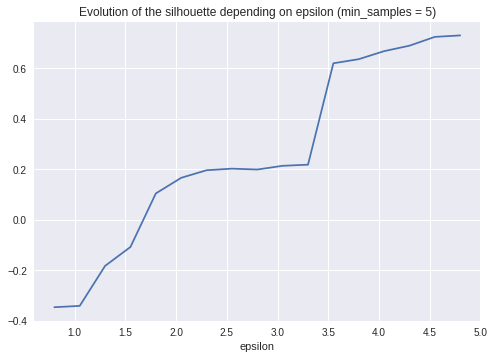

Epsilon  Nbr_Clusters  Nbr_noises  Silhouette  \
0      0.80             7        4293   -0.347047   
1      1.05            12        3501   -0.341832   
2      1.30            15        2169   -0.183184   
3      1.55            17        1107   -0.108103   
4      1.80             8         567    0.104136   
5      2.05             6         337    0.166123   
6      2.30             5         217    0.196175   
7      2.55             2         154    0.202456   
8      2.80             3         108    0.198984   
9      3.05             2          82    0.213761   
10     3.30             2          67    0.218236   
11     3.55             1          51    0.620348   
12     3.80             1          45    0.636632   
13     4.05             1          35    0.668472   
14     4.30             1          27    0.690120   
15     4.55             1          20    0.725038   
16     4.80             1          19    0.730893   

                               Distribution of points  
0                               [6, 6, 8, 5, 4, 7, 7]  
1            [769, 4, 4, 5, 7, 4, 11, 8, 5, 3, 10, 5]  
2   [71, 12, 2011, 7, 5, 3, 18, 10, 5, 5, 4, 5, 5,...  
3   [162, 5, 2958, 28, 8, 8, 17, 4, 5, 6, 5, 3, 5,...  
4                     [247, 7, 3, 3452, 28, 23, 5, 4]  
5                            [298, 4, 3658, 29, 5, 5]  
6                              [331, 3741, 31, 12, 4]  
7                                         [358, 3824]  
8                                      [374, 3849, 5]  
9                                         [383, 3871]  
10                                        [390, 3879]  
11                                             [4285]  
12                                             [4291]  
13                                             [4301]  
14                                             [4309]  
15                                             [4316]  
16                                             [4317]

In [23]:
# vary the value of epsilon between 0.8 and 4 for min_samples = 5

epsilon = np.linspace(0.8,4.8,17)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    
    dbsc = DBSCAN(eps=k, min_samples=5).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)

# Dataframe with Number of clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc5 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                         'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})
    
#graph showing the evolution of the silhouette depending on epsilon (min_samples = 5)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 5)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc5.head(17)

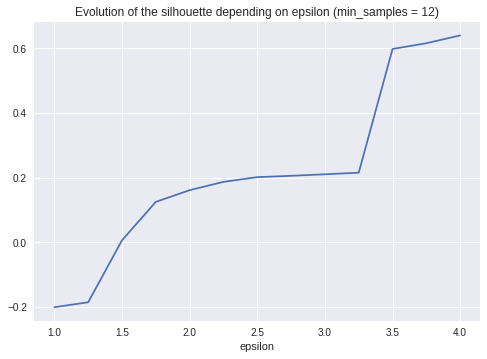

Epsilon  Nbr_Clusters  Nbr_noises  Silhouette Distribution of points
0      1.00             1        4119   -0.200988                  [217]
1      1.25             3        3027   -0.185736         [1288, 10, 11]
2      1.50             3        1895    0.006210          [95, 2337, 9]
3      1.75             4        1034    0.125097    [191, 3086, 11, 14]
4      2.00             4         568    0.161325    [254, 3481, 21, 12]
5      2.25             3         330    0.187055        [303, 3675, 28]
6      2.50             3         214    0.201627        [343, 3750, 29]
7      2.75             2         162    0.205812            [361, 3813]
8      3.00             2          99    0.210468            [377, 3860]
9      3.25             2          78    0.215507            [386, 3872]
10     3.50             1          64    0.598461                 [4272]
11     3.75             1          56    0.616242                 [4280]
12     4.00             1          46    0.640422                 [4290]

In [24]:
# vary the value of epsilon between 1 and 4 for min_samples = 12

epsilon = np.linspace(1,4,13)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    dbsc = DBSCAN(eps=k, min_samples=12).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)

# Dataframe with Nbr_Clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc12 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                          'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})

#Graph showing the evolution of the silhouette depending on epsilon (min_samples = 12)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 12)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc12.head(15)

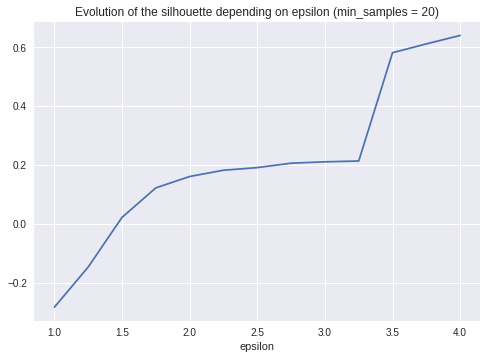

Epsilon  Nbr_Clusters  Nbr_noises  Silhouette Distribution of points
0      1.00             1        4306   -0.283992                   [30]
1      1.25             2        3403   -0.147332              [918, 15]
2      1.50             2        2275    0.021531             [21, 2040]
3      1.75             2        1302    0.121839            [162, 2872]
4      2.00             2         753    0.160567            [229, 3354]
5      2.25             2         461    0.181909            [285, 3590]
6      2.50             3         280    0.190769        [321, 3715, 20]
7      2.75             3         180    0.205845        [355, 3774, 27]
8      3.00             2         124    0.210526            [374, 3838]
9      3.25             2          97    0.213220            [381, 3858]
10     3.50             1          75    0.581559                 [4261]
11     3.75             1          59    0.611529                 [4277]
12     4.00             1          46    0.640422                 [4290]

In [25]:
# vary the value of epsilon between 1 and 4 for min_samples = 20
epsilon = np.linspace(1,4,13)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    dbsc = DBSCAN(eps=k, min_samples=20).fit(df_standard)
    core_samples_mask = np.zeros_like(dbsc.labels_, dtype = bool)
    core_samples_mask[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)

# Dataframe with Nbr_Clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon
    
df_dbsc20 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                          'Nbr_noises':noise, 'Silhouette':res,
                          'Distribution of points': n_points_epsilon})

#graph showing evolution of the silhouette depending on epsilon (min_samples = 20)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 20)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc20.head(15)

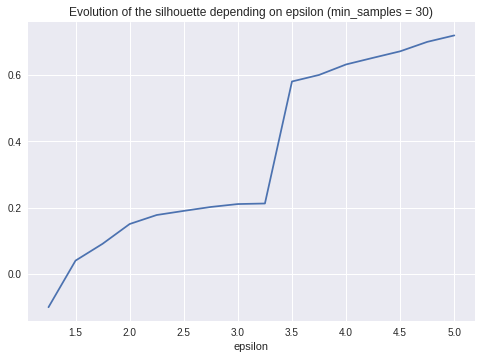

Epsilon  Nbr_Clusters  Nbr_noises  Silhouette Distribution of points
0      1.25             1        3616   -0.100343                  [720]
1      1.50             1        2561    0.040163                 [1775]
2      1.75             2        1572    0.090841             [93, 2671]
3      2.00             2         886    0.150412            [202, 3248]
4      2.25             2         533    0.177552            [271, 3532]
5      2.50             2         373    0.189961            [308, 3655]
6      2.75             2         239    0.201822            [342, 3755]
7      3.00             2         159    0.210585            [369, 3808]
8      3.25             2         114    0.212250            [378, 3844]
9      3.50             1          76    0.580006                 [4260]
10     3.75             1          65    0.599713                 [4271]
11     4.00             1          51    0.631371                 [4285]
12     4.25             1          44    0.651379                 [4292]
13     4.50             1          35    0.670997                 [4301]
14     4.75             1          27    0.699408                 [4309]
15     5.00             1          23    0.718867                 [4313]

In [26]:
# vary the value of epsilon between 1.25 and 5 for min_samples = 30
epsilon = np.linspace(1.25,5,16)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    
    dbsc = DBSCAN(eps=k, min_samples=30).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)
    
# Dataframe with Nbr_Clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc30 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                          'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})
# Graph showing the evolution of the silhouette depending on epsilon (min_samples = 30)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 30)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc30.head(20)

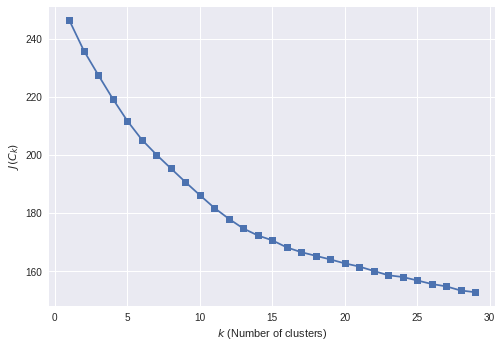

In [27]:
# Graph showing the evolution of the square root of the sum of squared distances
# of samples to their closest cluster center, depending on number of cluster (k)

inertia = []

for k in range(1,30):
    model = KMeans(n_clusters=k, random_state=0).fit(df_standard)
    inertia.append(np.sqrt(model.inertia_))
    
plt.plot(range(1, 30), inertia, marker='s');
plt.xlabel('$k$ (Number of clusters)')
plt.ylabel('$J(C_k)$');

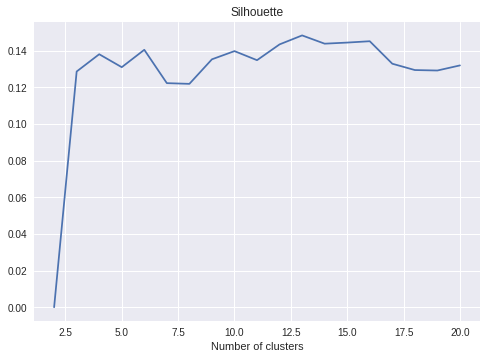

In [28]:
# Vary the number of clusters between 2 and 20
res =  np.arange(19,dtype="double")

for k in np.arange(1,19):
    km = KMeans(n_clusters=k+1, random_state=0).fit(df_standard)
    res[k] = metrics.silhouette_score(df_standard,km.labels_)
    
#graph

plt.title("Silhouette")
plt.xlabel("Number of clusters")
plt.plot(np.arange(2,21,1),res)
plt.show()

In [29]:
#Clustering with K-means algorithm

for n_cluster in [3,4,5,6,7,8,9,12,13]:
    model = KMeans(n_clusters=n_cluster, random_state=0).fit(df_standard)
    idk = model.labels_
    dict_nbr_points = {j: ("Number of points = %d" % (len(np.where(idk == j)[0])))
                       for j in range(model.n_clusters)}
    print('Number of clusters: %d' % n_cluster)
    print(dict_nbr_points)
    print('------------------------')

Number of clusters: 3
{0: 'Number of points = 2762', 1: 'Number of points = 1137', 2: 'Number of points = 437'}
------------------------
Number of clusters: 4
{0: 'Number of points = 735', 1: 'Number of points = 922', 2: 'Number of points = 2265', 3: 'Number of points = 414'}
------------------------
Number of clusters: 5
{0: 'Number of points = 755', 1: 'Number of points = 923', 2: 'Number of points = 2231', 3: 'Number of points = 382', 4: 'Number of points = 45'}
------------------------
Number of clusters: 6
{0: 'Number of points = 1135', 1: 'Number of points = 380', 2: 'Number of points = 554', 3: 'Number of points = 866', 4: 'Number of points = 43', 5: 'Number of points = 1358'}
------------------------
Number of clusters: 7
{0: 'Number of points = 420', 1: 'Number of points = 1171', 2: 'Number of points = 798', 3: 'Number of points = 377', 4: 'Number of points = 1007', 5: 'Number of points = 524', 6: 'Number of points = 39'}
------------------------
Number of clusters: 8
{0: 'Num

In [0]:
def hist_kmeans_clusters(n):
    ''' For each feature this fonction plot histograms of your kmeans model's clusters.
    
    Parameters:
      
        n (int): the value of n_clusters in K-Means clustering
      
    '''
  
    model = KMeans(n_clusters=n, random_state=0).fit(df_standard)
    idk = model.labels_
    fig, ax = plt.subplots(figsize=(7,6))

    for i in ['Count_Invoices', 'Average_Products_Invoice',
              'Average_Quantity_Invoice', 'Average_TotaPrice_Invoice',
              'United Kingdom', 'Decoration Department', 'Toys & Kids Deprtment',
              'Kitchen Department', 'Handcraft & Clothes Department',
              'Design & Viantage_Decoration Department']:
        print(df_customers[i].describe())

        for id_cluster in range(model.n_clusters):
            print("Cluster %d" % id_cluster)
            index = np.where(idk == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Median = df_customers[i][index].median()
            plt.hist(df_customers[i][index], bins = 30)
            plt.text(0.85, 0.8, 'Mean: %.2f' % Mean, bbox=dict(facecolor='red',
                                                                  alpha=0.5),
               transform=ax.transAxes)
            plt.text(0.85, 0.7, 'Median: %.2f' % Median, bbox=dict(facecolor='red',
                                                                    alpha=0.5),
               transform=ax.transAxes)
            plt.title(i)
            plt.show()

        print('---------------------------------------------------------')

    for j in ['Last_Date', 'First_Date']:
        print(df_customers[j].describe())

        for id_cluster in range(model.n_clusters):
            print("Cluster %d" % id_cluster)
            index = np.where(idk == id_cluster)[0]
            Mean = df_customers[j][index].mean()
            Median = df_customers[j][index].median()
            plt.hist(df_customers[j][index], bins = 30)
            plt.text(0.75, 0.8, 'Mean: %.2f' % Mean, bbox=dict(facecolor='red',
                                                                  alpha=0.5),
               transform=ax.transAxes)
            plt.text(0.75, 0.7, 'Median: %.2f' % Median, bbox=dict(facecolor='red', alpha=0.5),
               transform=ax.transAxes)
            plt.title(j)
            plt.show()

        print('---------------------------------------------------------')  

In [0]:
def df_kmeans_clusters(n):
    ''' Show a dataframe with the average percentage difference betwean the mean of each feature
    and the value of each point for each kmeans model's clusters.
    
    Parameters:
      
         n (int): the value of n_clusters in K-Means clustering
      
    '''
  
    model = KMeans(n_clusters=n, random_state=0).fit(df_standard)
    idk = model.labels_
    my_dict={}
    alphabet = 'BCDEFGHIJKLM'
    my_dict['A/Number_Of_Customers'] = [(len(np.where(idk == j)[0])) for j in 
                                        range(model.n_clusters)]

    for h, i in enumerate(['Count_Invoices', 'Average_Products_Invoice',
                           'Average_Quantity_Invoice', 'Average_TotaPrice_Invoice',
                           'United Kingdom', 'Decoration Department', 'Toys & Kids Deprtment',
                           'Kitchen Department', 'Handcraft & Clothes Department',
                           'Design & Viantage_Decoration Department', 'Last_Date', 'First_Date']):
        feature = []

        for id_cluster in range(model.n_clusters):
            index = np.where(idk == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Mean_feature = df_customers[i].mean()
            pourcentage_mean = str('%.2f' % ((Mean - Mean_feature)*100/Mean_feature)) + ' %'
            feature.append(pourcentage_mean)
    
        my_dict[alphabet[h] + '/' + i] = feature
    
  
    feature = []
  
    for id_cluster in range(model.n_clusters):
        index = np.where(idk == id_cluster)[0]
        time_minutes = data["Time_Minutes"][index].mean()
        hour = time_minutes // 60
        minutes = time_minutes % 60
        feature.append("%d:%02d" % (hour, minutes))
      
    my_dict['N' + '/' + 'Average_Hour'] = feature
    Clusters_df = pd.DataFrame(my_dict)
  
    return Clusters_df.head(n)

count    4336.000000
mean        4.273293
std         7.699536
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: Count_Invoices, dtype: float64
Cluster 0


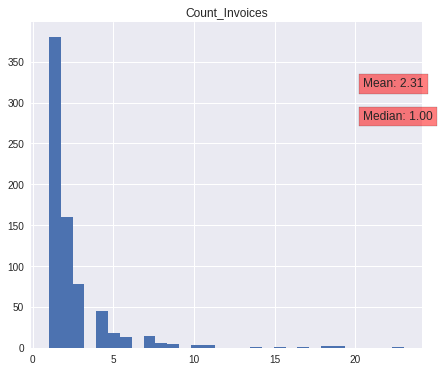

Cluster 1


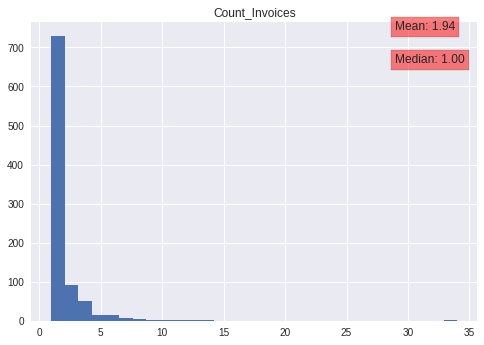

Cluster 2


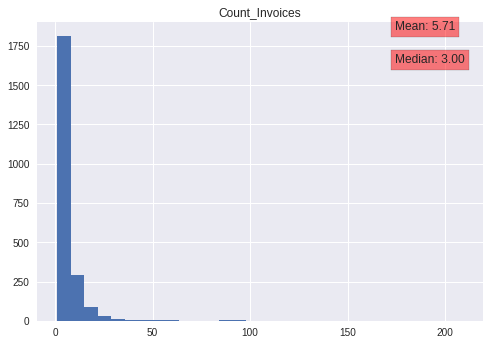

Cluster 3


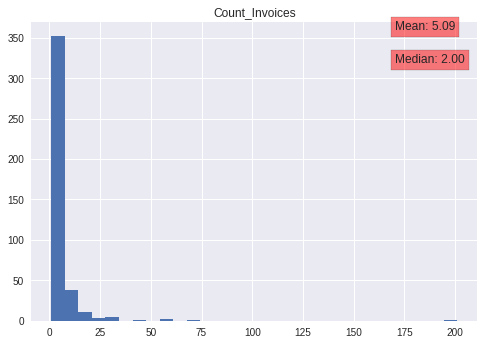

---------------------------------------------------------
count    4336.000000
mean       21.844331
std        19.636356
min         1.000000
25%         9.500000
50%        17.000000
75%        28.000000
max       300.647059
Name: Average_Products_Invoice, dtype: float64
Cluster 0


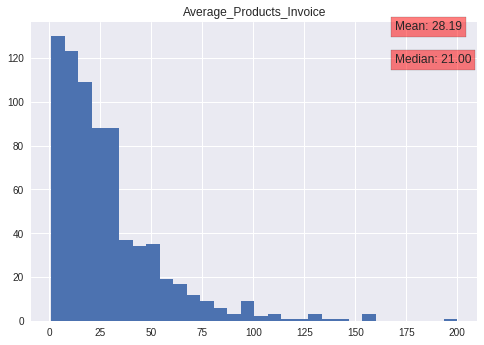

Cluster 1


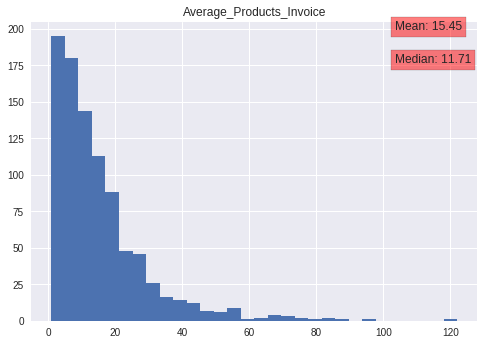

Cluster 2


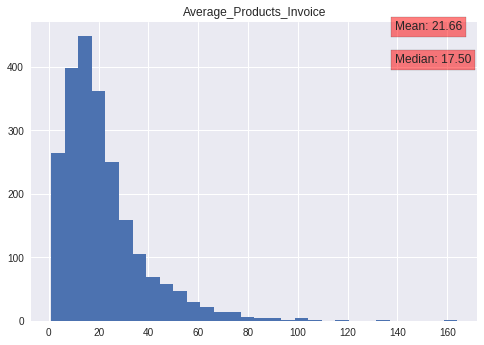

Cluster 3


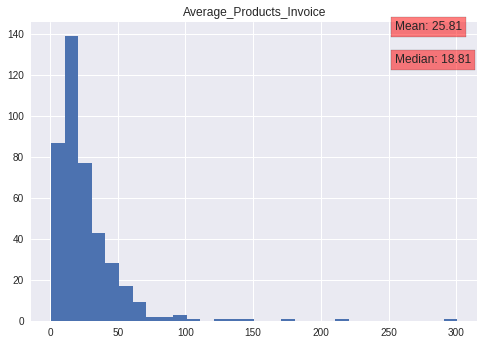

---------------------------------------------------------
count    4336.000000
mean      226.123277
std       296.468316
min         1.000000
25%        92.000000
50%       161.000000
75%       270.000000
max      7824.000000
Name: Average_Quantity_Invoice, dtype: float64
Cluster 0


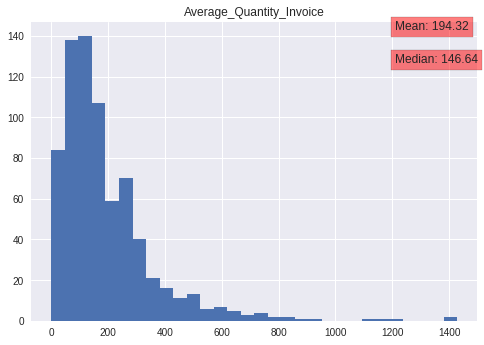

Cluster 1


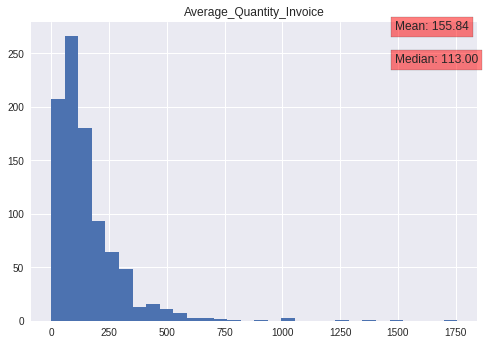

Cluster 2


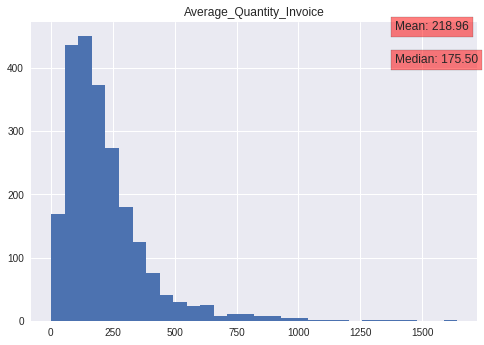

Cluster 3


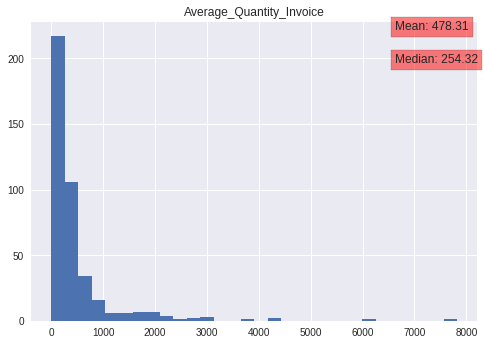

---------------------------------------------------------
count     4336.000000
mean       380.610551
std        497.501543
min          3.450000
25%        177.848393
50%        291.877500
75%        428.053125
max      14844.766667
Name: Average_TotaPrice_Invoice, dtype: float64
Cluster 0


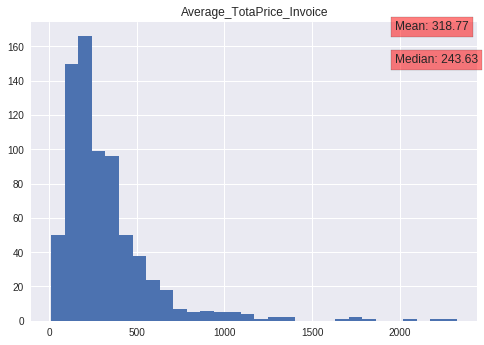

Cluster 1


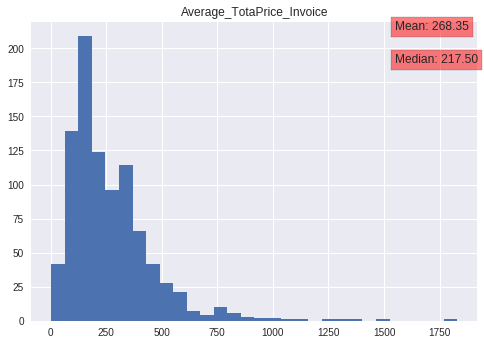

Cluster 2


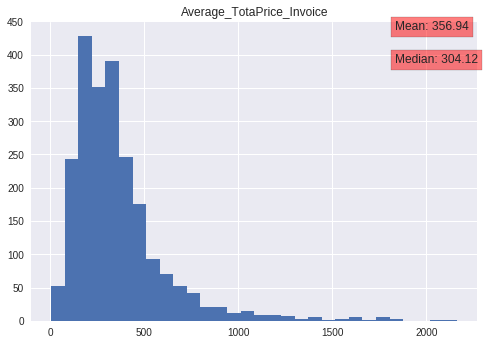

Cluster 3


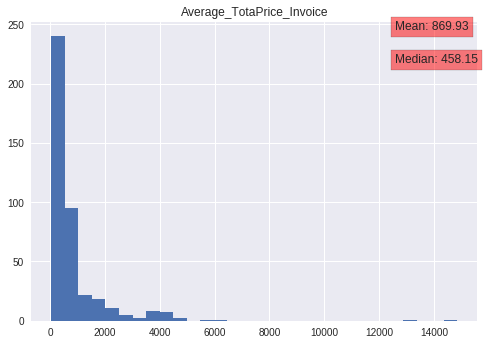

---------------------------------------------------------
count    4336.000000
mean        0.903598
std         0.295176
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: United Kingdom, dtype: float64
Cluster 0


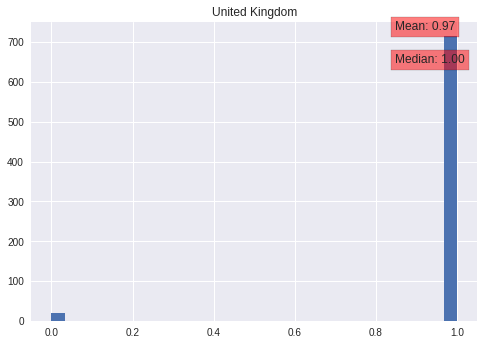

Cluster 1


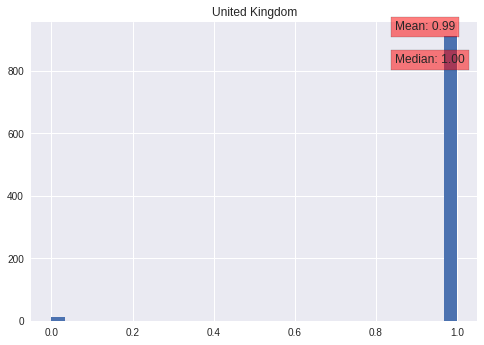

Cluster 2


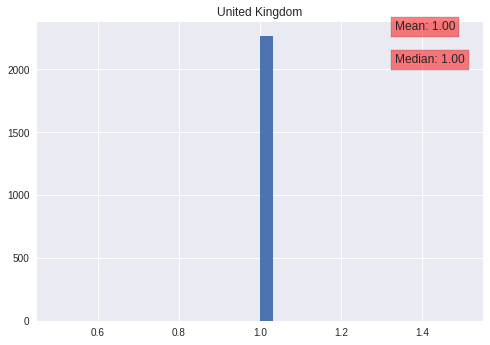

Cluster 3


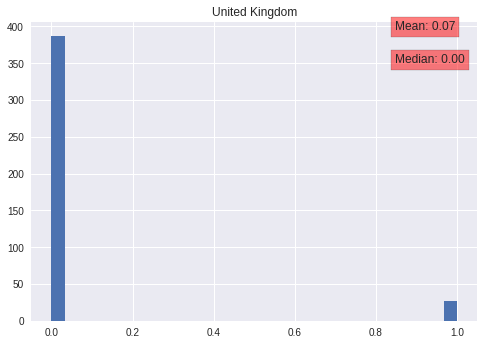

---------------------------------------------------------
count    4336.000000
mean        0.205404
std         0.153394
min         0.000000
25%         0.109062
50%         0.183013
75%         0.268442
max         1.000000
Name: Decoration Department, dtype: float64
Cluster 0


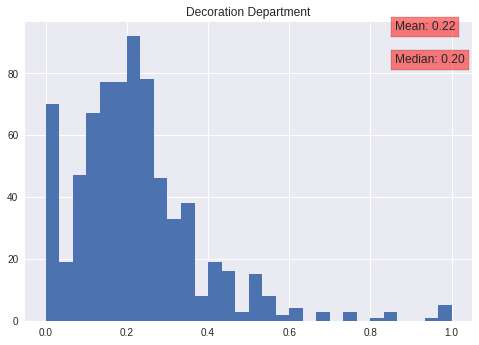

Cluster 1


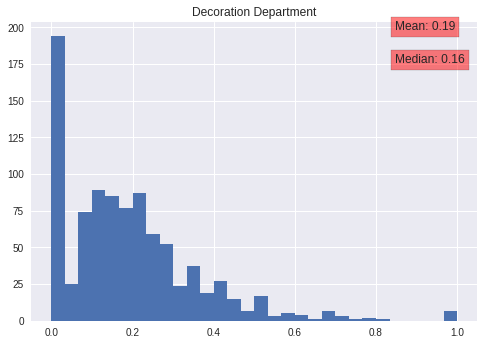

Cluster 2


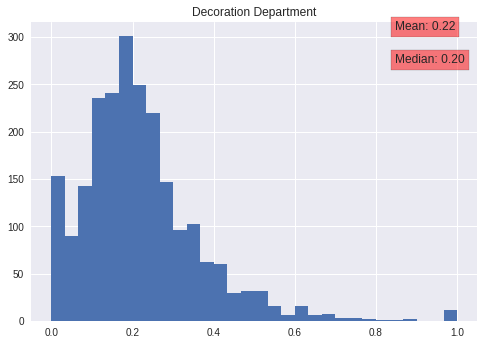

Cluster 3


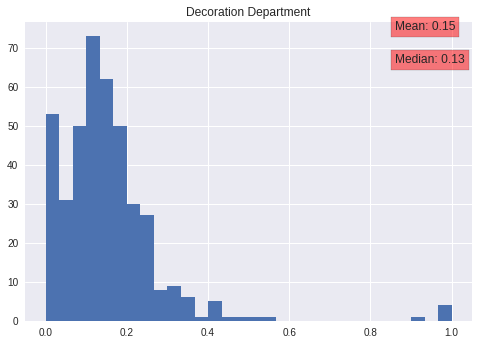

---------------------------------------------------------
count    4336.000000
mean        0.173742
std         0.131597
min         0.000000
25%         0.090909
50%         0.159033
75%         0.231707
max         1.000000
Name: Toys & Kids Deprtment, dtype: float64
Cluster 0


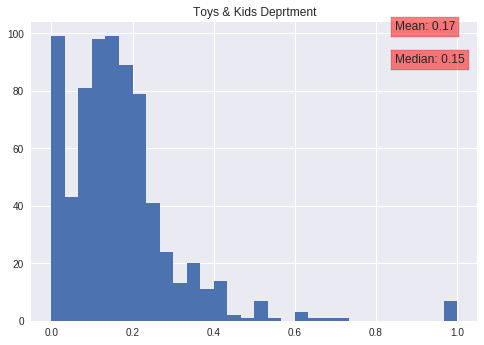

Cluster 1


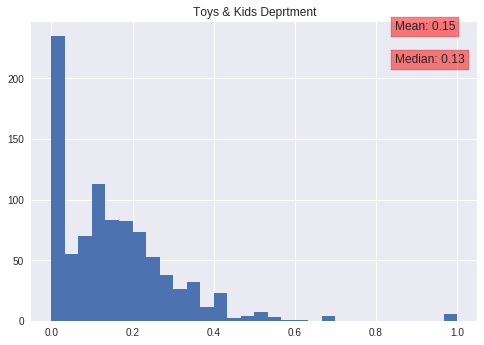

Cluster 2


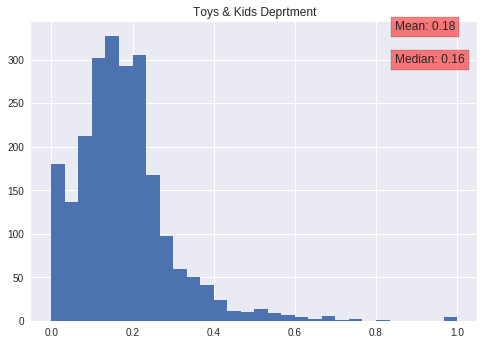

Cluster 3


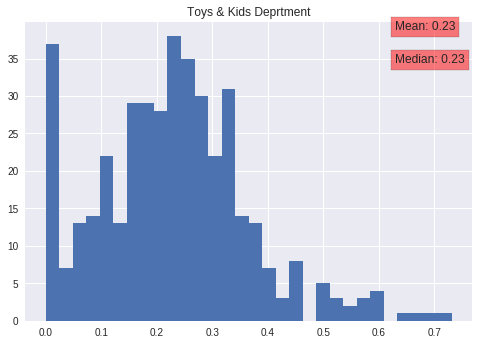

---------------------------------------------------------
count    4336.000000
mean        0.188823
std         0.141574
min         0.000000
25%         0.108352
50%         0.171429
75%         0.240000
max         1.000000
Name: Kitchen Department, dtype: float64
Cluster 0


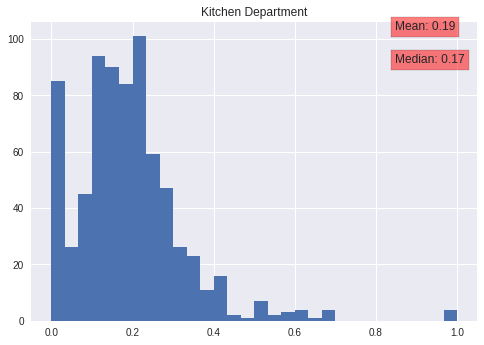

Cluster 1


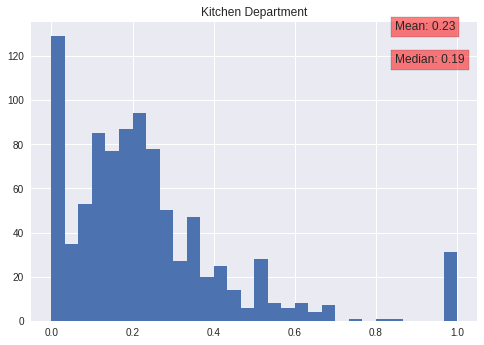

Cluster 2


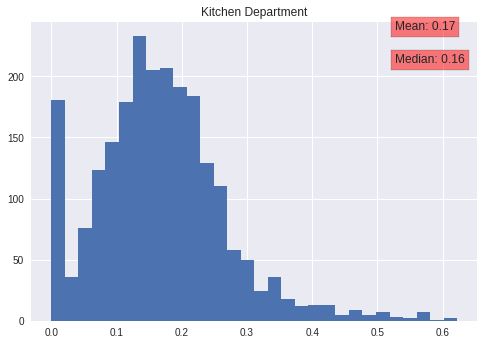

Cluster 3


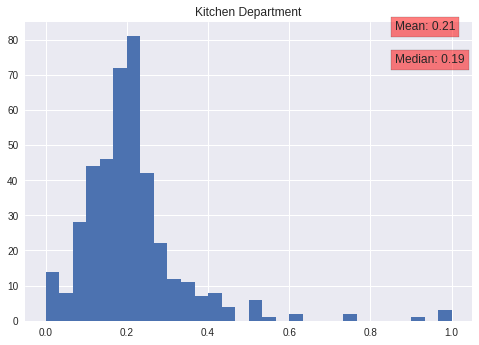

---------------------------------------------------------
count    4336.000000
mean        0.207249
std         0.147077
min         0.000000
25%         0.121212
50%         0.190476
75%         0.266901
max         1.000000
Name: Handcraft & Clothes Department, dtype: float64
Cluster 0


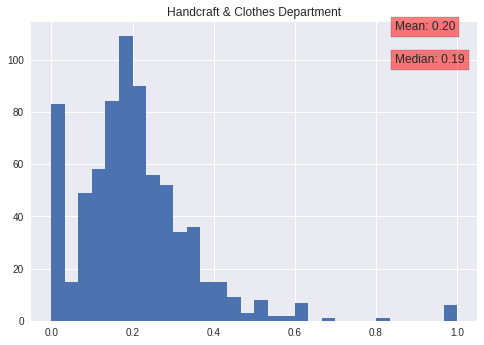

Cluster 1


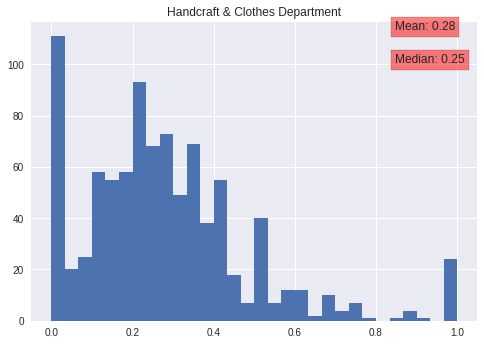

Cluster 2


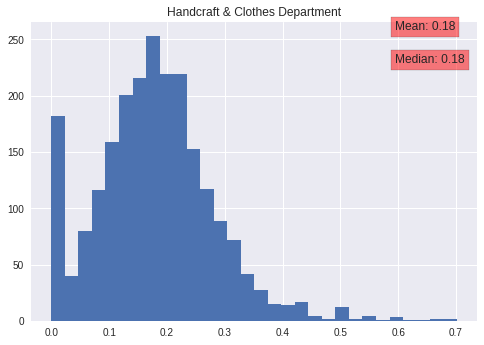

Cluster 3


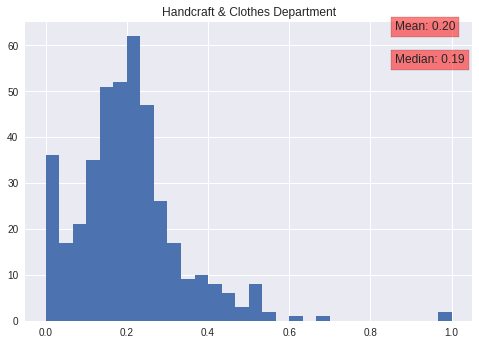

---------------------------------------------------------
count    4336.000000
mean        0.224782
std         0.156175
min         0.000000
25%         0.127273
50%         0.208333
75%         0.295024
max         1.000000
Name: Design & Viantage_Decoration Department, dtype: float64
Cluster 0


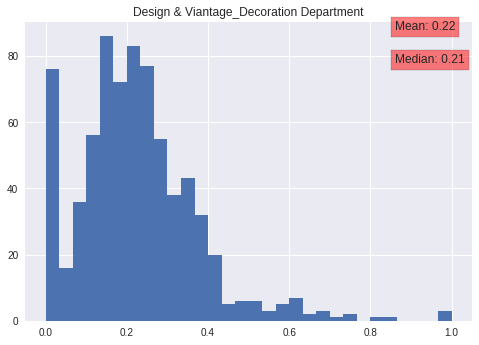

Cluster 1


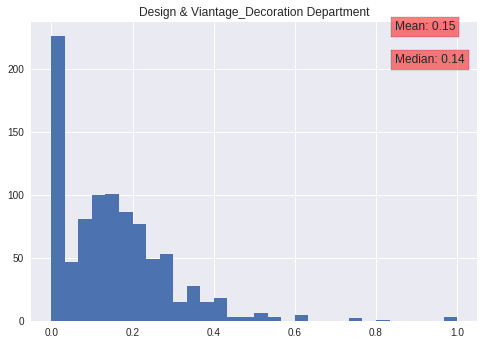

Cluster 2


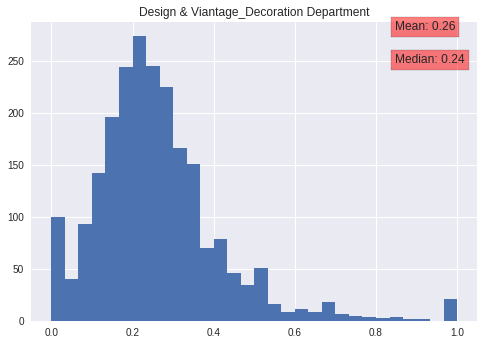

Cluster 3


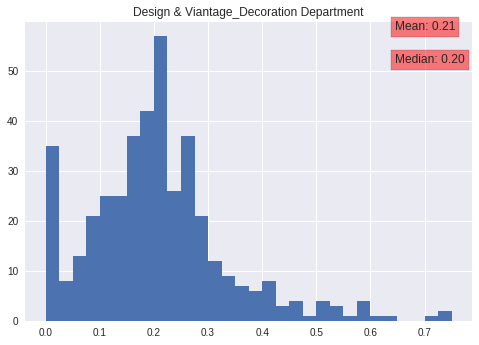

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64
Cluster 0


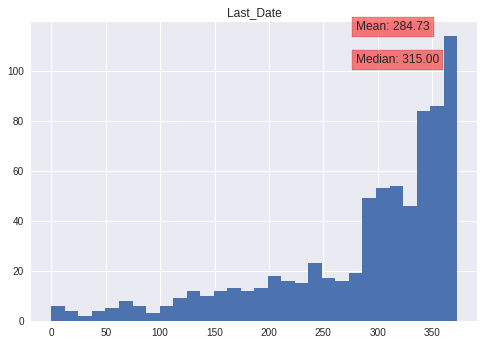

Cluster 1


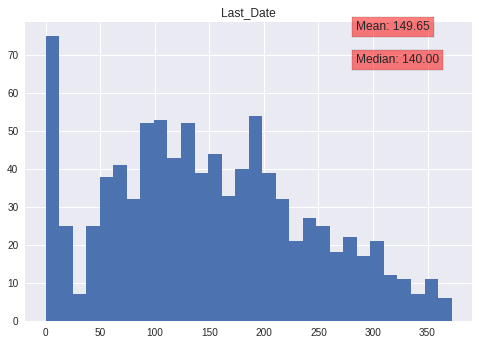

Cluster 2


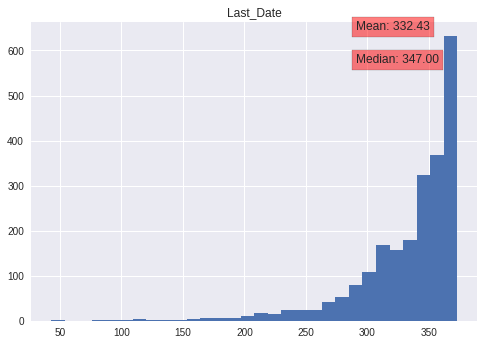

Cluster 3


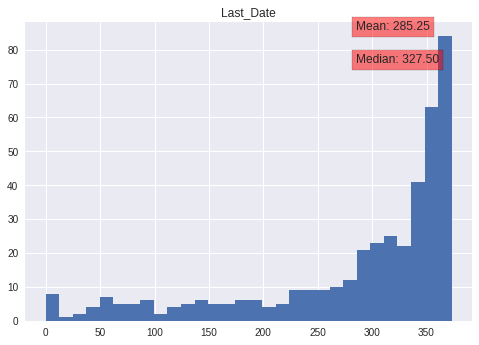

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64
Cluster 0


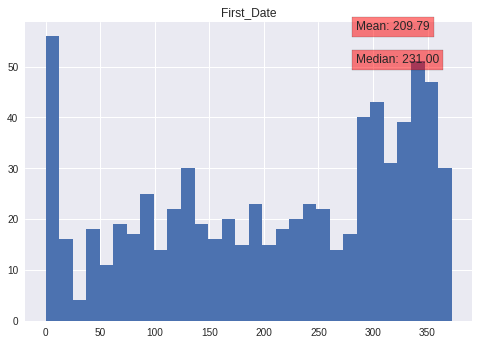

Cluster 1


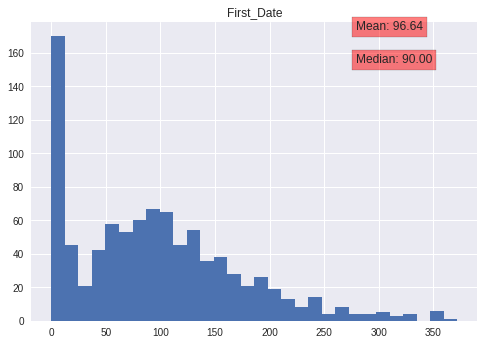

Cluster 2


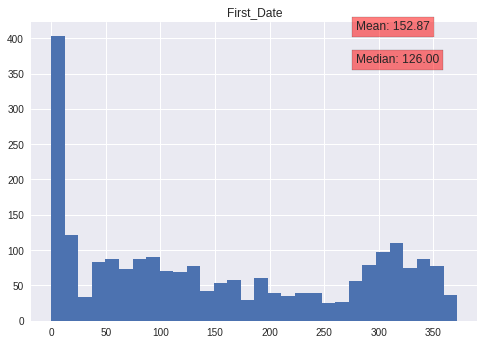

Cluster 3


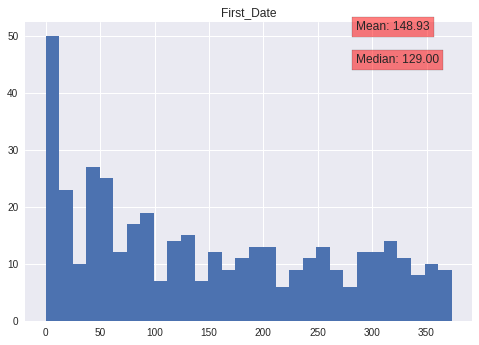

---------------------------------------------------------


In [32]:
hist_kmeans_clusters(4)

In [35]:
df_kmeans_clusters(4)

A/Number_Of_Customers B/Count_Invoices C/Average_Products_Invoice  \
0                    735         -45.87 %                    29.06 %   
1                    922         -54.54 %                   -29.26 %   
2                   2265          33.59 %                    -0.84 %   
3                    414          19.15 %                    18.17 %   

  D/Average_Quantity_Invoice E/Average_TotaPrice_Invoice F/United Kingdom  \
0                   -14.07 %                    -16.25 %           7.66 %   
1                   -31.08 %                    -29.49 %           9.35 %   
2                    -3.17 %                     -6.22 %          10.67 %   
3                   111.53 %                    128.56 %         -92.78 %   

  G/Decoration Department H/Toys & Kids Deprtment I/Kitchen Department  \
0                  7.51 %                 -4.28 %              -0.44 %   
1                 -8.45 %                -13.40 %              23.63 %   
2                  5.86 %                  1.05 %             -11.61 %   
3                -26.59 %                 31.67 %              11.68 %   

  J/Handcraft & Clothes Department K/Design & Viantage_Decoration Department  \
0                          -1.69 %                                   -1.62 %   
1                          34.67 %                                  -33.74 %   
2                         -13.26 %                                   15.81 %   
3                          -1.65 %                                   -8.47 %   

  L/Last_Date M/First_Date N/Average_Hour  
0      1.34 %      39.68 %          13:27  
1    -46.74 %     -35.65 %          13:33  
2     18.31 %       1.79 %          13:32  
3      1.52 %      -0.84 %          10:46

count    4336.000000
mean        4.273293
std         7.699536
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: Count_Invoices, dtype: float64
Cluster 0


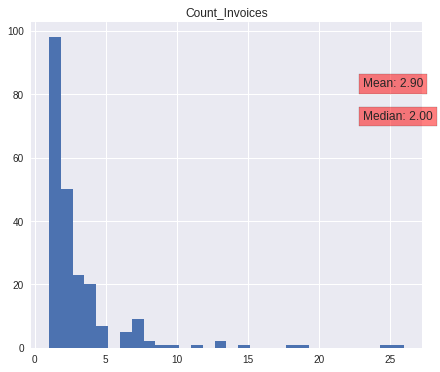

Cluster 1


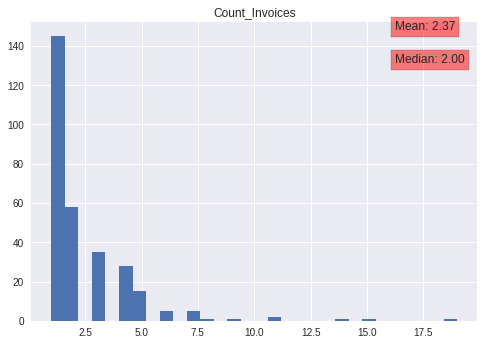

Cluster 2


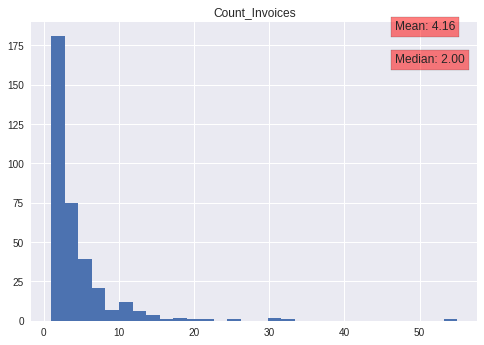

Cluster 3


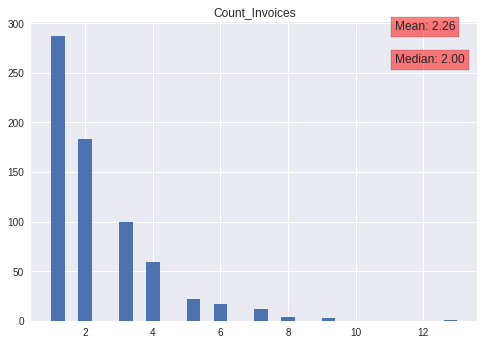

Cluster 4


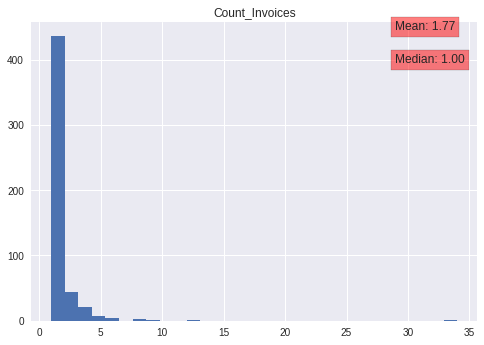

Cluster 5


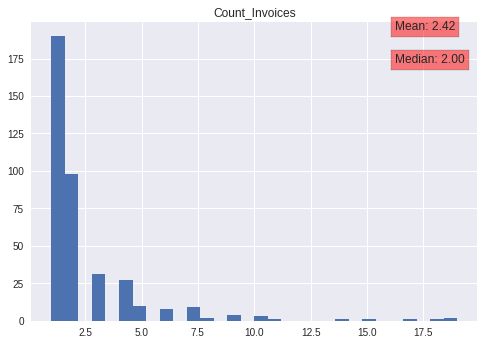

Cluster 6


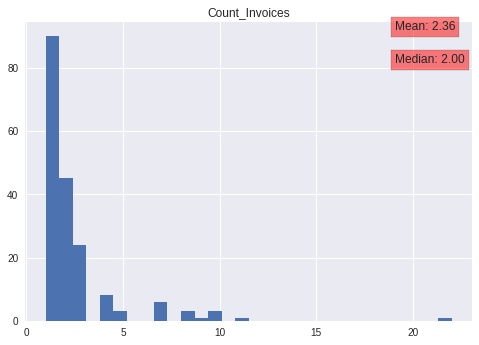

Cluster 7


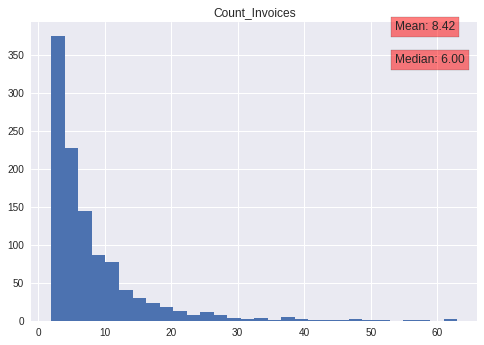

Cluster 8


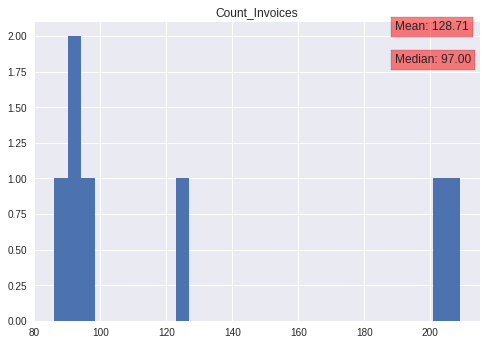

Cluster 9


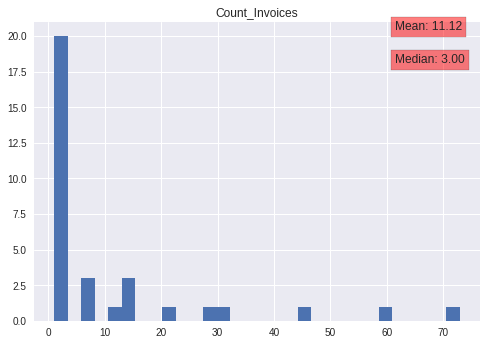

Cluster 10


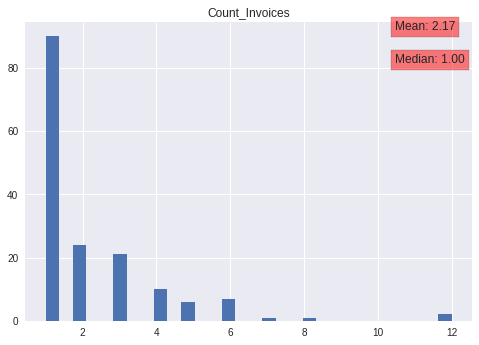

Cluster 11


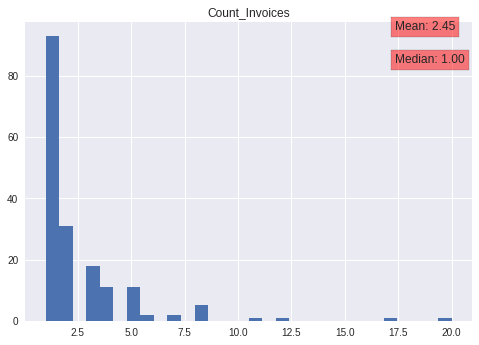

Cluster 12


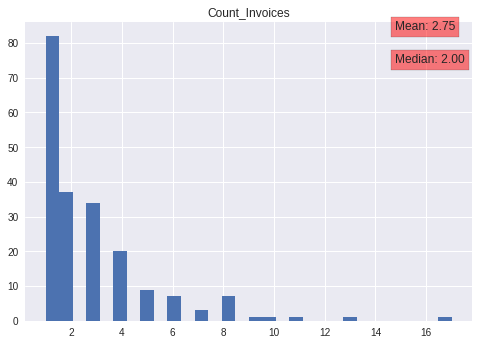

---------------------------------------------------------
count    4336.000000
mean       21.844331
std        19.636356
min         1.000000
25%         9.500000
50%        17.000000
75%        28.000000
max       300.647059
Name: Average_Products_Invoice, dtype: float64
Cluster 0


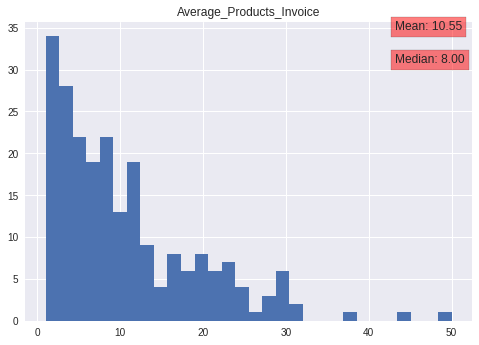

Cluster 1


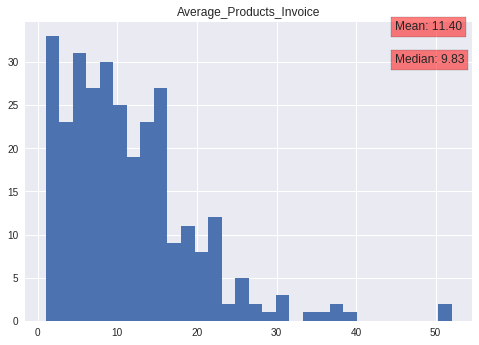

Cluster 2


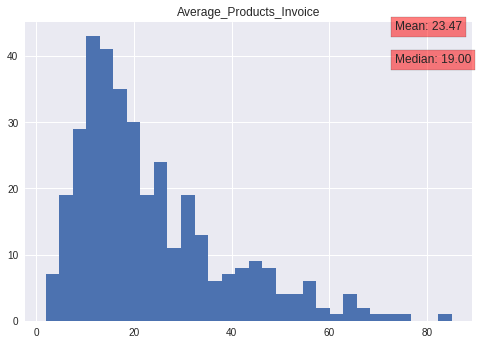

Cluster 3


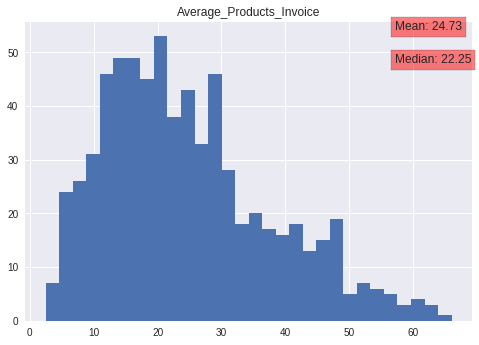

Cluster 4


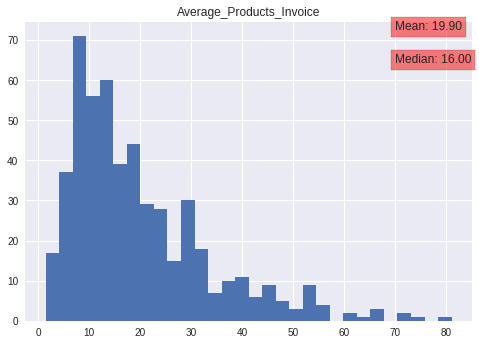

Cluster 5


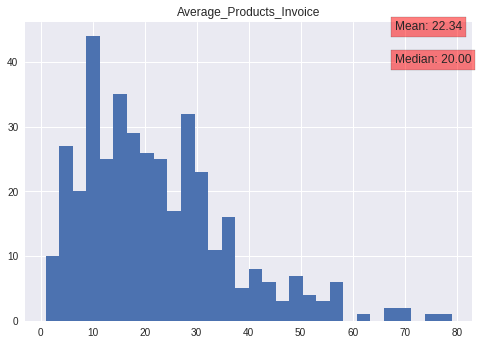

Cluster 6


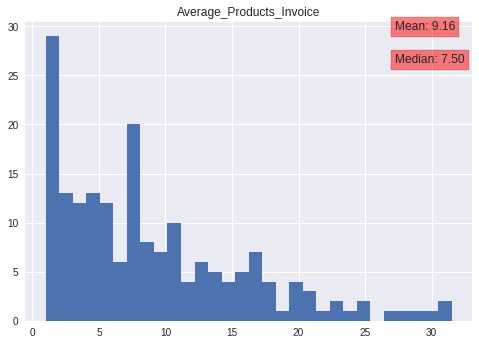

Cluster 7


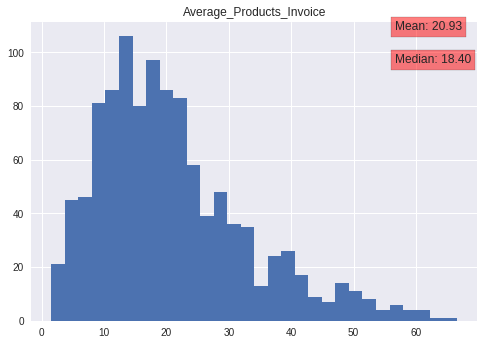

Cluster 8


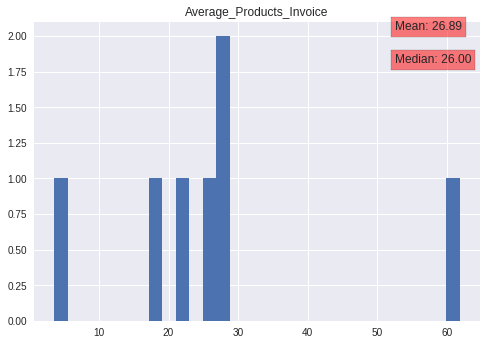

Cluster 9


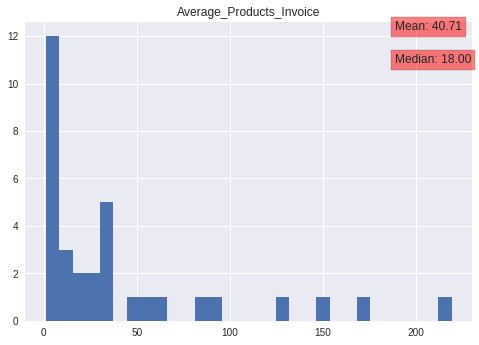

Cluster 10


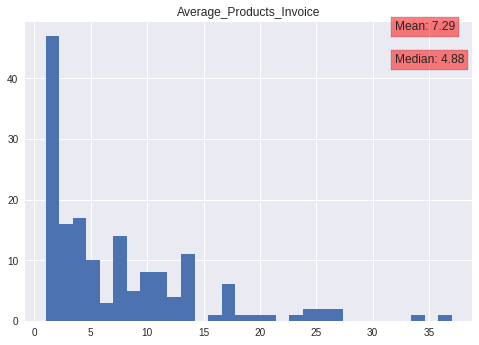

Cluster 11


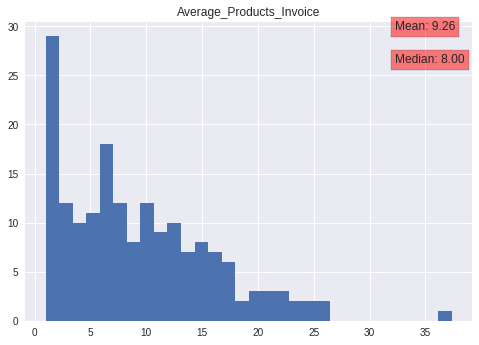

Cluster 12


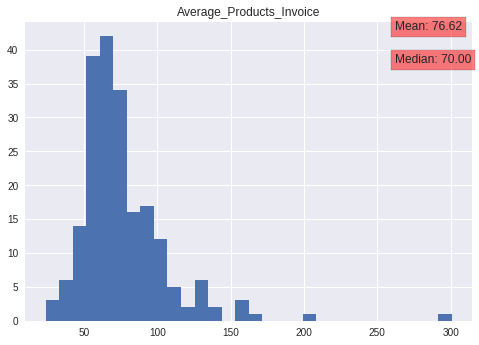

---------------------------------------------------------
count    4336.000000
mean      226.123277
std       296.468316
min         1.000000
25%        92.000000
50%       161.000000
75%       270.000000
max      7824.000000
Name: Average_Quantity_Invoice, dtype: float64
Cluster 0


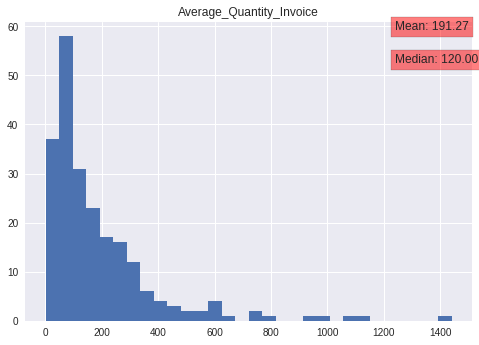

Cluster 1


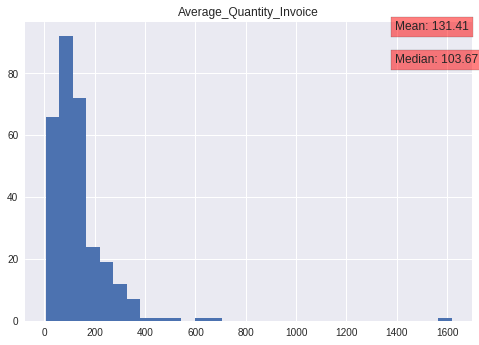

Cluster 2


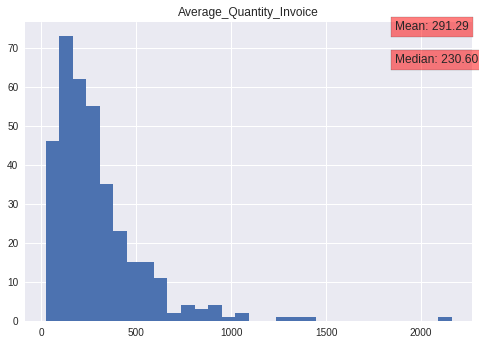

Cluster 3


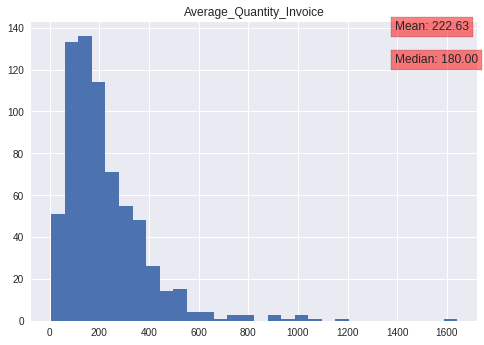

Cluster 4


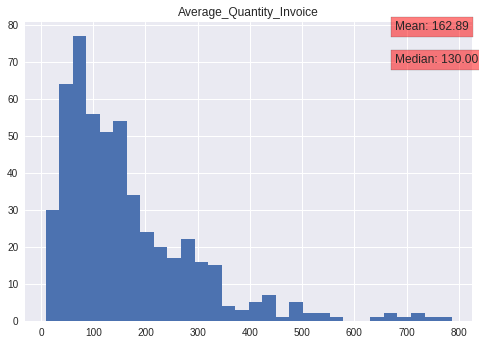

Cluster 5


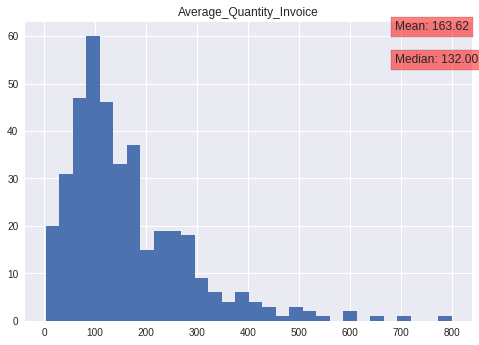

Cluster 6


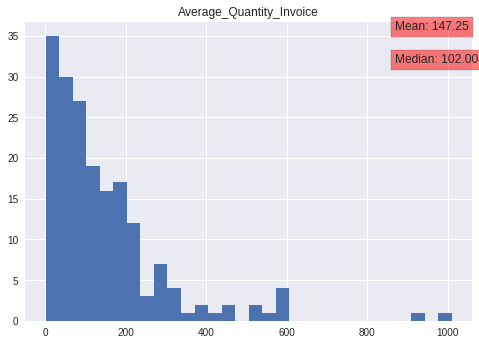

Cluster 7


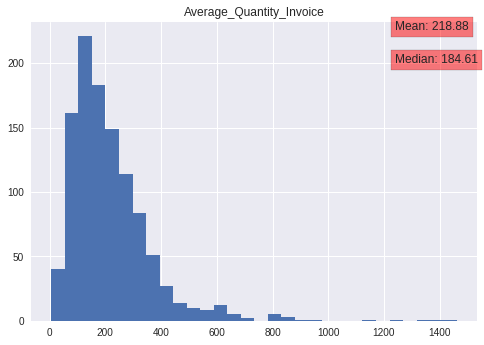

Cluster 8


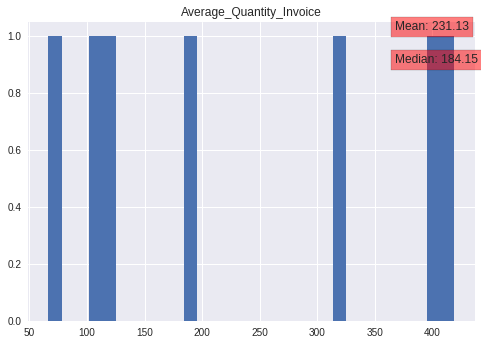

Cluster 9


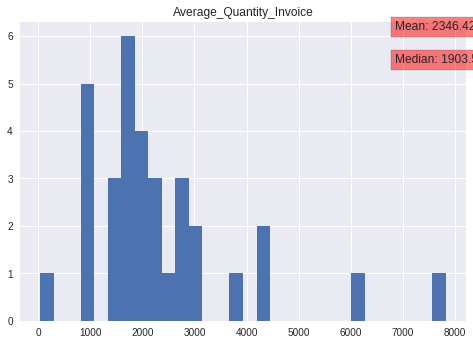

Cluster 10


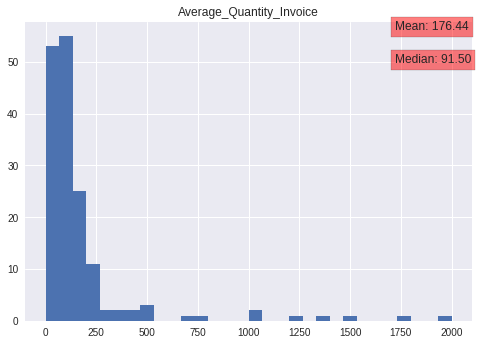

Cluster 11


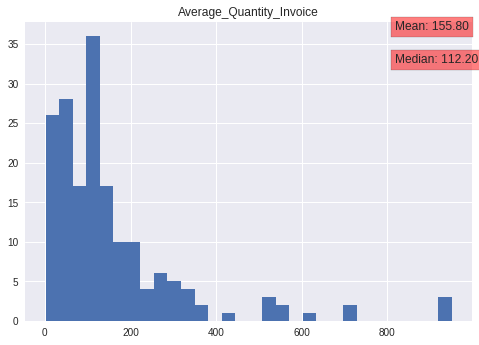

Cluster 12


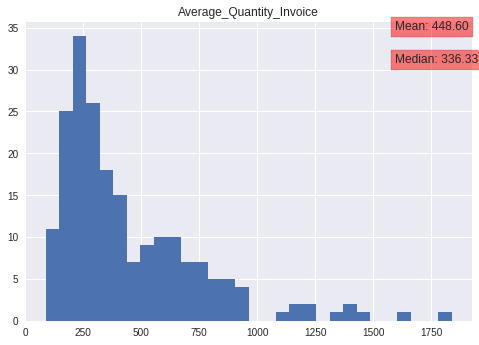

---------------------------------------------------------
count     4336.000000
mean       380.610551
std        497.501543
min          3.450000
25%        177.848393
50%        291.877500
75%        428.053125
max      14844.766667
Name: Average_TotaPrice_Invoice, dtype: float64
Cluster 0


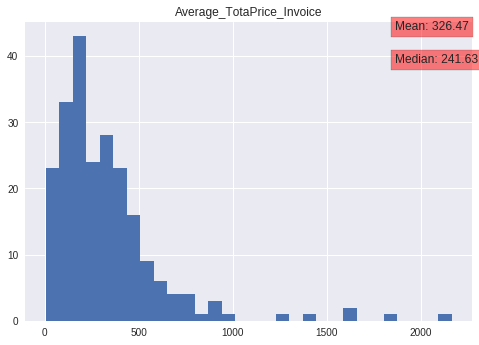

Cluster 1


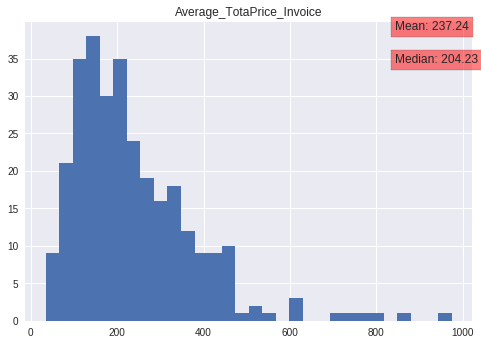

Cluster 2


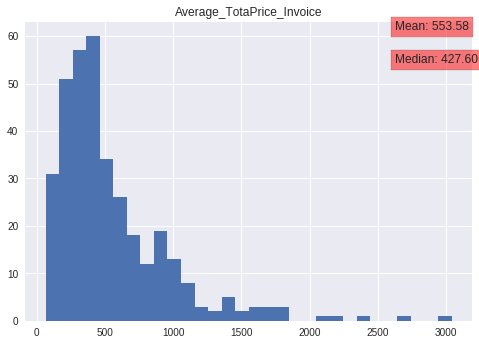

Cluster 3


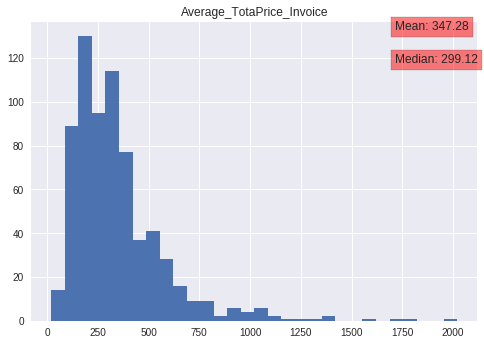

Cluster 4


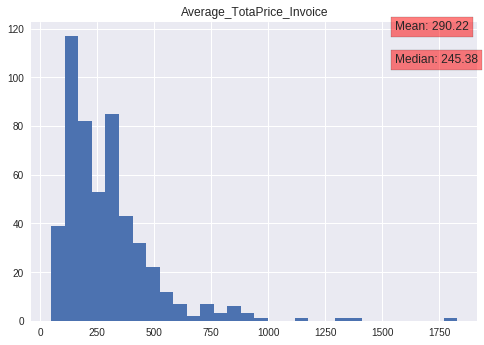

Cluster 5


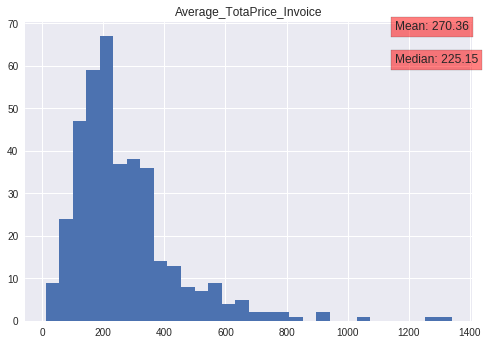

Cluster 6


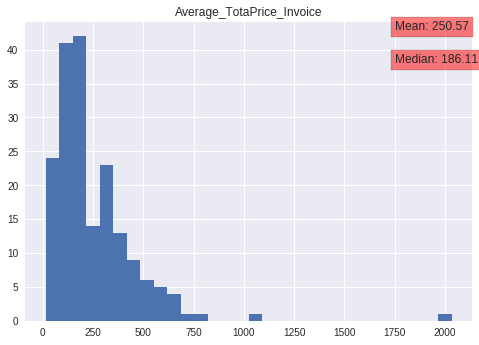

Cluster 7


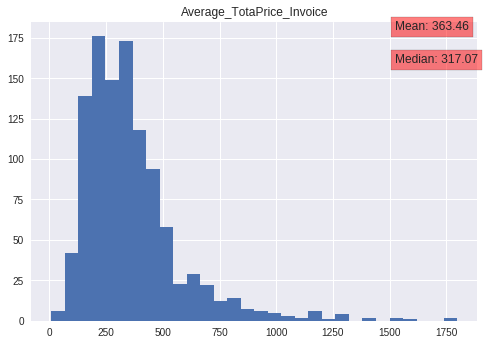

Cluster 8


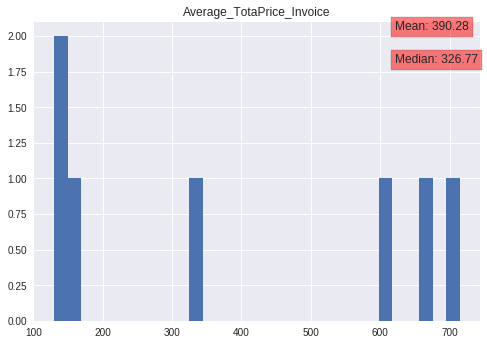

Cluster 9


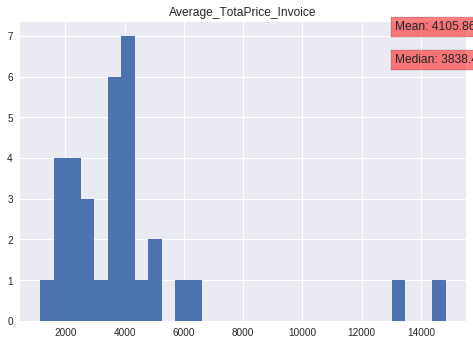

Cluster 10


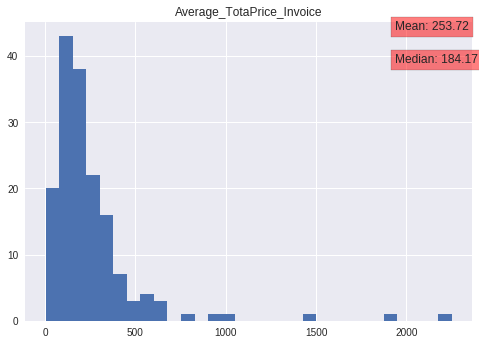

Cluster 11


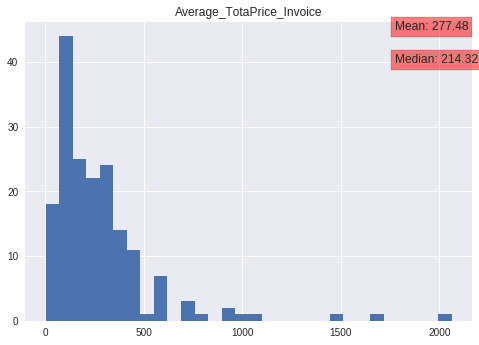

Cluster 12


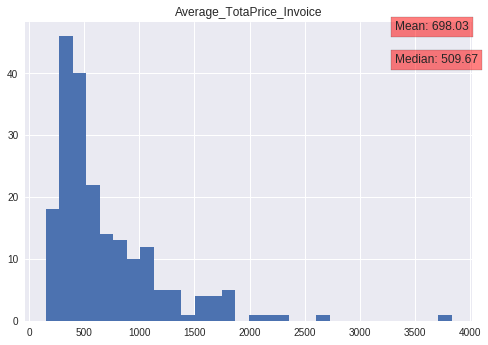

---------------------------------------------------------
count    4336.000000
mean        0.903598
std         0.295176
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: United Kingdom, dtype: float64
Cluster 0


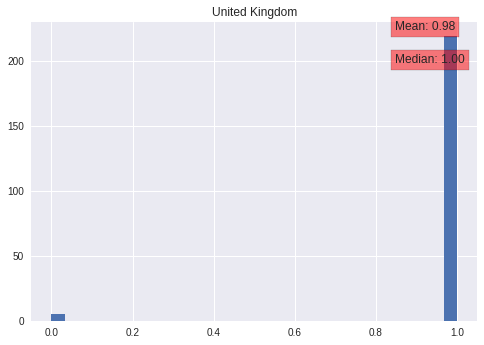

Cluster 1


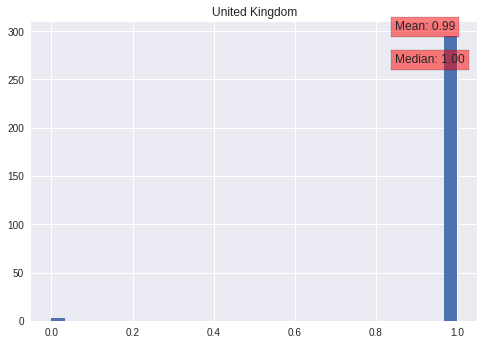

Cluster 2


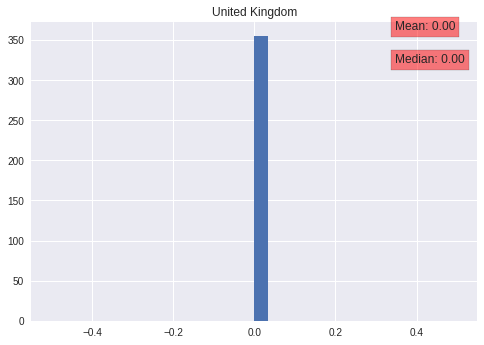

Cluster 3


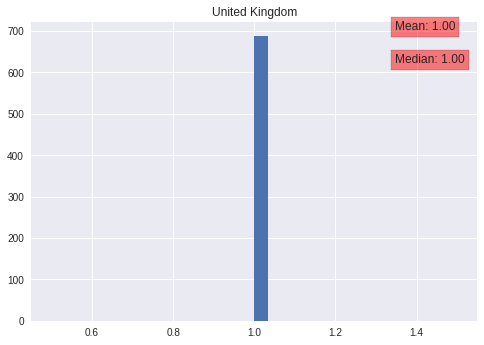

Cluster 4


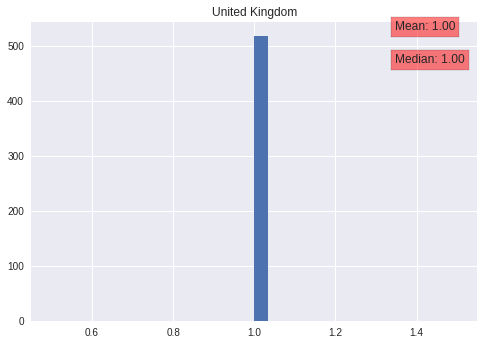

Cluster 5


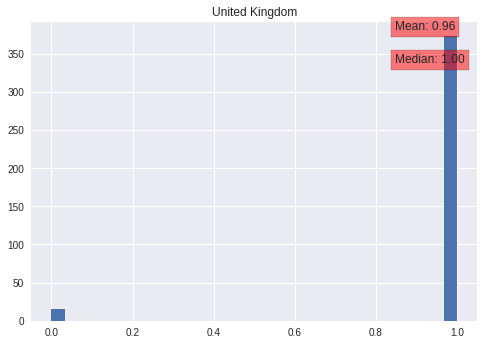

Cluster 6


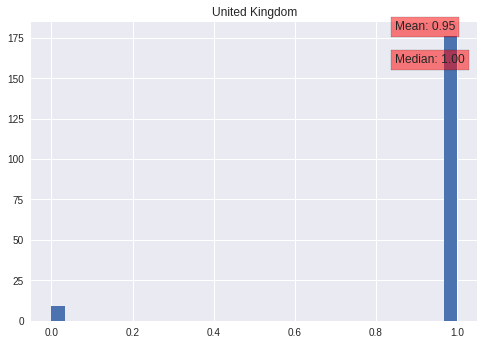

Cluster 7


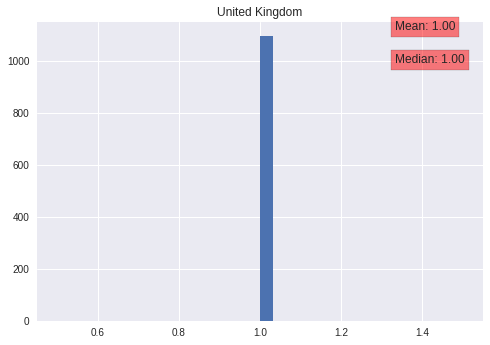

Cluster 8


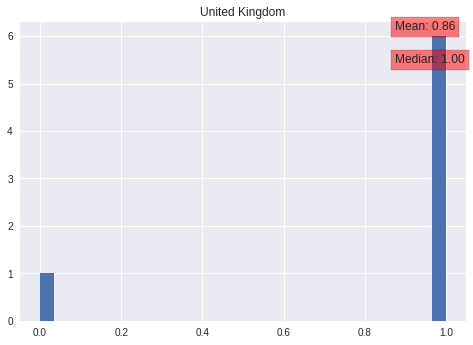

Cluster 9


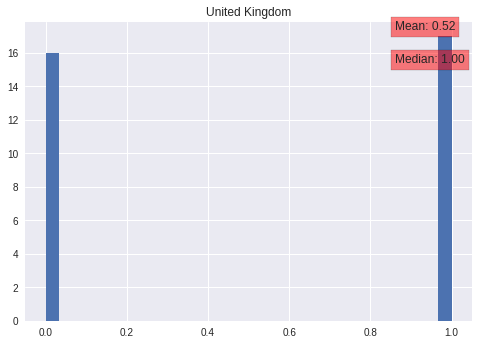

Cluster 10


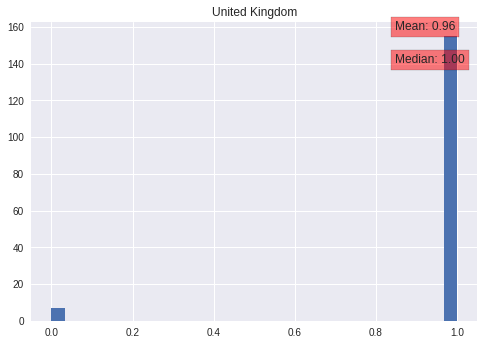

Cluster 11


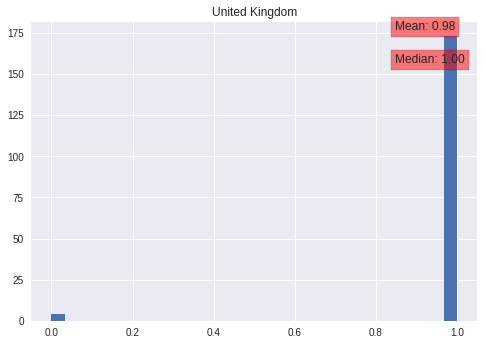

Cluster 12


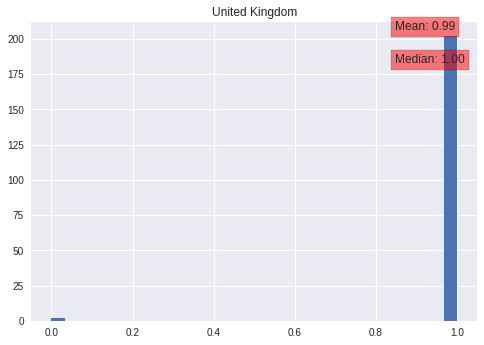

---------------------------------------------------------
count    4336.000000
mean        0.205404
std         0.153394
min         0.000000
25%         0.109062
50%         0.183013
75%         0.268442
max         1.000000
Name: Decoration Department, dtype: float64
Cluster 0


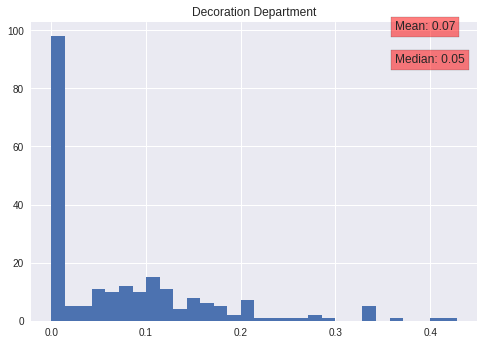

Cluster 1


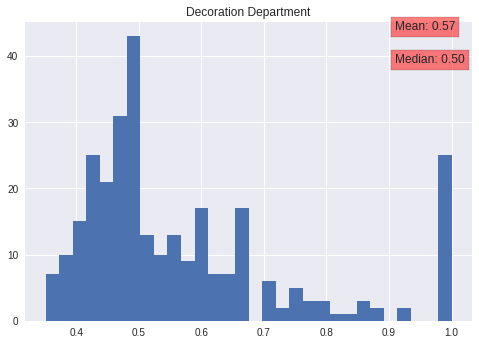

Cluster 2


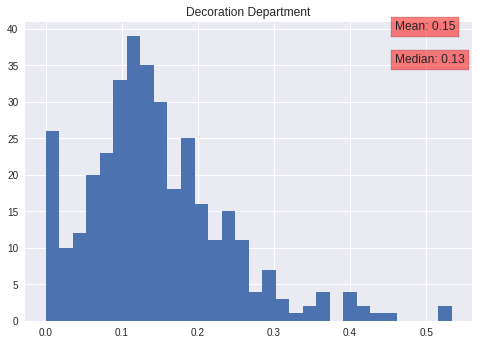

Cluster 3


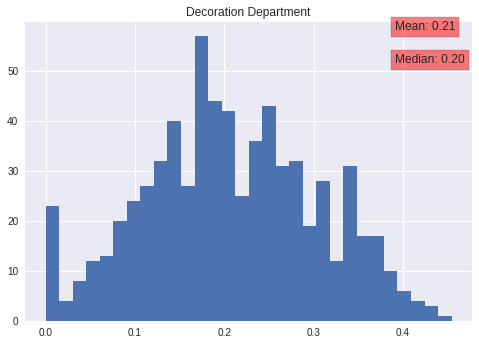

Cluster 4


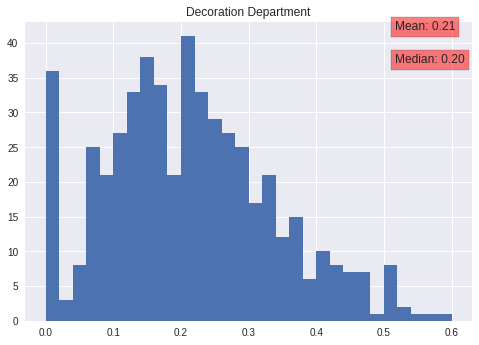

Cluster 5


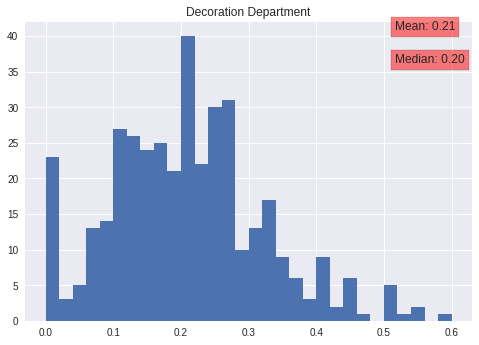

Cluster 6


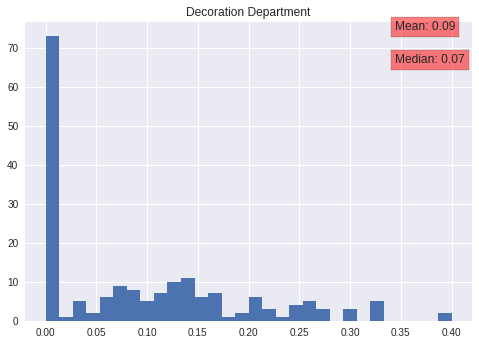

Cluster 7


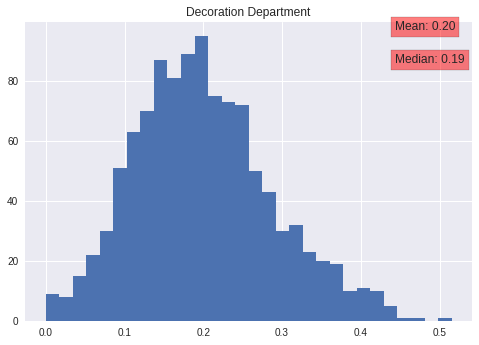

Cluster 8


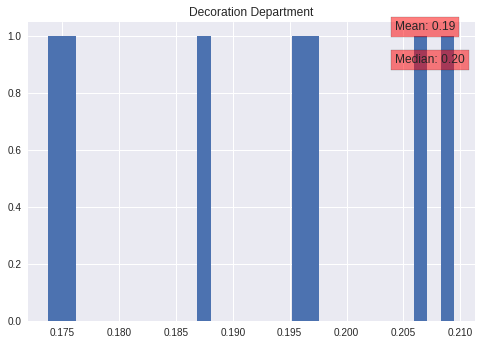

Cluster 9


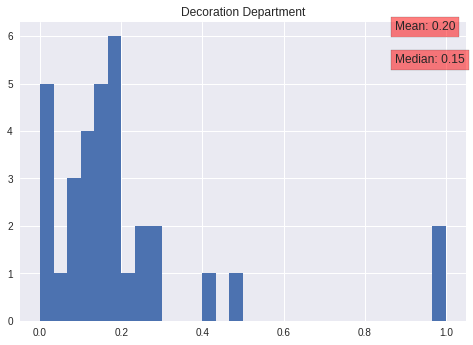

Cluster 10


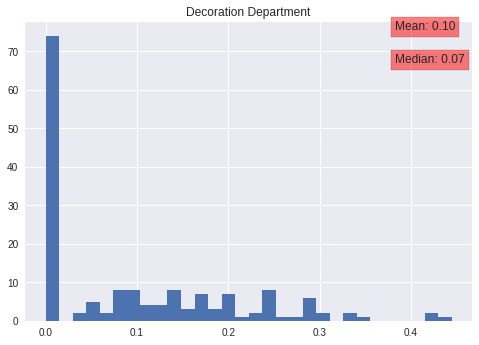

Cluster 11


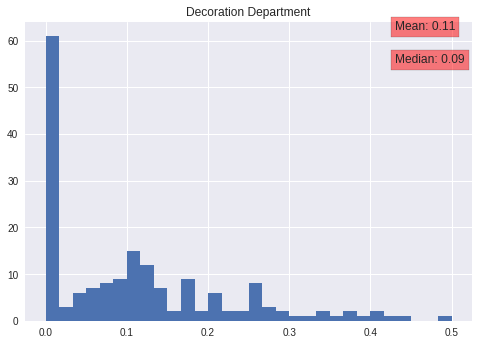

Cluster 12


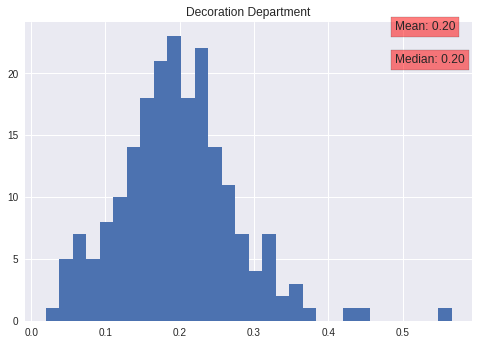

---------------------------------------------------------
count    4336.000000
mean        0.173742
std         0.131597
min         0.000000
25%         0.090909
50%         0.159033
75%         0.231707
max         1.000000
Name: Toys & Kids Deprtment, dtype: float64
Cluster 0


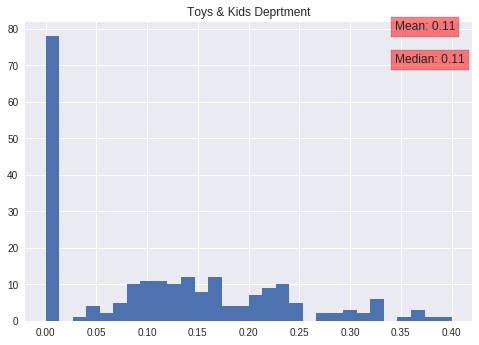

Cluster 1


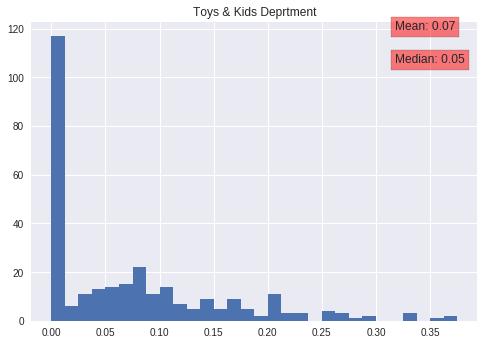

Cluster 2


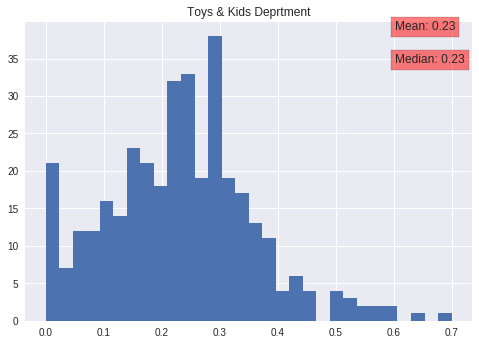

Cluster 3


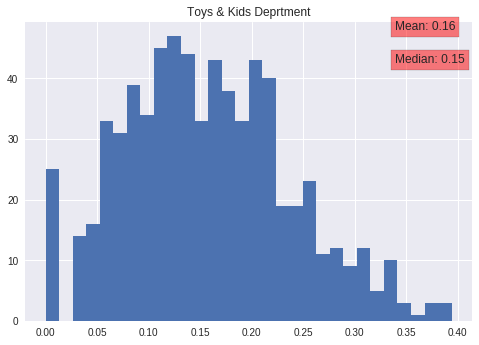

Cluster 4


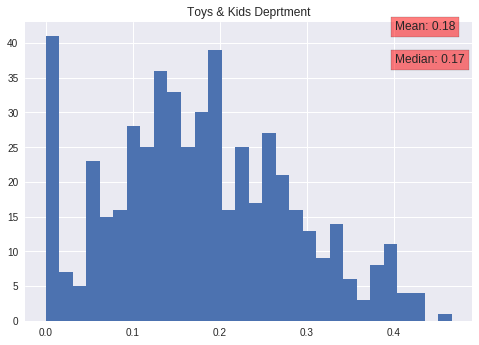

Cluster 5


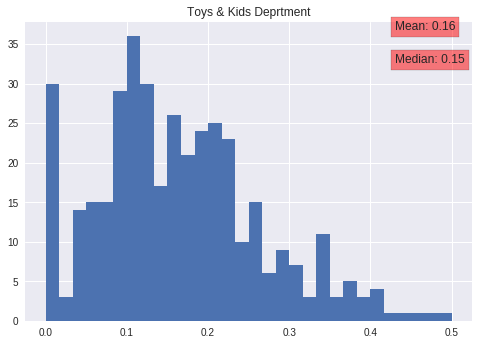

Cluster 6


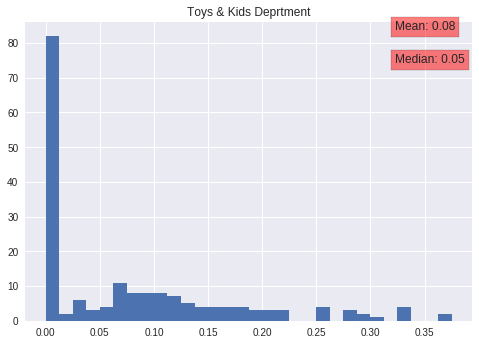

Cluster 7


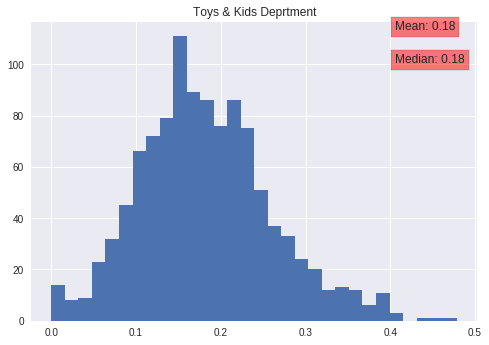

Cluster 8


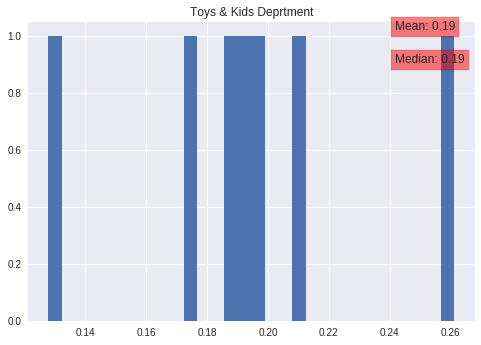

Cluster 9


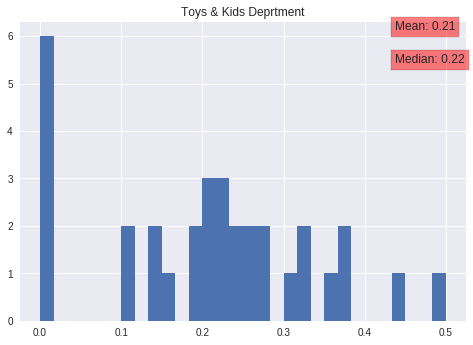

Cluster 10


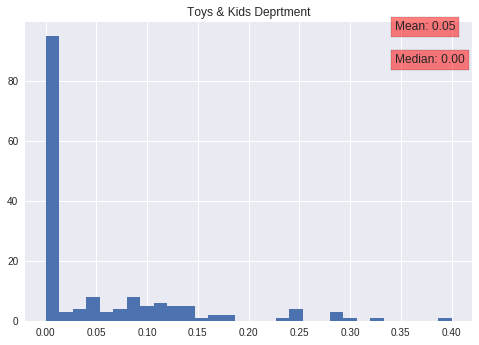

Cluster 11


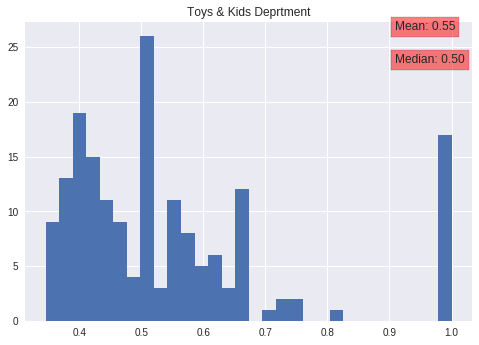

Cluster 12


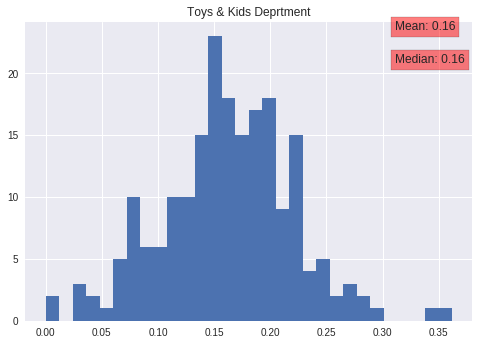

---------------------------------------------------------
count    4336.000000
mean        0.188823
std         0.141574
min         0.000000
25%         0.108352
50%         0.171429
75%         0.240000
max         1.000000
Name: Kitchen Department, dtype: float64
Cluster 0


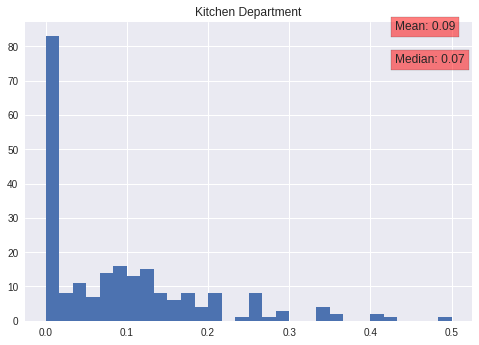

Cluster 1


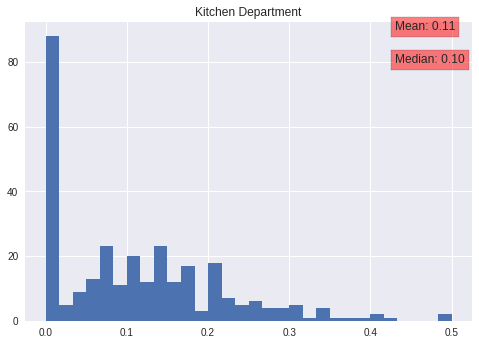

Cluster 2


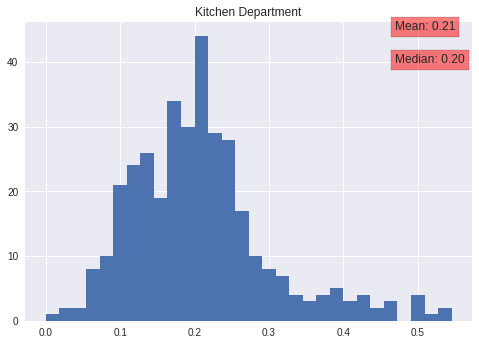

Cluster 3


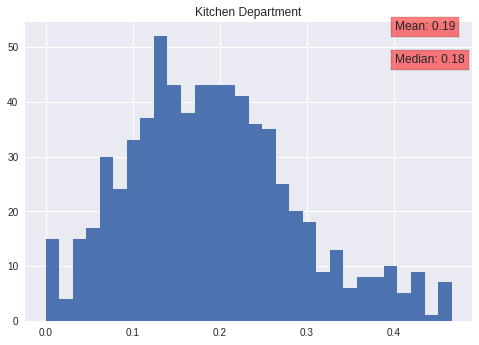

Cluster 4


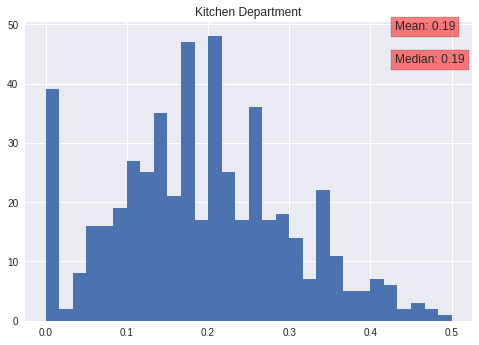

Cluster 5


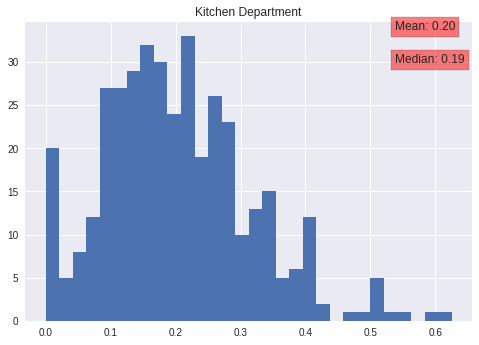

Cluster 6


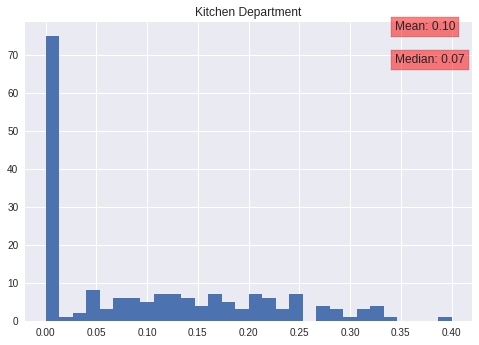

Cluster 7


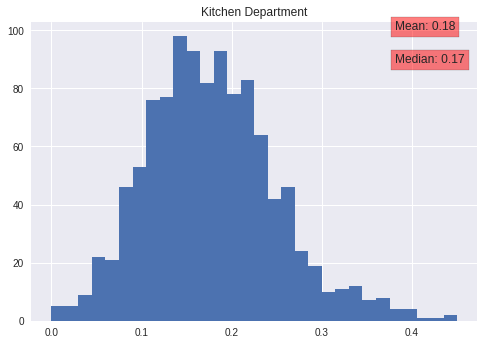

Cluster 8


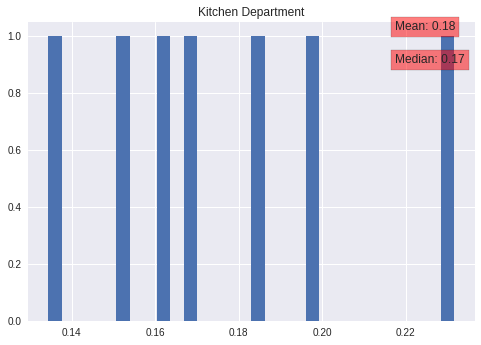

Cluster 9


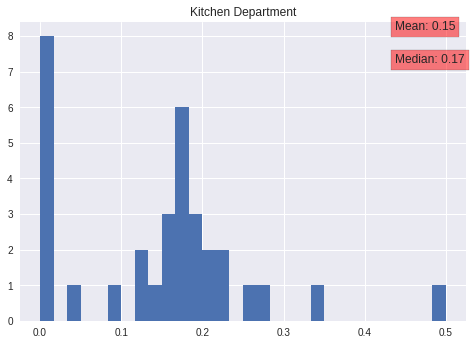

Cluster 10


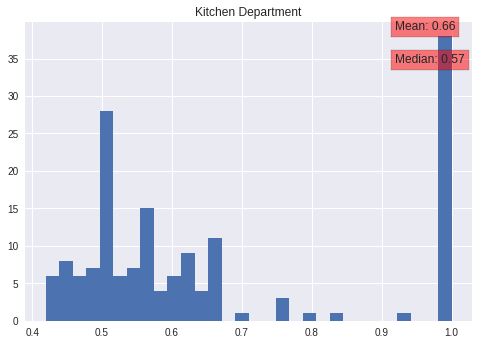

Cluster 11


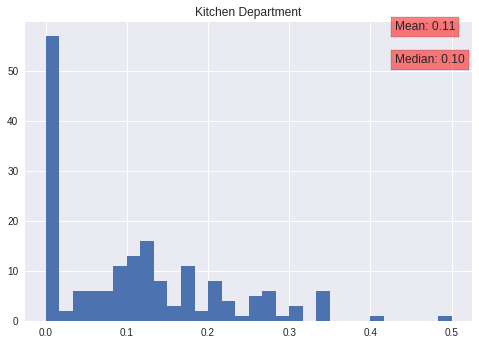

Cluster 12


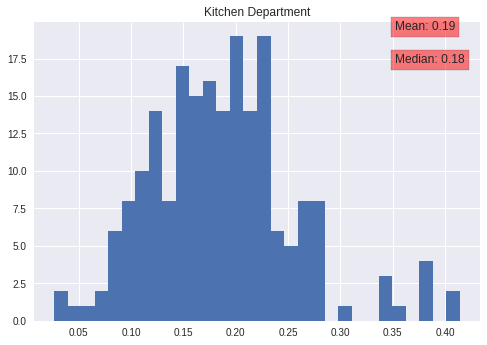

---------------------------------------------------------
count    4336.000000
mean        0.207249
std         0.147077
min         0.000000
25%         0.121212
50%         0.190476
75%         0.266901
max         1.000000
Name: Handcraft & Clothes Department, dtype: float64
Cluster 0


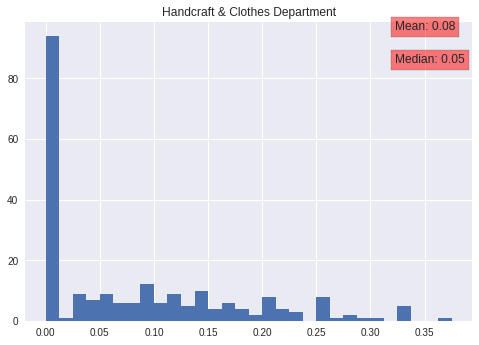

Cluster 1


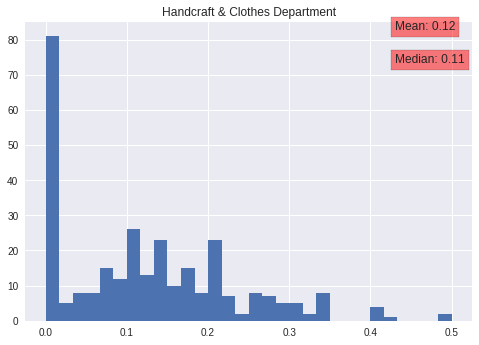

Cluster 2


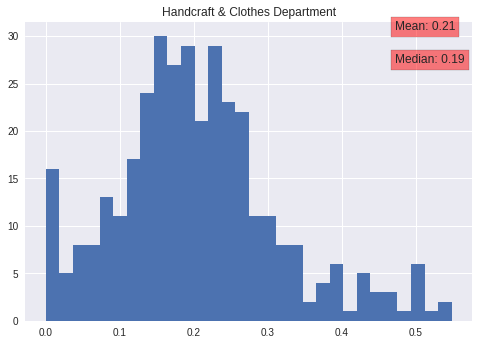

Cluster 3


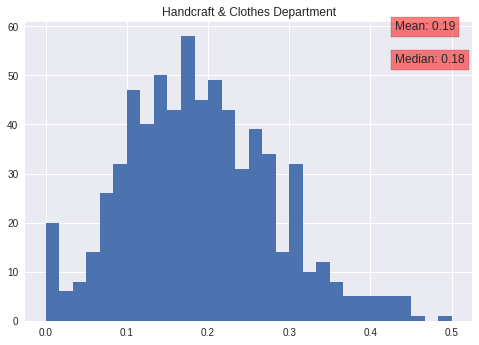

Cluster 4


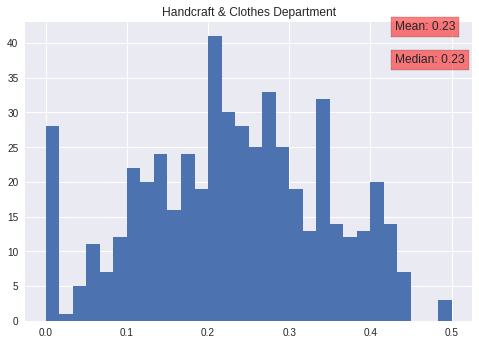

Cluster 5


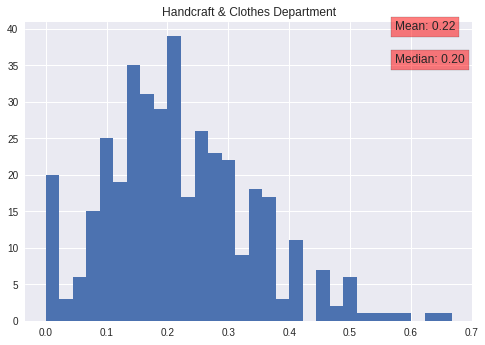

Cluster 6


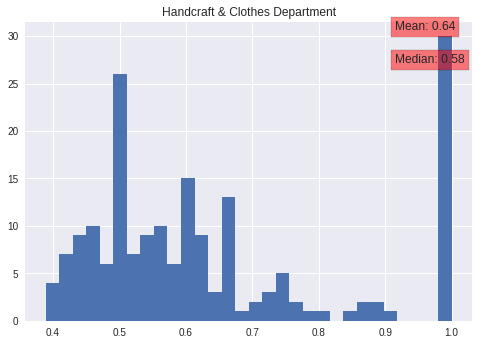

Cluster 7


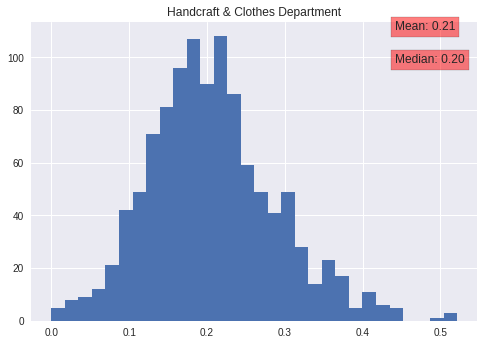

Cluster 8


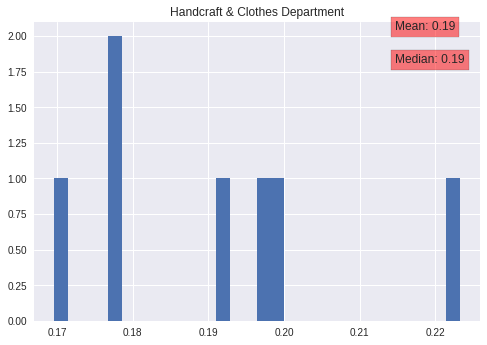

Cluster 9


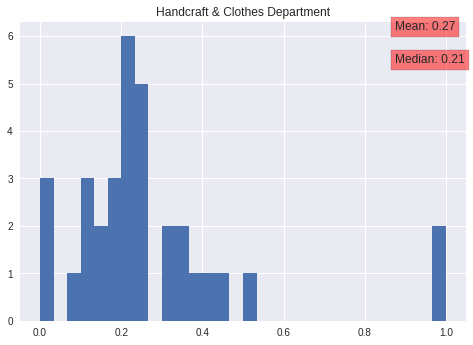

Cluster 10


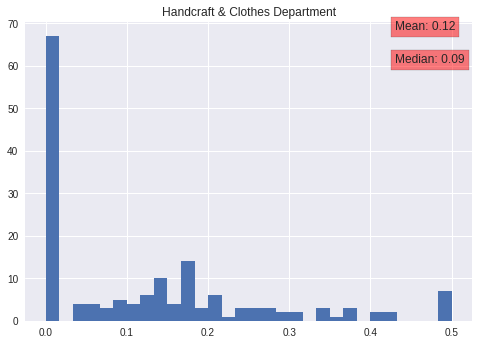

Cluster 11


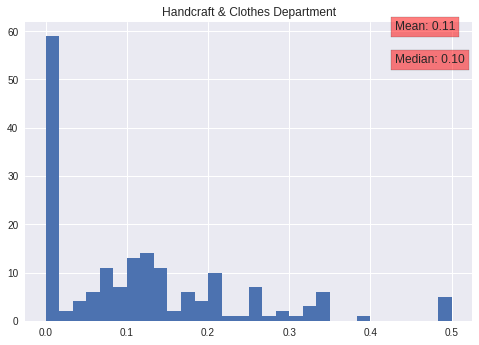

Cluster 12


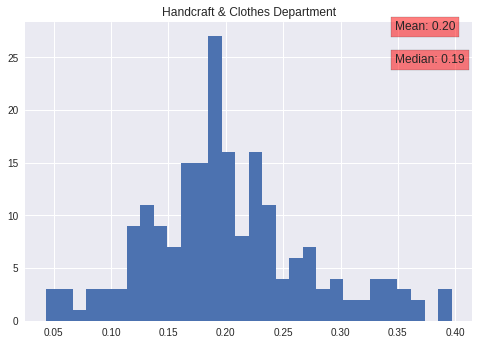

---------------------------------------------------------
count    4336.000000
mean        0.224782
std         0.156175
min         0.000000
25%         0.127273
50%         0.208333
75%         0.295024
max         1.000000
Name: Design & Viantage_Decoration Department, dtype: float64
Cluster 0


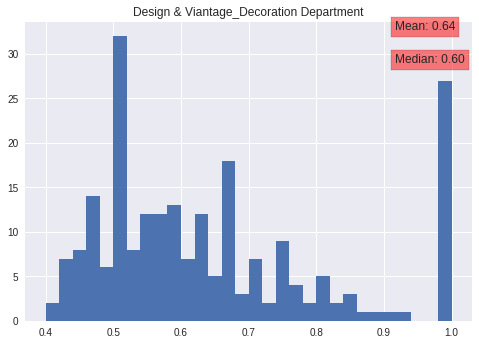

Cluster 1


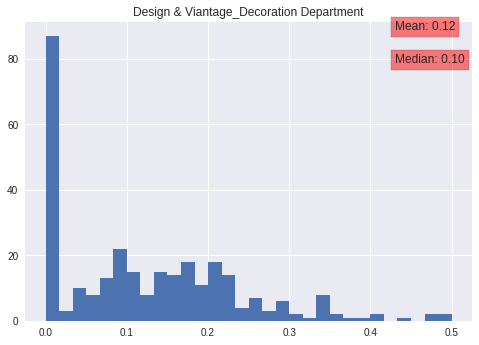

Cluster 2


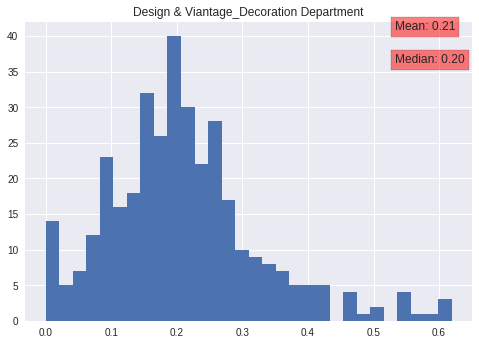

Cluster 3


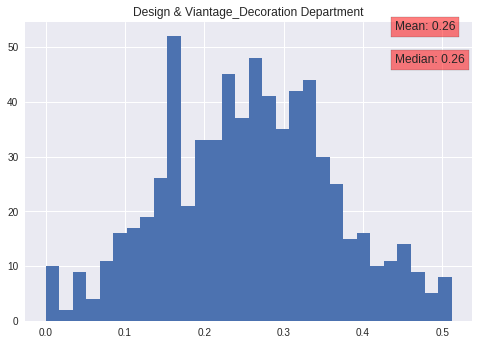

Cluster 4


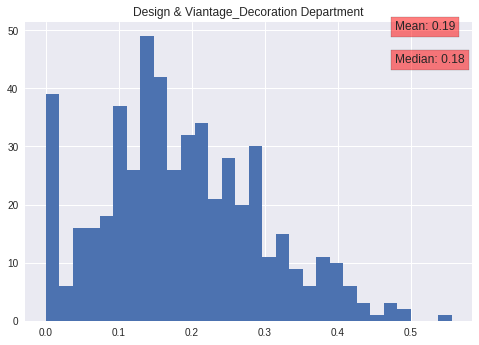

Cluster 5


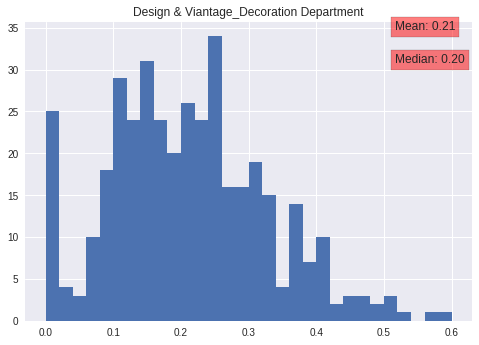

Cluster 6


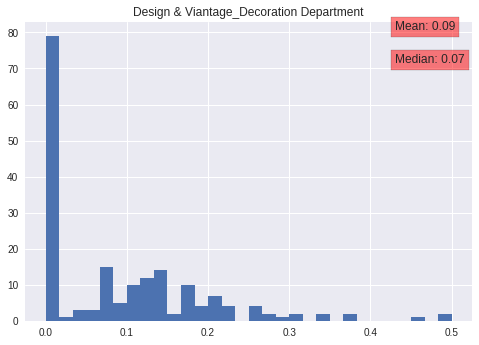

Cluster 7


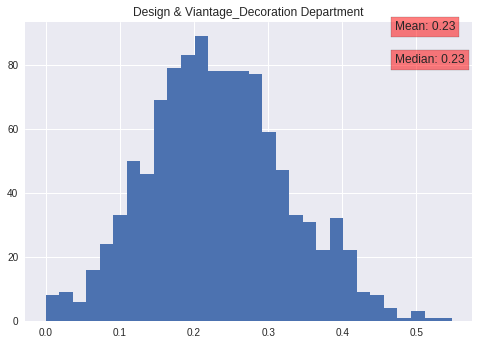

Cluster 8


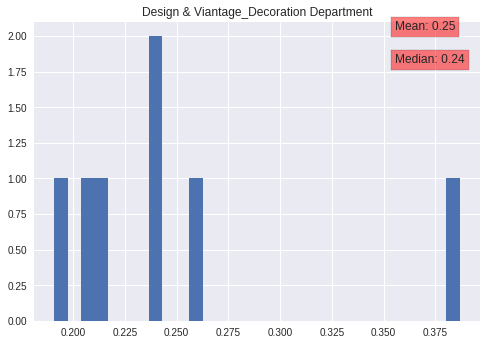

Cluster 9


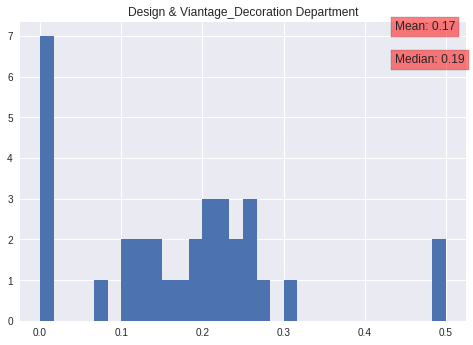

Cluster 10


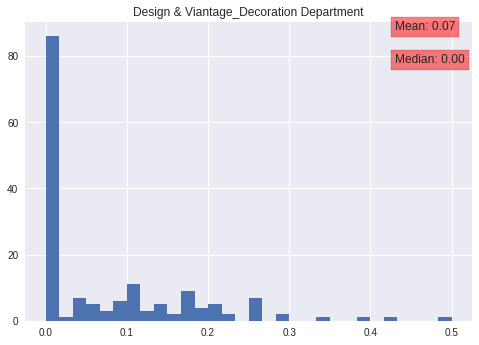

Cluster 11


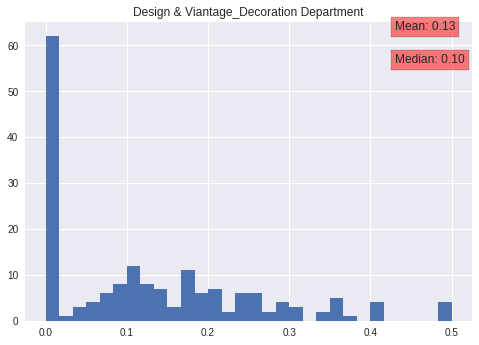

Cluster 12


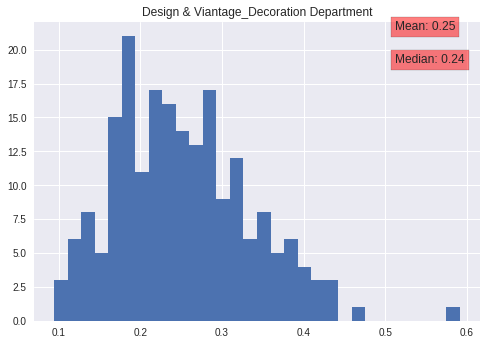

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64
Cluster 0


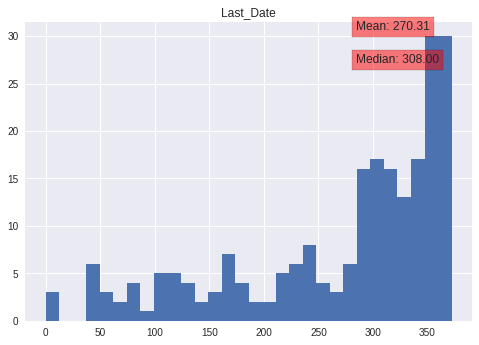

Cluster 1


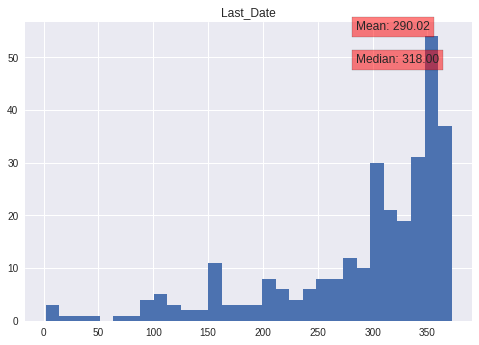

Cluster 2


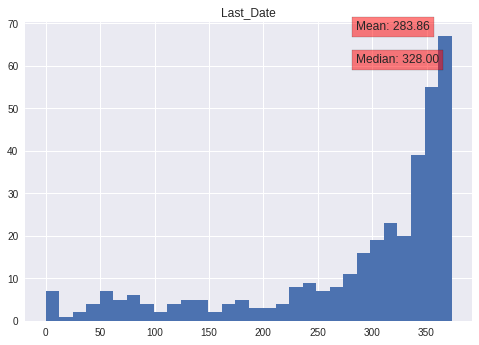

Cluster 3


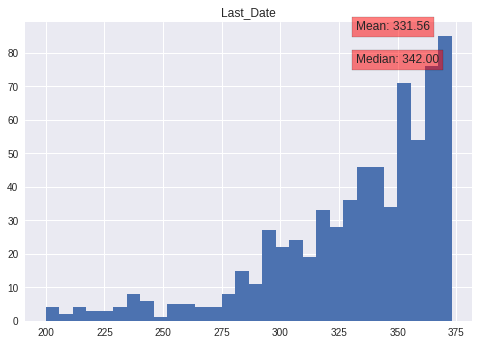

Cluster 4


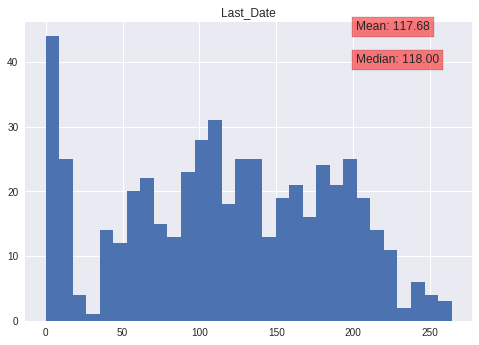

Cluster 5


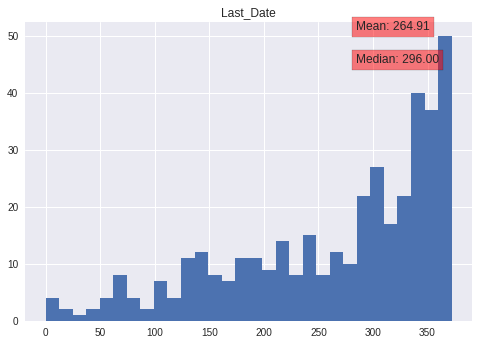

Cluster 6


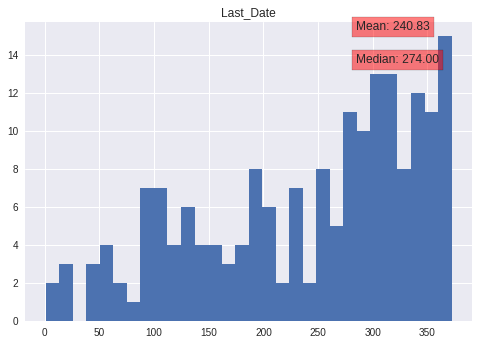

Cluster 7


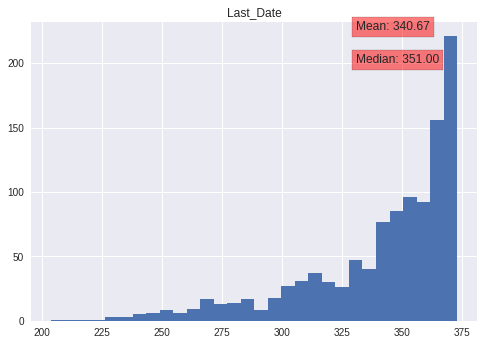

Cluster 8


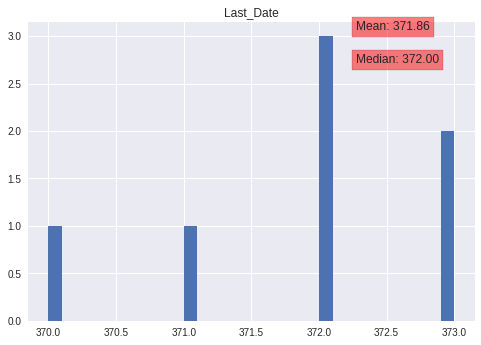

Cluster 9


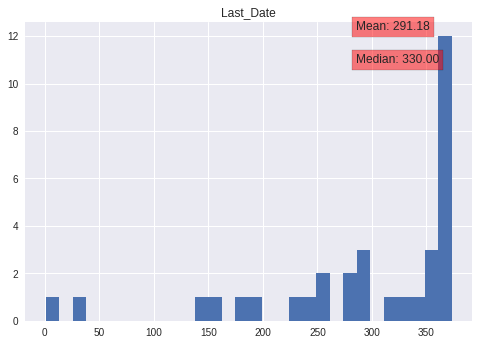

Cluster 10


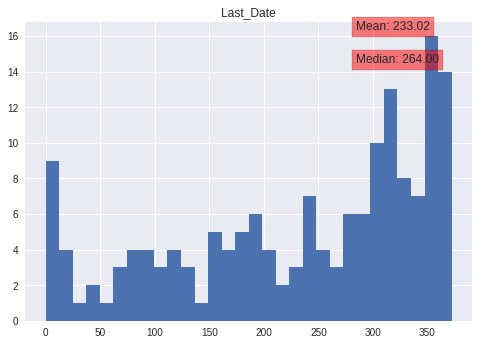

Cluster 11


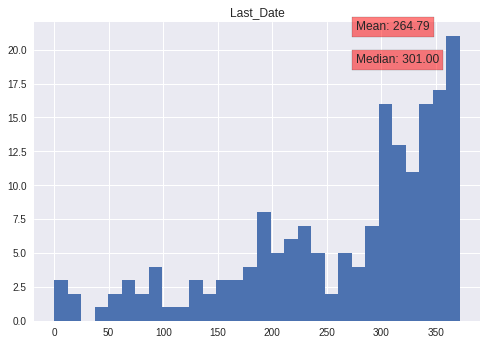

Cluster 12


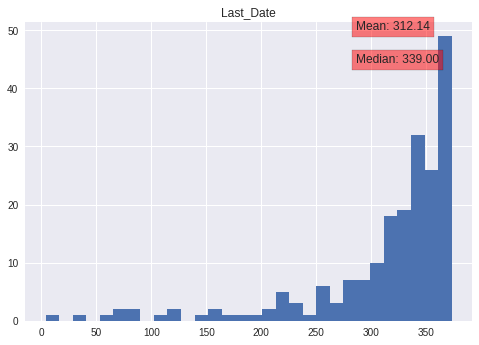

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64
Cluster 0


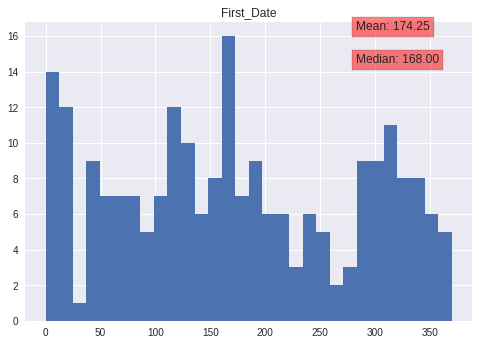

Cluster 1


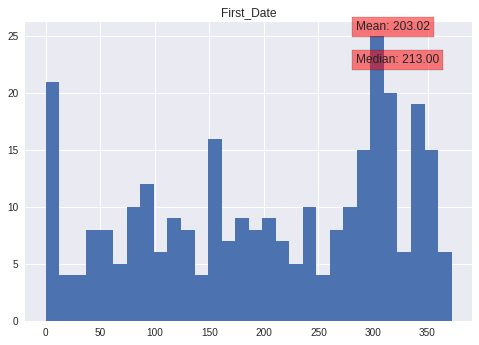

Cluster 2


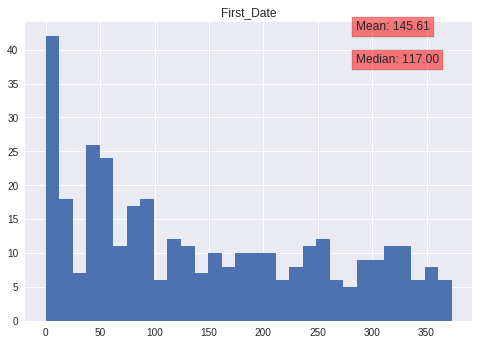

Cluster 3


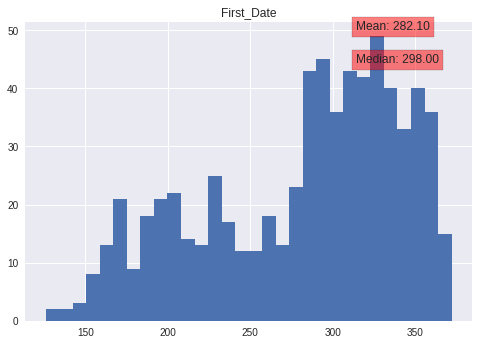

Cluster 4


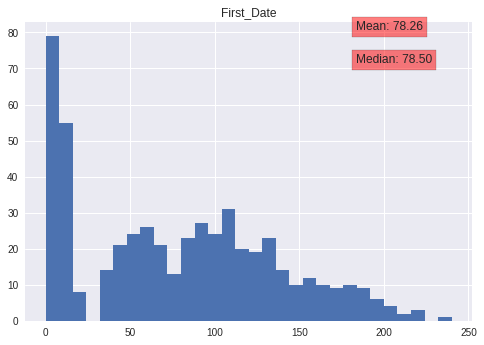

Cluster 5


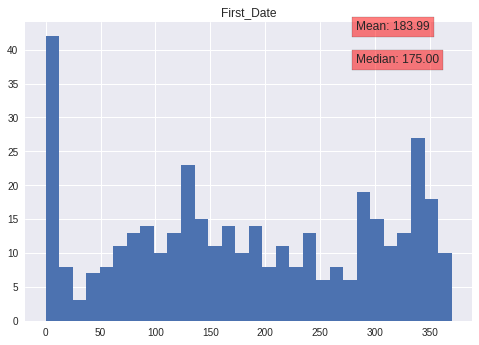

Cluster 6


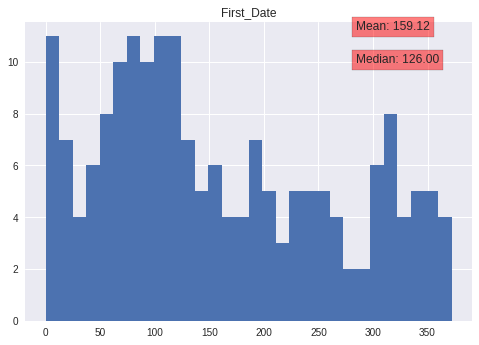

Cluster 7


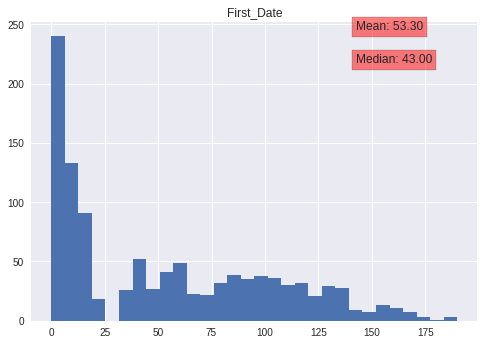

Cluster 8


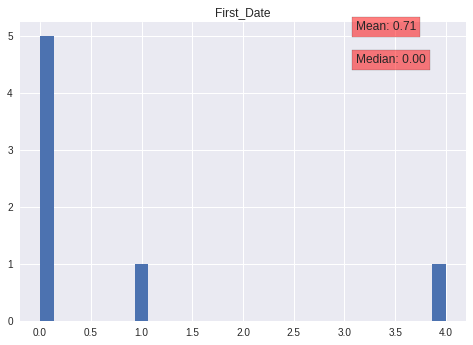

Cluster 9


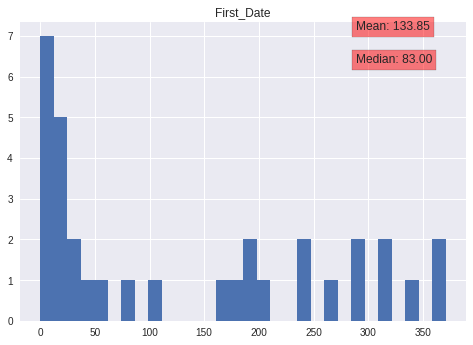

Cluster 10


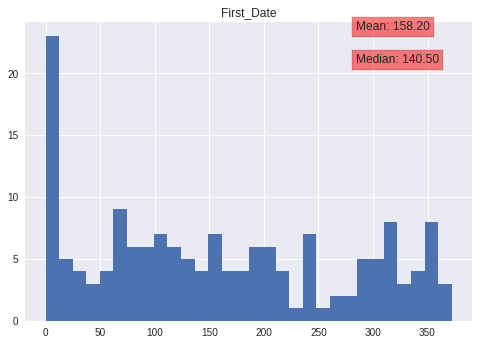

Cluster 11


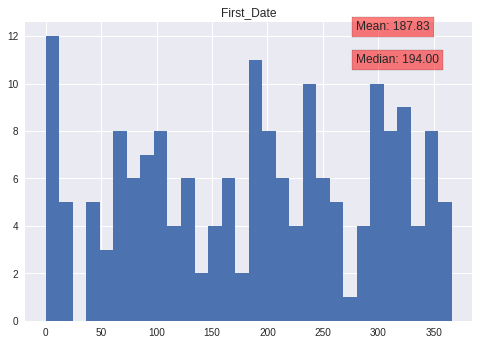

Cluster 12


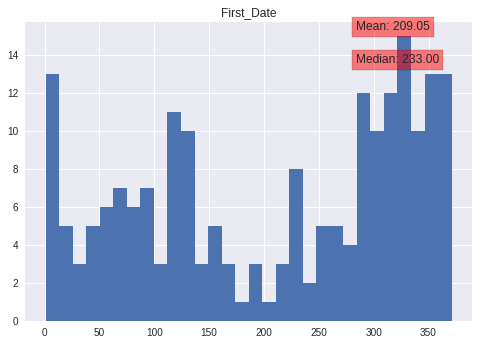

---------------------------------------------------------


In [36]:
hist_kmeans_clusters(13)

In [37]:
df_kmeans_clusters(13)

A/Number_Of_Customers B/Count_Invoices C/Average_Products_Invoice  \
0                     224         -32.09 %                   -51.71 %   
1                     298         -44.64 %                   -47.80 %   
2                     355          -2.70 %                     7.42 %   
3                     688         -47.04 %                    13.22 %   
4                     518         -58.48 %                    -8.91 %   
5                     389         -43.27 %                     2.28 %   
6                     185         -44.72 %                   -58.07 %   
7                    1096          96.99 %                    -4.20 %   
8                       7        2912.06 %                    23.11 %   
9                      33         160.25 %                    86.37 %   
10                    162         -49.15 %                   -66.64 %   
11                    177         -42.62 %                   -57.59 %   
12                    204         -35.53 %                   250.76 %   

   D/Average_Quantity_Invoice E/Average_TotaPrice_Invoice F/United Kingdom  \
0                    -15.41 %                    -14.23 %           8.20 %   
1                    -41.88 %                    -37.67 %           9.55 %   
2                     28.82 %                     45.45 %        -100.00 %   
3                     -1.54 %                     -8.76 %          10.67 %   
4                    -27.97 %                    -23.75 %          10.67 %   
5                    -27.64 %                    -28.97 %           6.12 %   
6                    -34.88 %                    -34.17 %           5.28 %   
7                     -3.20 %                     -4.51 %          10.67 %   
8                      2.21 %                      2.54 %          -5.14 %   
9                    937.67 %                    978.76 %         -42.99 %   
10                   -21.97 %                    -33.34 %           5.89 %   
11                   -31.10 %                    -27.10 %           8.17 %   
12                    98.39 %                     83.40 %           9.58 %   

   G/Decoration Department H/Toys & Kids Deprtment I/Kitchen Department  \
0                 -64.45 %                -34.76 %             -53.45 %   
1                 178.41 %                -57.82 %             -41.61 %   
2                 -29.35 %                 33.82 %               9.83 %   
3                   0.53 %                -10.09 %               1.31 %   
4                   3.21 %                  2.89 %               1.32 %   
5                   1.34 %                 -6.83 %               6.97 %   
6                 -54.43 %                -55.54 %             -47.62 %   
7                  -2.47 %                  4.97 %              -5.78 %   
8                  -6.43 %                 11.52 %              -6.90 %   
9                  -0.53 %                 20.22 %             -22.59 %   
10                -53.73 %                -70.66 %             249.03 %   
11                -48.04 %                214.61 %             -42.89 %   
12                 -3.98 %                 -6.63 %              -1.12 %   

   J/Handcraft & Clothes Department K/Design & Viantage_Decoration Department  \
0                          -60.38 %                                  186.33 %   
1                          -40.87 %                                  -45.70 %   
2                           -1.08 %                                   -6.59 %   
3                           -8.77 %                                   14.31 %   
4                           11.23 %                                  -16.62 %   
5                            5.44 %                                   -6.82 %   
6                          208.44 %                                  -59.51 %   
7                           -0.08 %                                    3.34 %   
8                           -7.88 %                                   10.04 %   
9                          

In [0]:
def hist_dbscan_clusters(epsilon, minimum):
    ''' For each feature this fonction plot histograms of your dbscan model's clusters.
    
    Parameters:
      
      epsilon (float): the value of eps in DBSCAN clustering
      minimum (int): the value of min_samples in DBSCAN clustering
      
  '''
  
    dbsc = DBSCAN(eps =epsilon, min_samples = minimum).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype = bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels))
  
    fig, ax = plt.subplots(figsize=(7,6))

    for i in ['Count_Invoices', 'Average_Products_Invoice',
              'Average_Quantity_Invoice', 'Average_TotaPrice_Invoice',
              'United Kingdom', 'Decoration Department', 'Toys & Kids Deprtment',
              'Kitchen Department', 'Handcraft & Clothes Department',
              'Design & Viantage_Decoration Department']:
        print(df_customers[i].describe())

        for id_cluster in range(-1, n_clusters_ -1):
            print("Cluster %d" % id_cluster)
            index = np.where(labels == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Median = df_customers[i][index].median()
            plt.hist(df_customers[i][index], bins = 30)
            plt.text(0.85, 0.8, 'Mean: %.2f' % Mean, bbox=dict(facecolor='red',
                                                                  alpha=0.5),
                    transform=ax.transAxes)
            plt.text(0.85, 0.7, 'Median: %.2f' % Median, bbox=dict(facecolor='red',
                                                                    alpha=0.5),
                    transform=ax.transAxes)
            plt.title(i)
            plt.show()
        print('---------------------------------------------------------')

        for j in ['Last_Date', 'First_Date']:
            print(df_customers[j].describe())

            for id_cluster in range(-1, n_clusters_ -1):
                index = np.where(labels == id_cluster)[0]
                Mean = df_customers[j][index].mean()
                Median = df_customers[j][index].median()
                plt.hist(df_customers[j][index], bins = 30)
                plt.text(0.75, 0.8, 'Mean: %.2f' % Mean, bbox=dict(facecolor='red',
                                                                      alpha=0.5),
                        transform=ax.transAxes)
                plt.text(0.75, 0.7, 'Median: %.2f' % Median, bbox=dict(facecolor='red',
                                                                        alpha=0.5),
                         transform=ax.transAxes)
                plt.title(j)
                plt.show()

            print('---------------------------------------------------------')  

In [0]:
def df_dbscan_clusters(epsilon, minimum):
    ''' Show a dataframe with the average percentage difference betwean the mean 
        of each feature and the value of each point for each dbscan model's clusters.
  
    Parameters:
      
        epsilon (float): the value of eps in DBSCAN clustering
        minimum (int): the value of min_samples in DBSCAN clustering
      
    '''
  
    dbsc = DBSCAN(eps =epsilon, min_samples = minimum).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype = bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels))
    my_dict={}
    alphabet = 'BCDEFGHIJKLM'
    my_dict['A/Number_Of_Customers'] = [len(np.where(labels == id_cluster)[0])
                                      for id_cluster in range(-1, n_clusters_ -1)]

    for h,i in enumerate(['Count_Invoices', 'Average_Products_Invoice',
                          'Average_Quantity_Invoice', 'Average_TotaPrice_Invoice',
                          'United Kingdom', 'Decoration Department', 'Toys & Kids Deprtment',
                          'Kitchen Department', 'Handcraft & Clothes Department',
                          'Design & Viantage_Decoration Department', 'Last_Date', 'First_Date']):
        feature = []

        for id_cluster in range(-1, n_clusters_ -1):
            index = np.where(labels == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Mean_feature = df_customers[i].mean()
            pourcentage_mean = str('%.2f' % ((Mean - Mean_feature)*100/Mean_feature)) + ' %'
            feature.append(pourcentage_mean)
      
        my_dict[alphabet[h] + '/' + i] = feature
  
    feature = []
  
    for id_cluster in range(-1, n_clusters_ -1):
        index = np.where(labels == id_cluster)[0]
        time_minutes = data["Time_Minutes"][index].mean()
        hour = time_minutes // 60
        minutes = time_minutes % 60
        feature.append("%d:%02d" % (hour, minutes))
      
    my_dict['N' + '/' + 'Time_Minutes_Mean'] = feature
    Clusters_df = pd.DataFrame(my_dict, index=range(-1, n_clusters_ -1))
  
    return Clusters_df.head(n_clusters_)

count    4336.000000
mean        4.273293
std         7.699536
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: Count_Invoices, dtype: float64
Cluster -1


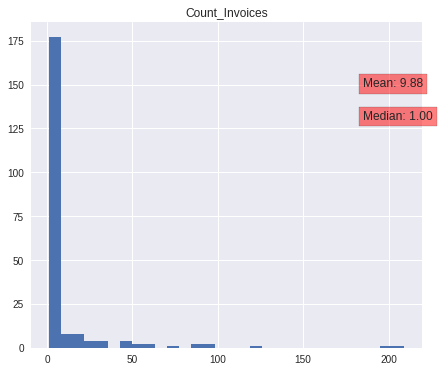

Cluster 0


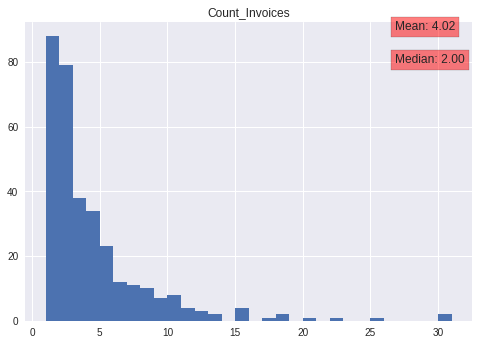

Cluster 1


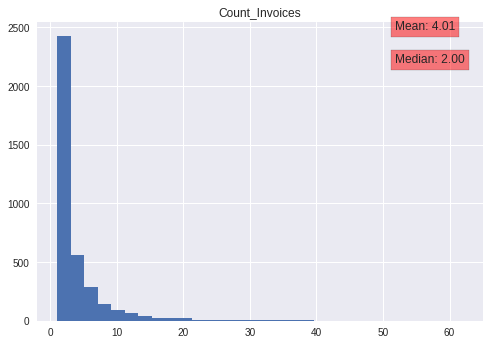

Cluster 2


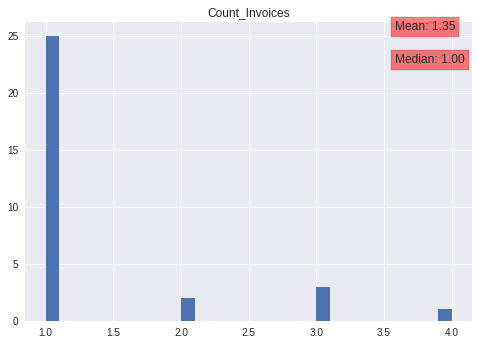

Cluster 3


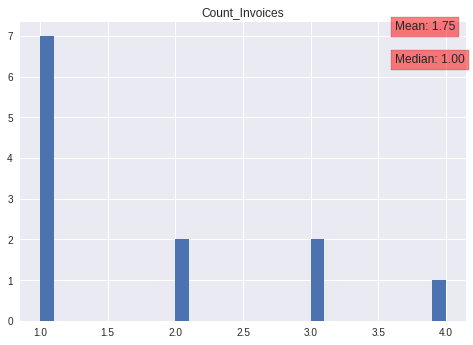

Cluster 4


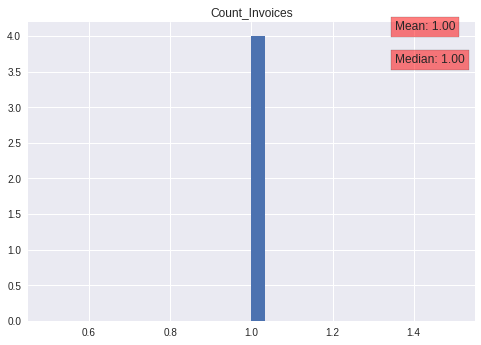

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


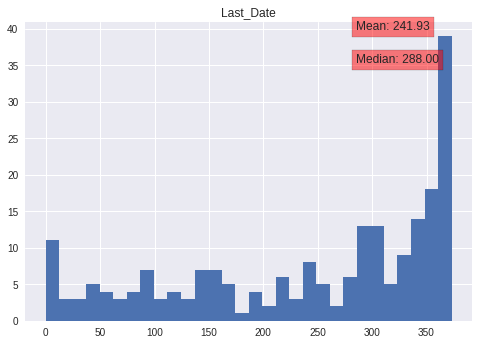

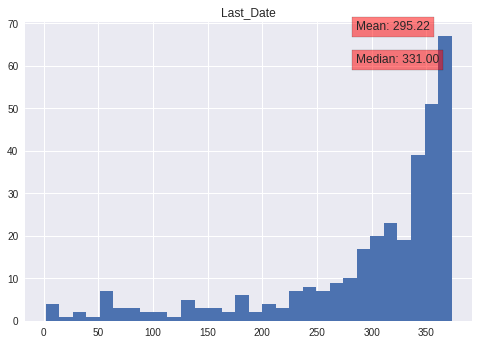

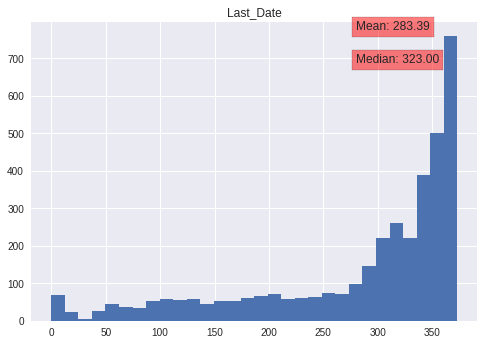

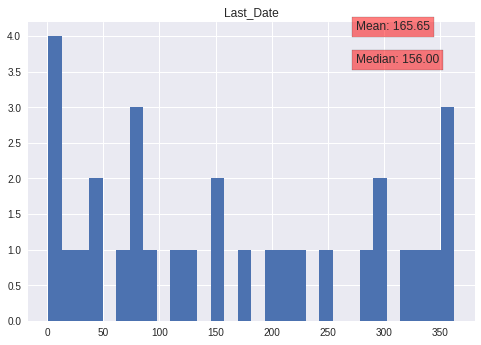

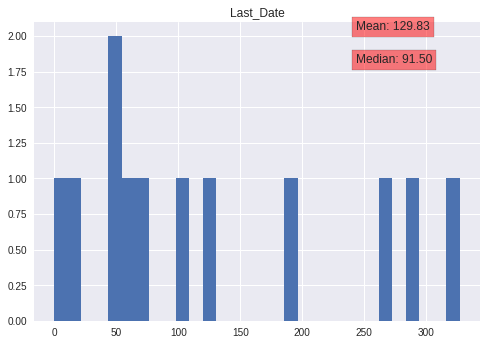

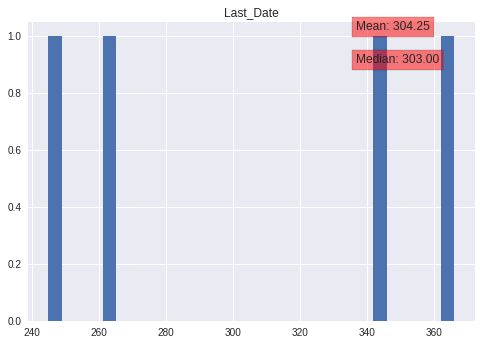

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


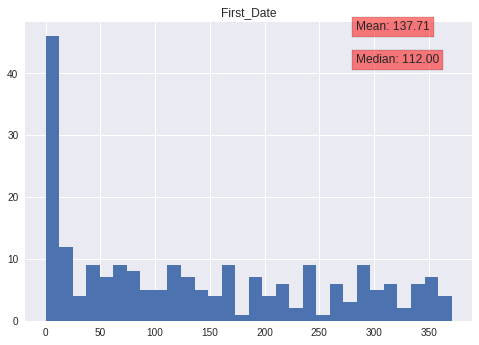

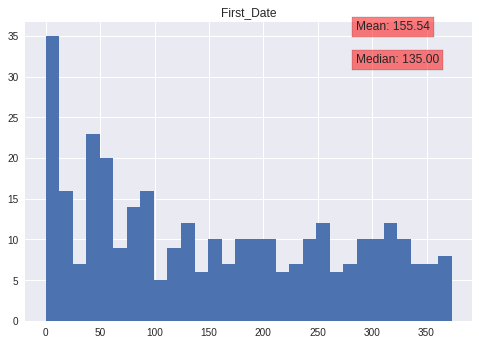

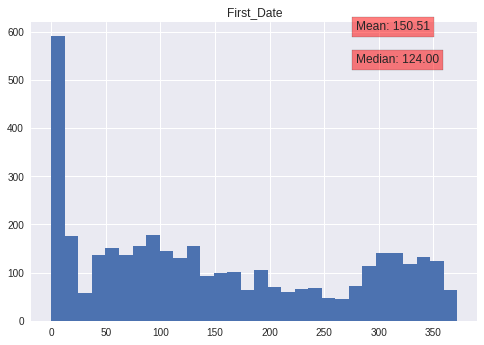

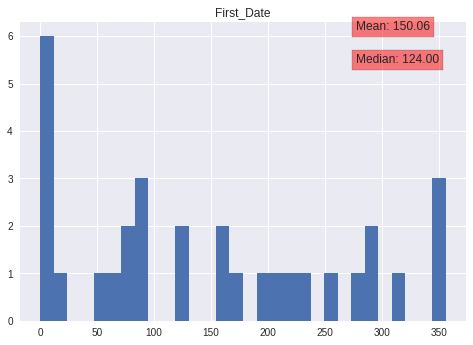

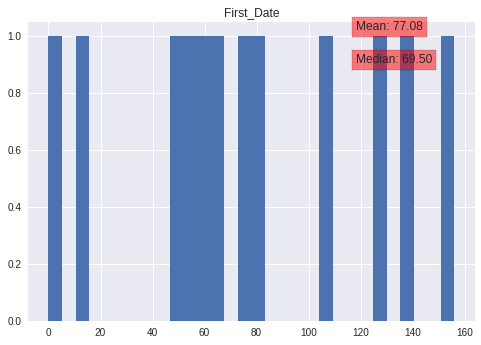

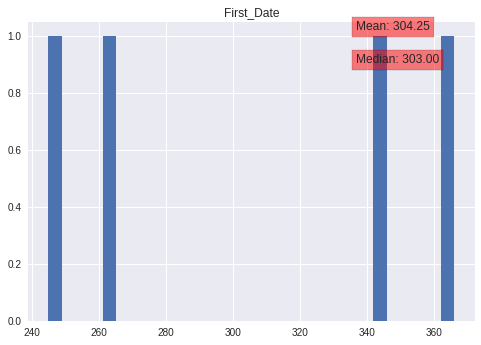

---------------------------------------------------------
count    4336.000000
mean       21.844331
std        19.636356
min         1.000000
25%         9.500000
50%        17.000000
75%        28.000000
max       300.647059
Name: Average_Products_Invoice, dtype: float64
Cluster -1


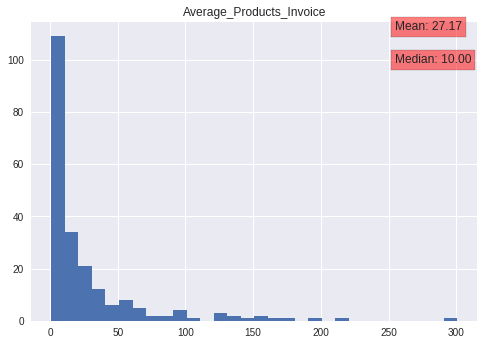

Cluster 0


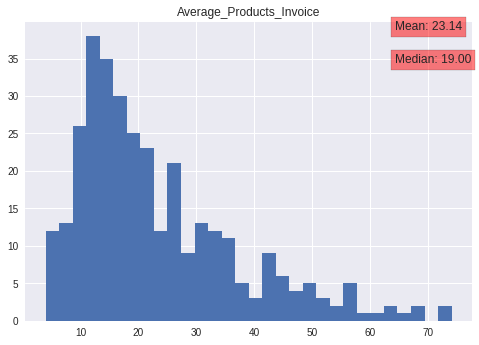

Cluster 1


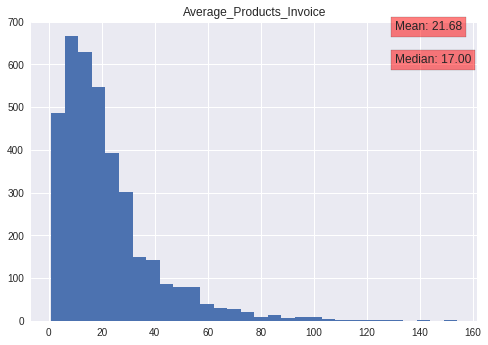

Cluster 2


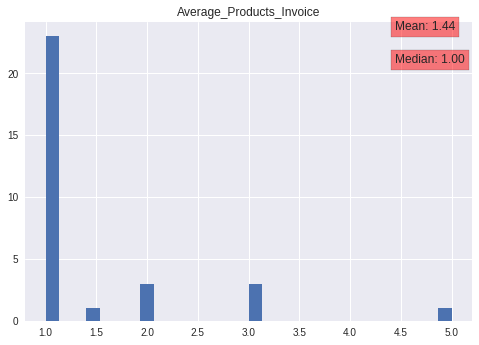

Cluster 3


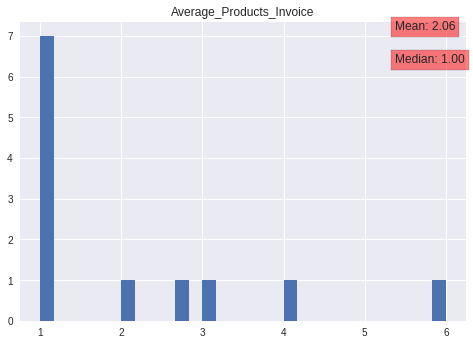

Cluster 4


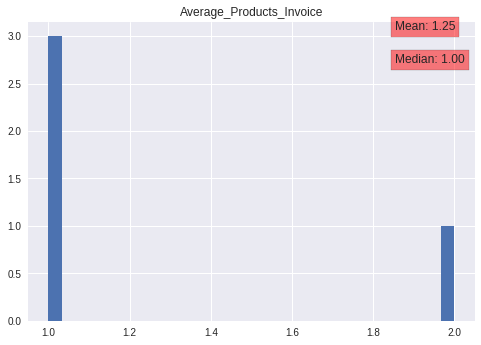

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


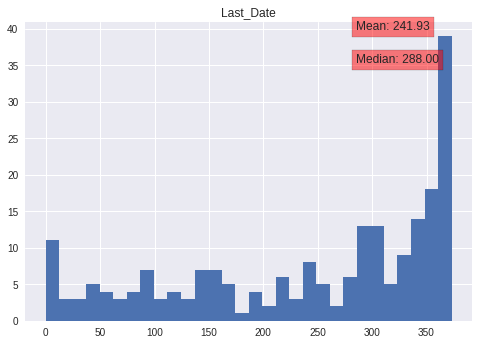

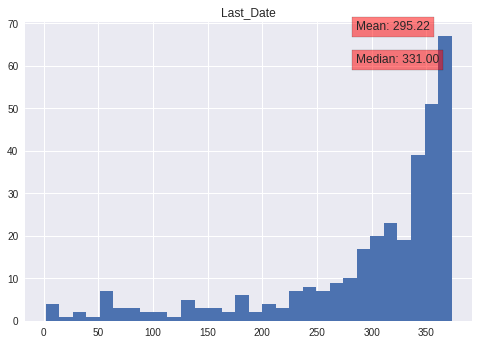

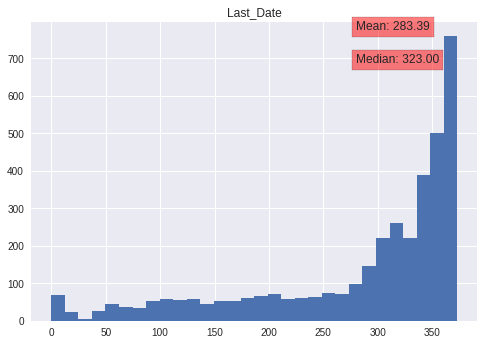

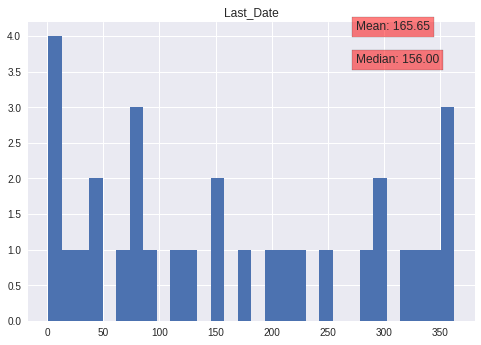

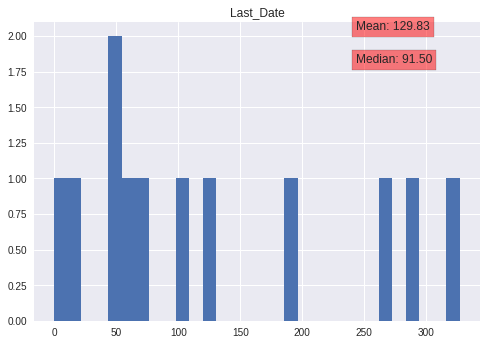

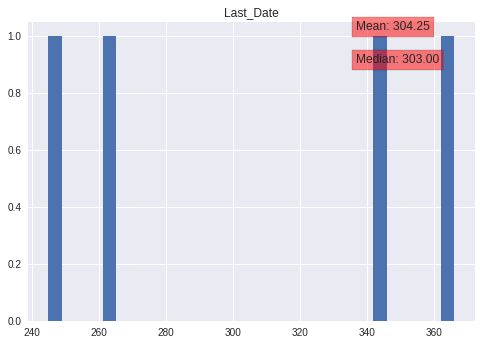

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


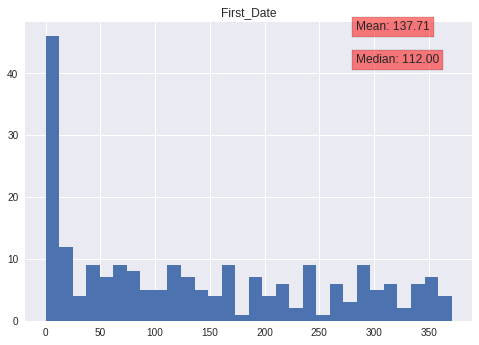

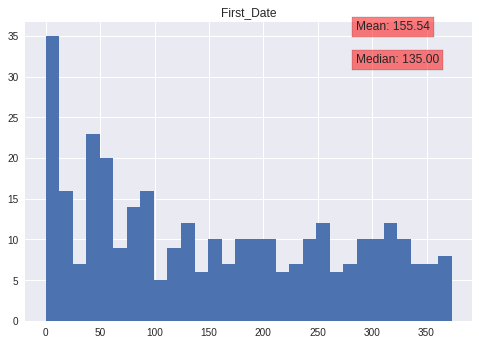

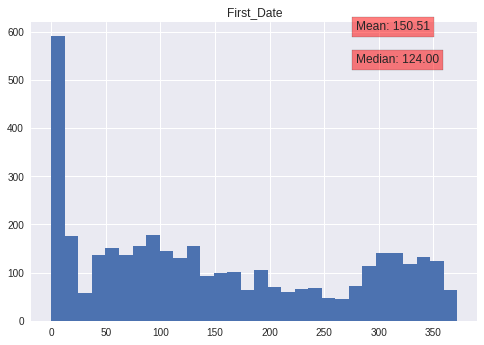

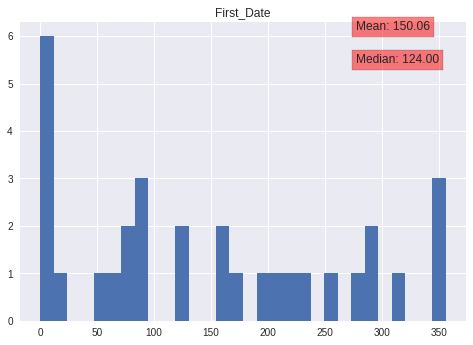

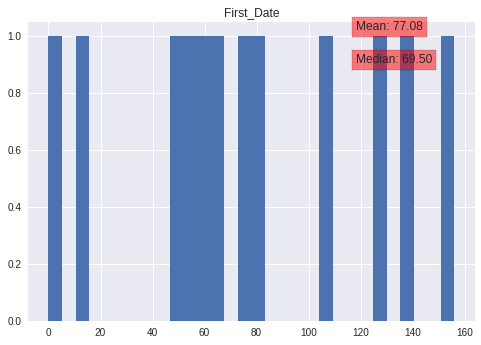

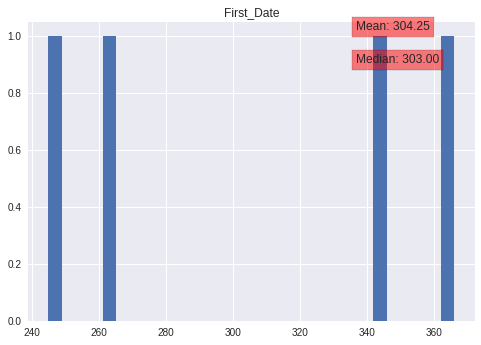

---------------------------------------------------------
count    4336.000000
mean      226.123277
std       296.468316
min         1.000000
25%        92.000000
50%       161.000000
75%       270.000000
max      7824.000000
Name: Average_Quantity_Invoice, dtype: float64
Cluster -1


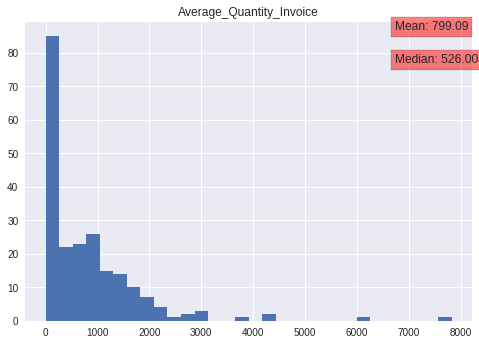

Cluster 0


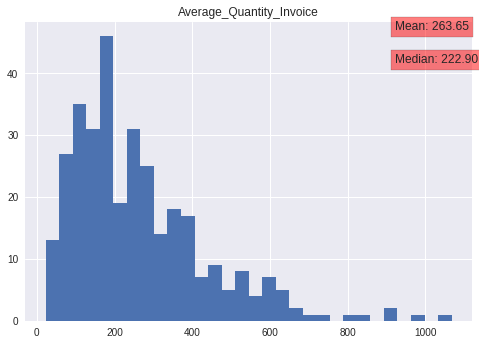

Cluster 1


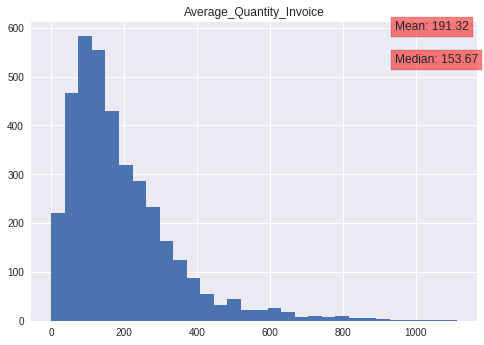

Cluster 2


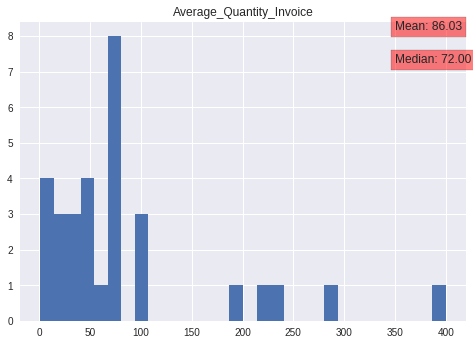

Cluster 3


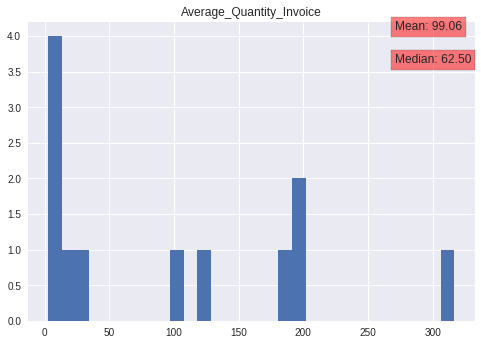

Cluster 4


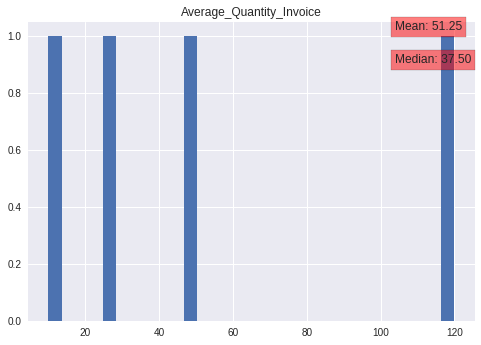

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


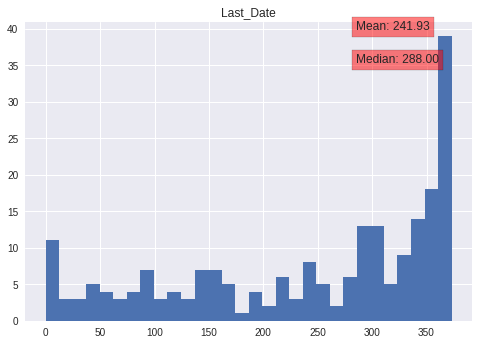

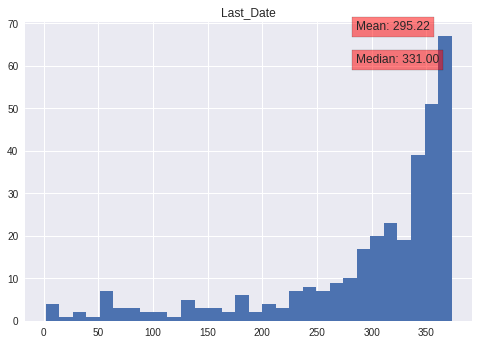

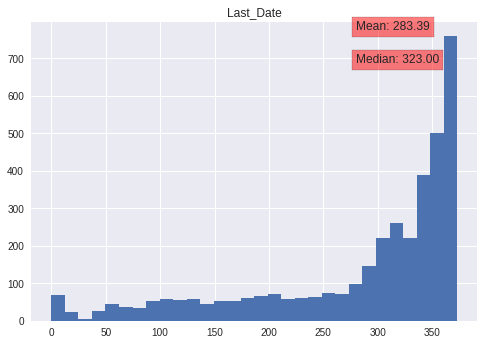

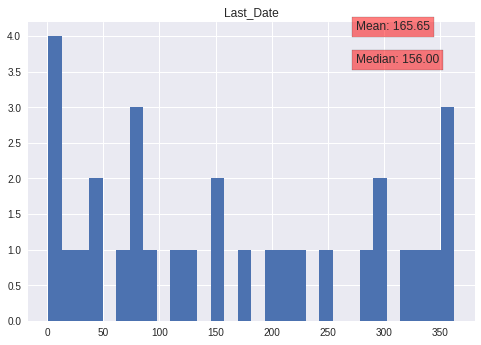

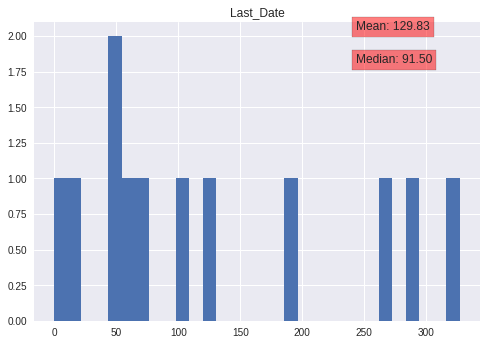

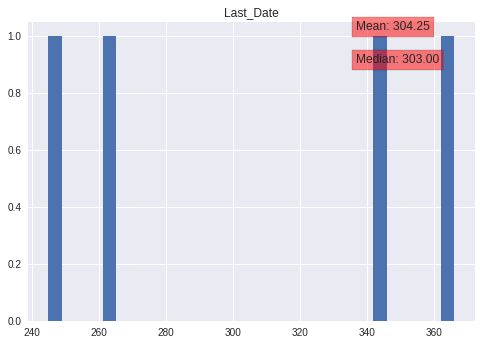

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


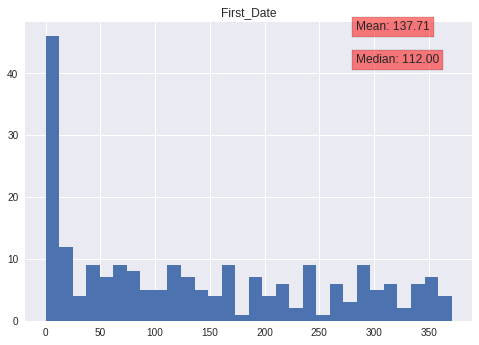

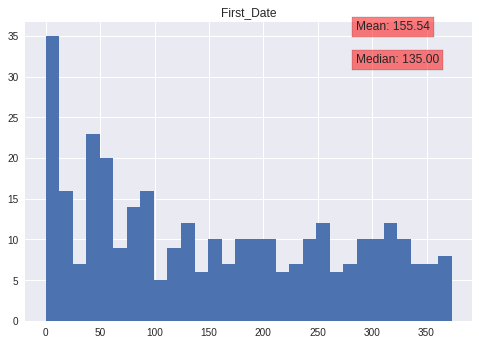

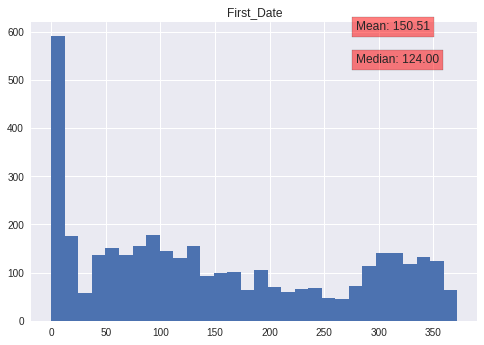

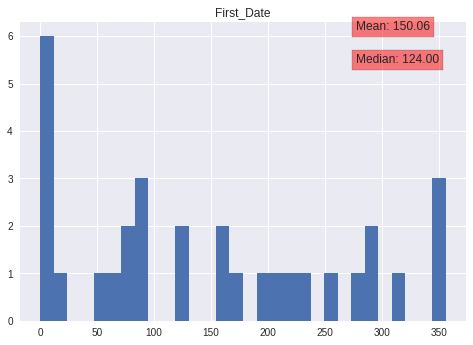

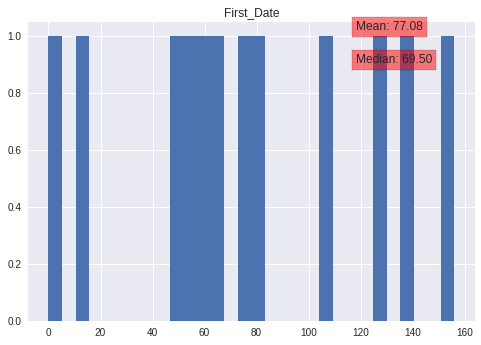

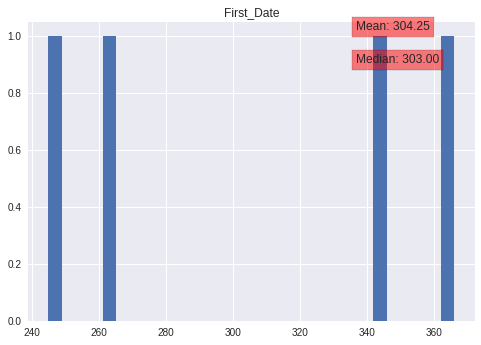

---------------------------------------------------------
count     4336.000000
mean       380.610551
std        497.501543
min          3.450000
25%        177.848393
50%        291.877500
75%        428.053125
max      14844.766667
Name: Average_TotaPrice_Invoice, dtype: float64
Cluster -1


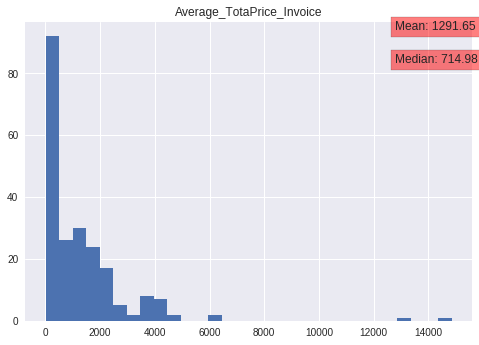

Cluster 0


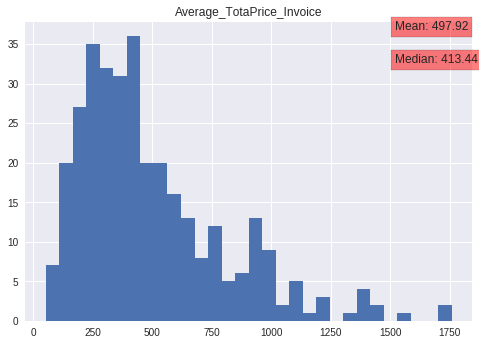

Cluster 1


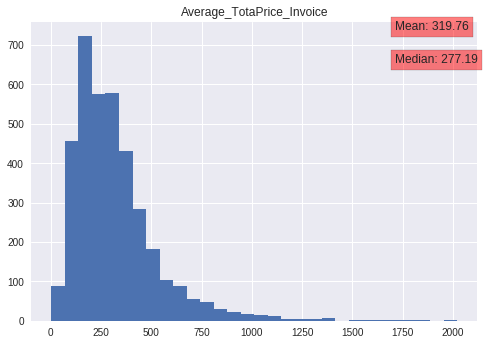

Cluster 2


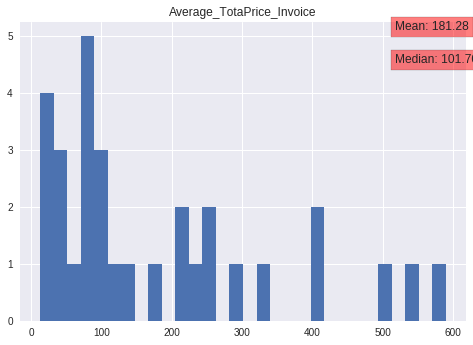

Cluster 3


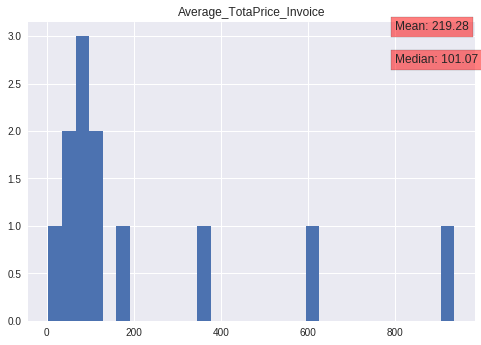

Cluster 4


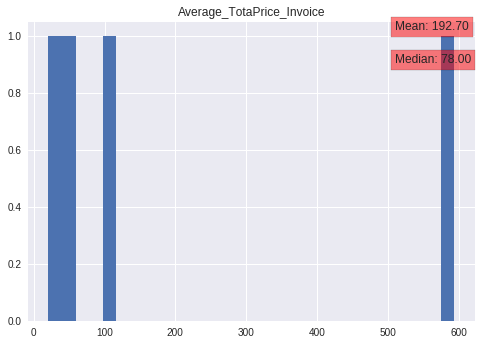

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


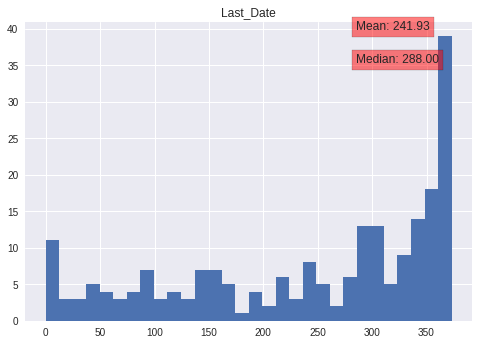

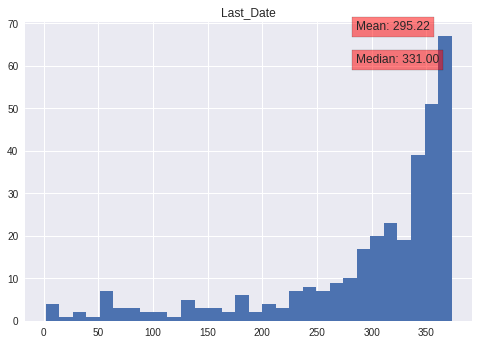

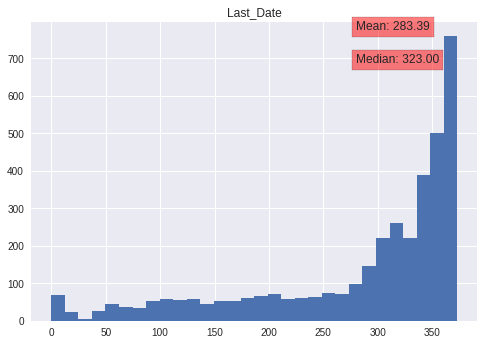

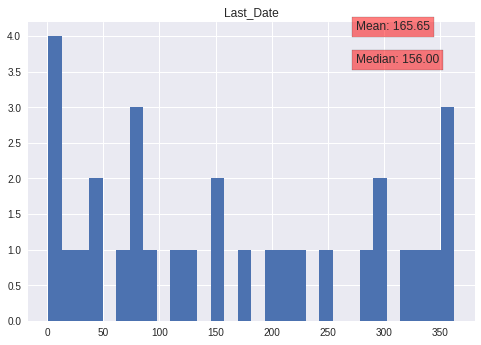

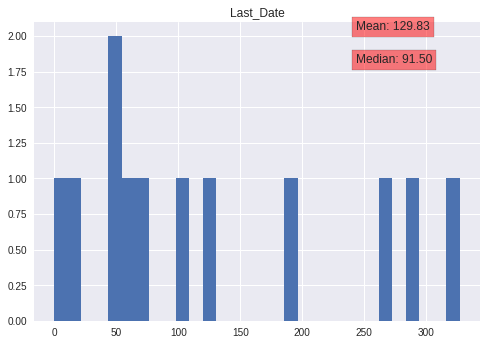

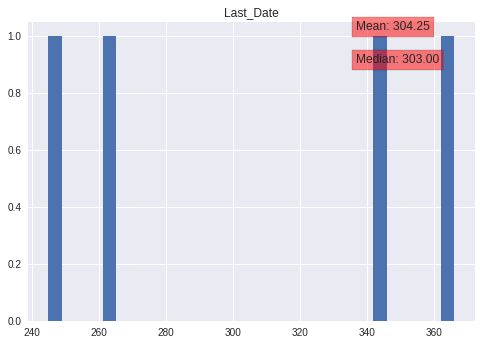

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


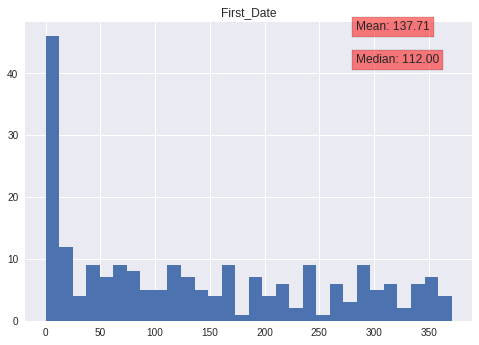

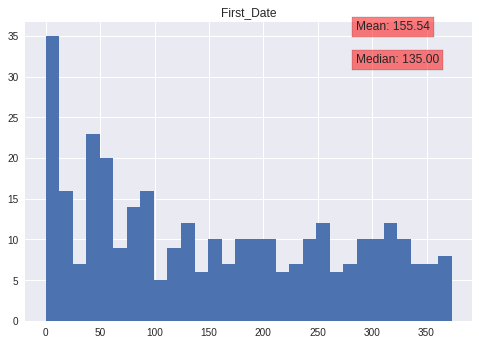

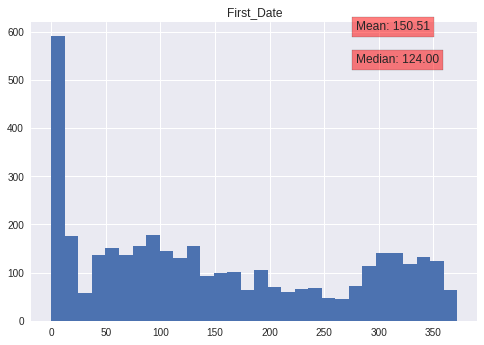

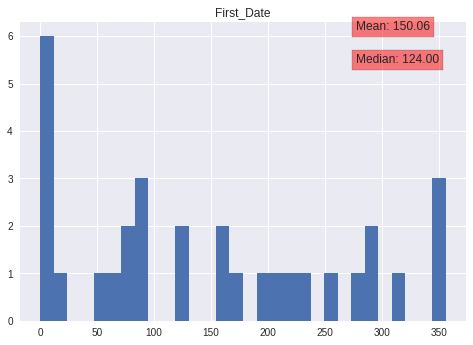

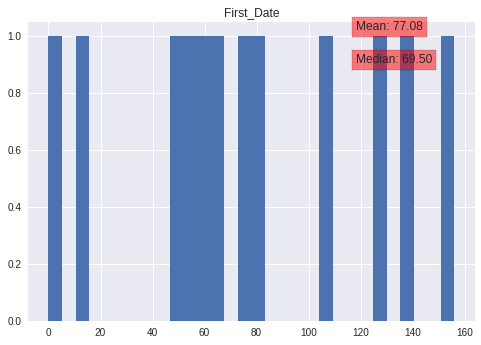

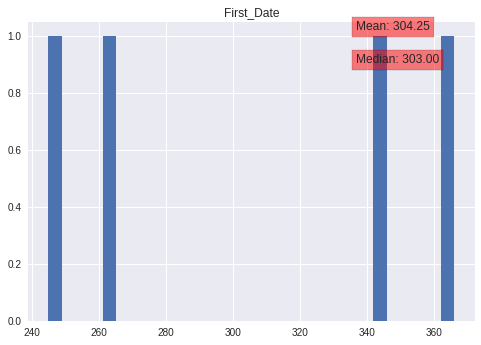

---------------------------------------------------------
count    4336.000000
mean        0.903598
std         0.295176
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: United Kingdom, dtype: float64
Cluster -1


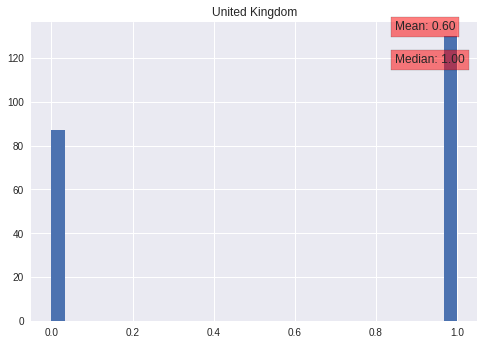

Cluster 0


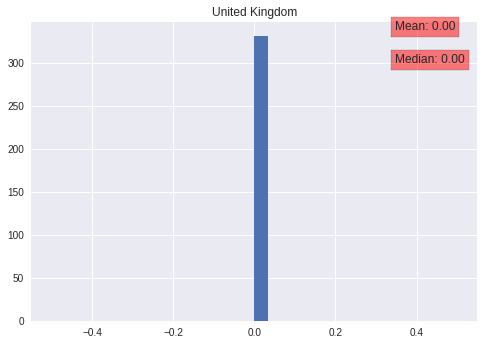

Cluster 1


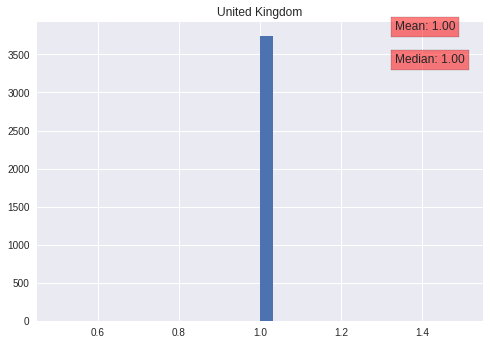

Cluster 2


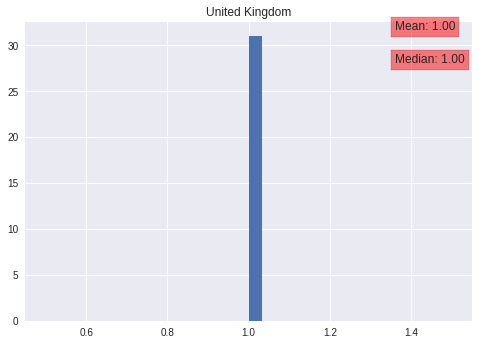

Cluster 3


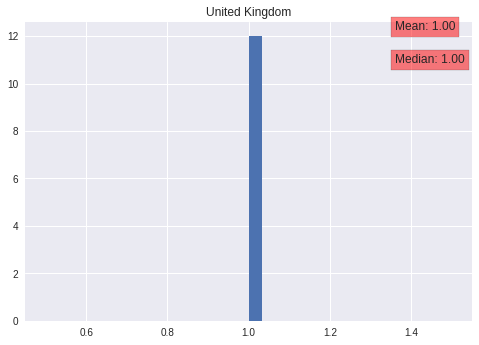

Cluster 4


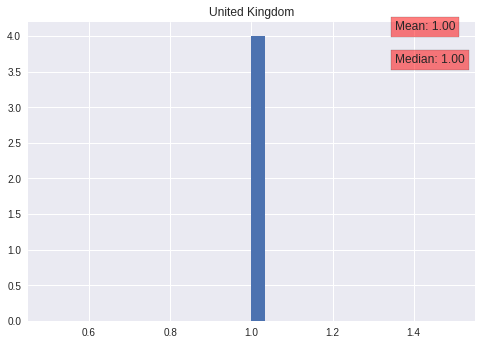

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


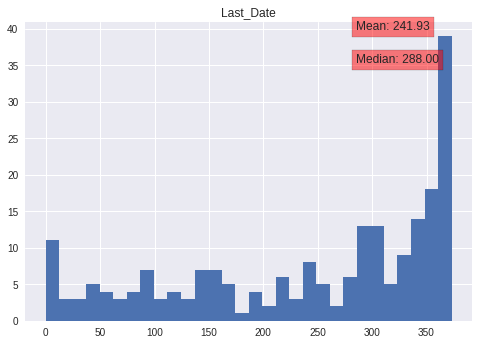

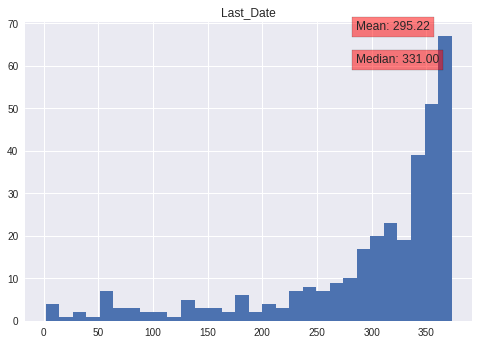

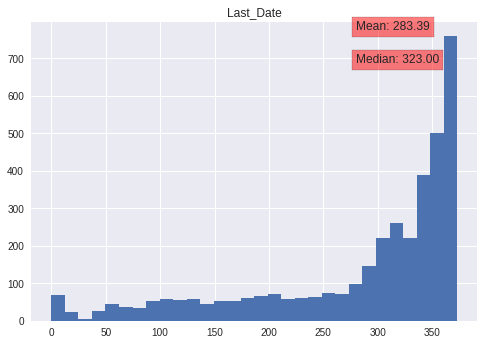

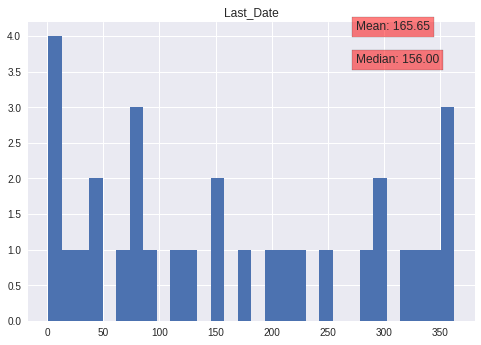

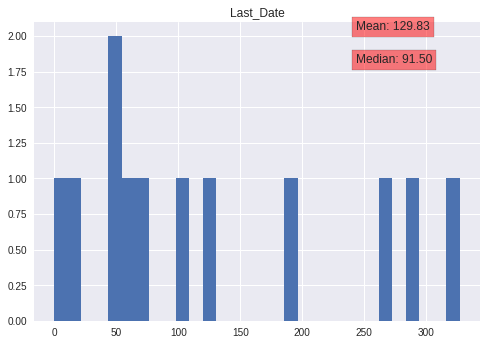

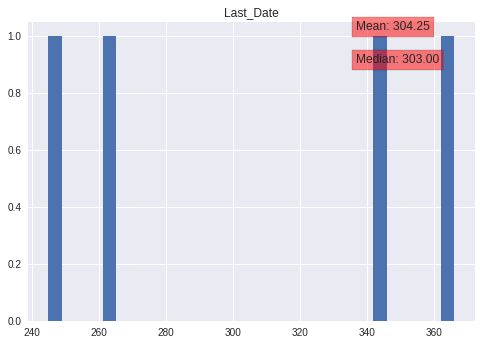

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


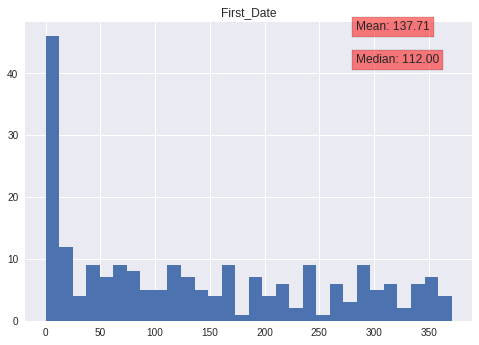

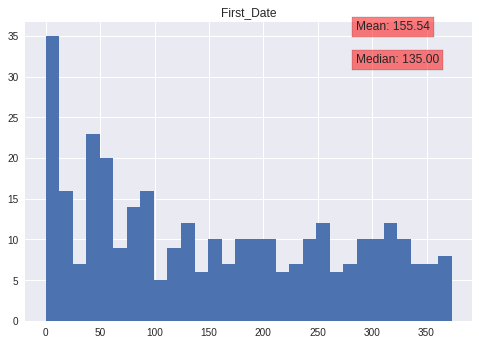

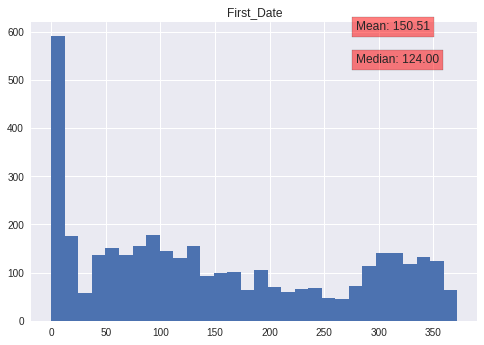

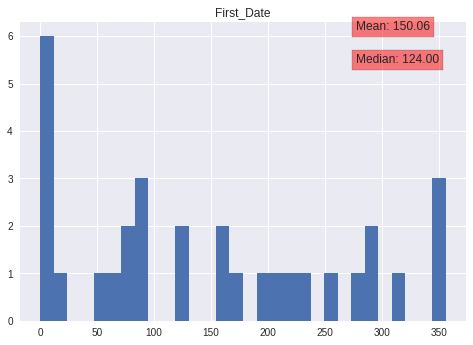

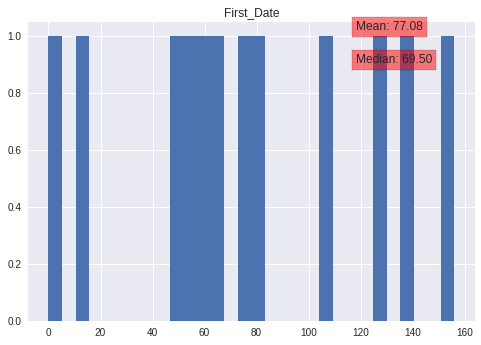

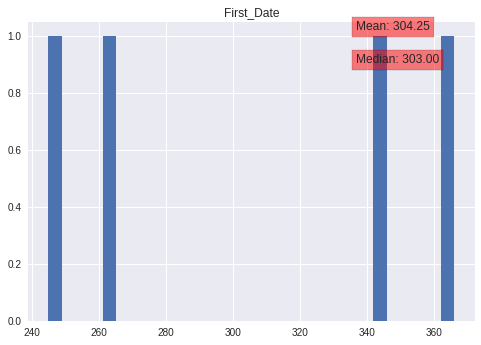

---------------------------------------------------------
count    4336.000000
mean        0.205404
std         0.153394
min         0.000000
25%         0.109062
50%         0.183013
75%         0.268442
max         1.000000
Name: Decoration Department, dtype: float64
Cluster -1


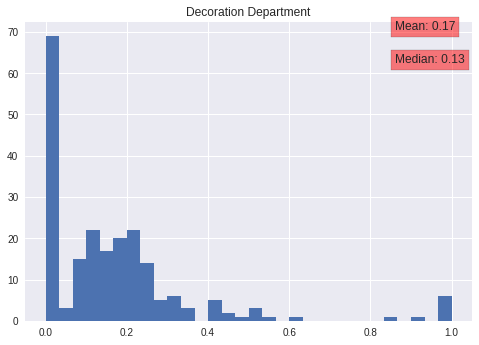

Cluster 0


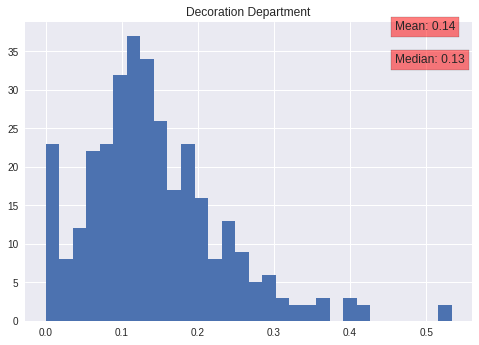

Cluster 1


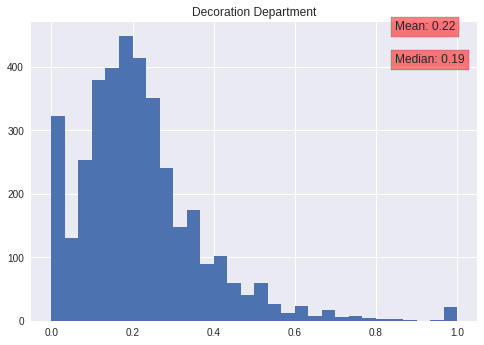

Cluster 2


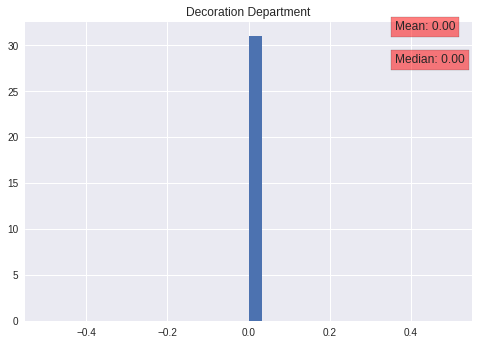

Cluster 3


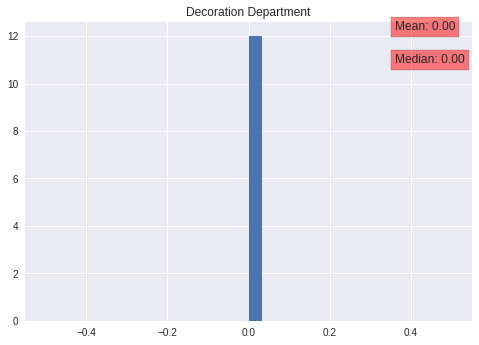

Cluster 4


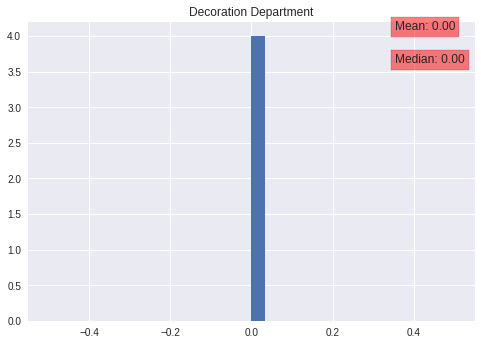

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


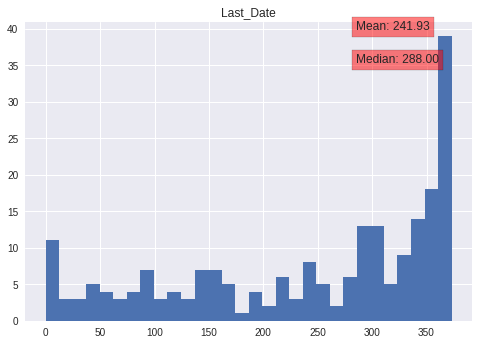

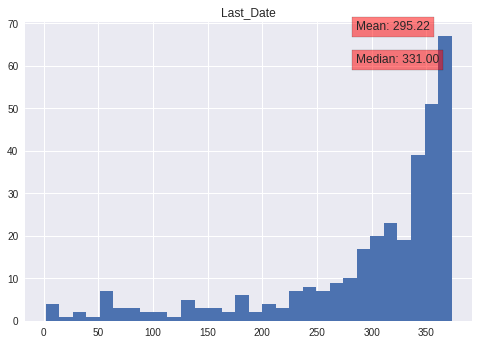

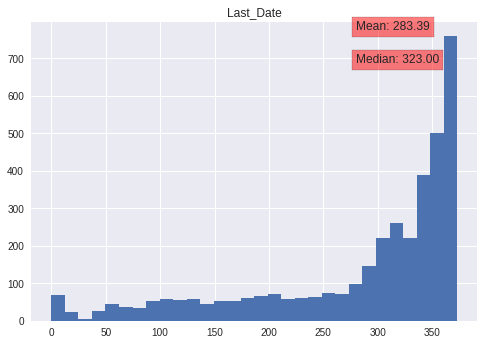

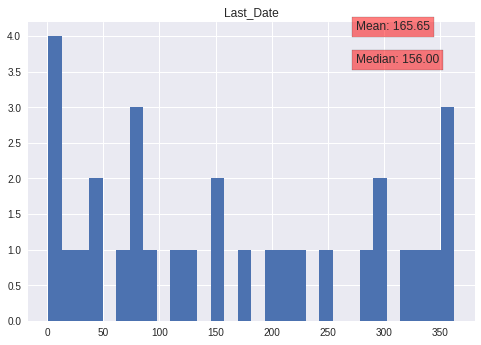

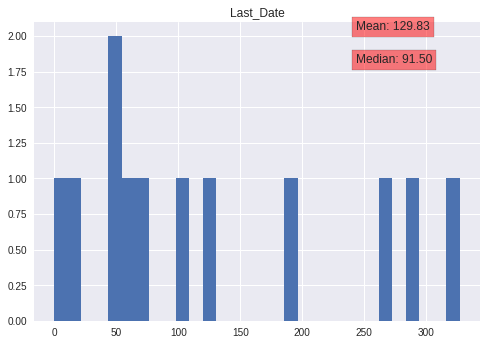

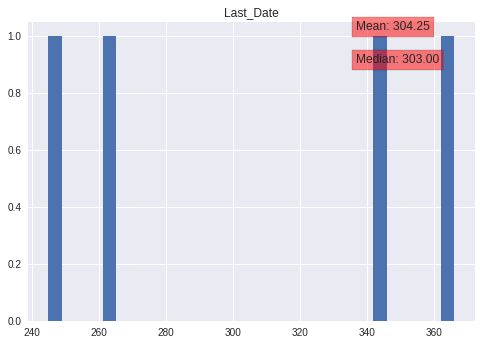

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


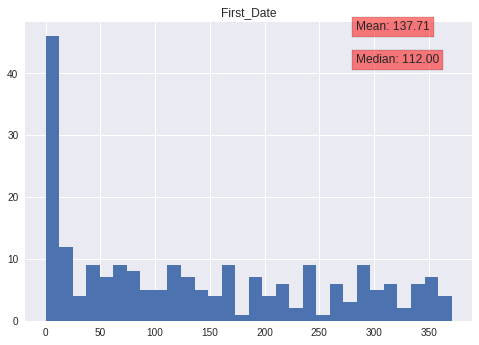

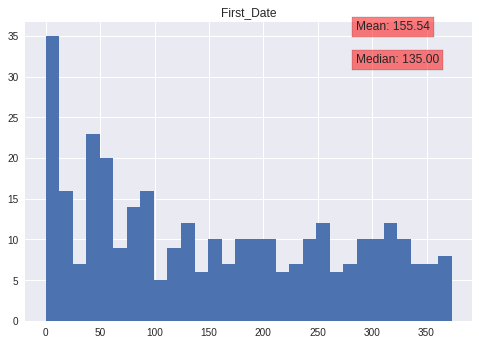

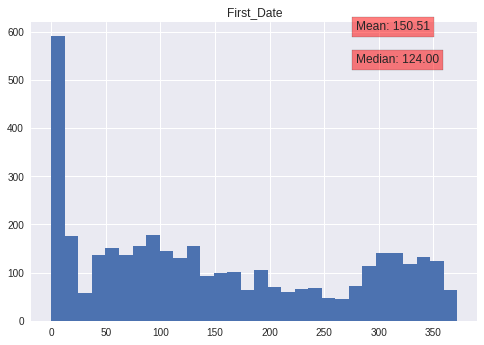

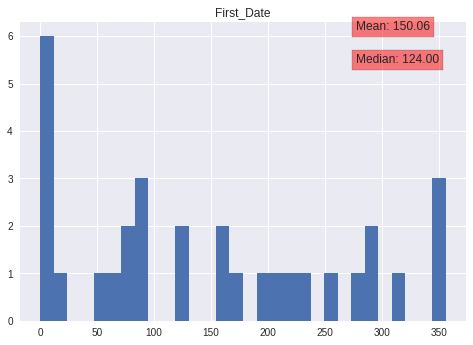

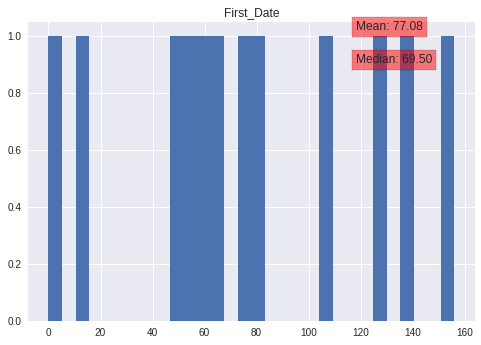

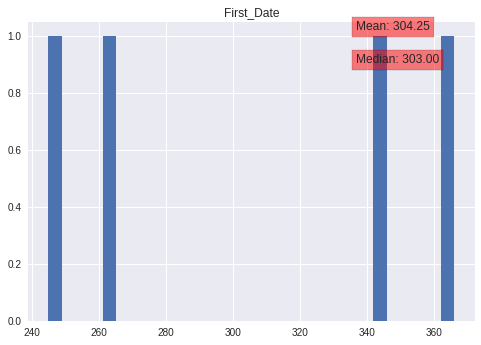

---------------------------------------------------------
count    4336.000000
mean        0.173742
std         0.131597
min         0.000000
25%         0.090909
50%         0.159033
75%         0.231707
max         1.000000
Name: Toys & Kids Deprtment, dtype: float64
Cluster -1


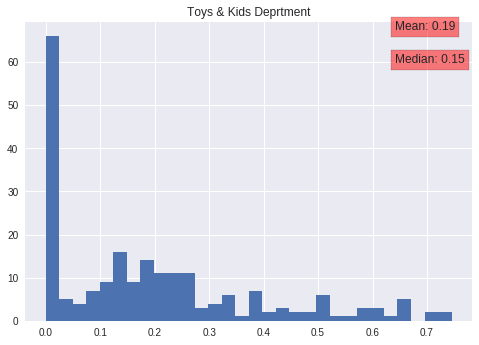

Cluster 0


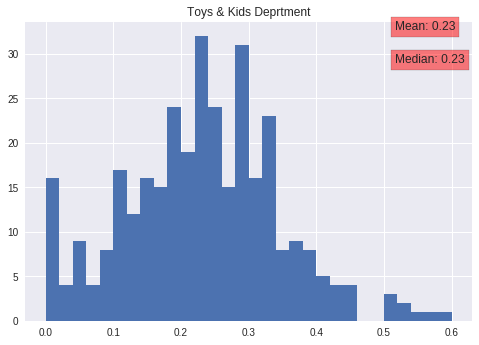

Cluster 1


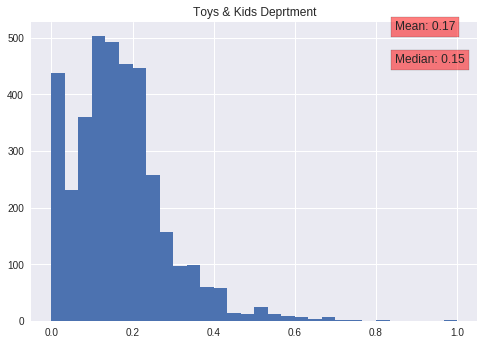

Cluster 2


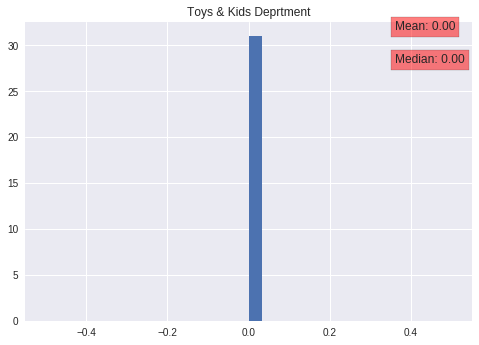

Cluster 3


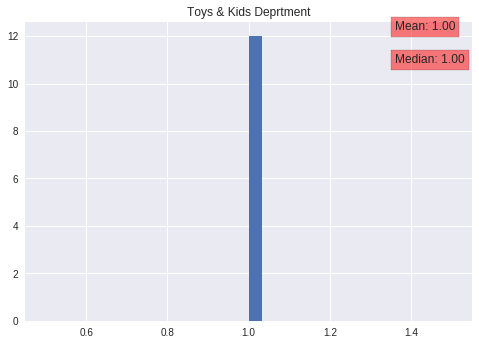

Cluster 4


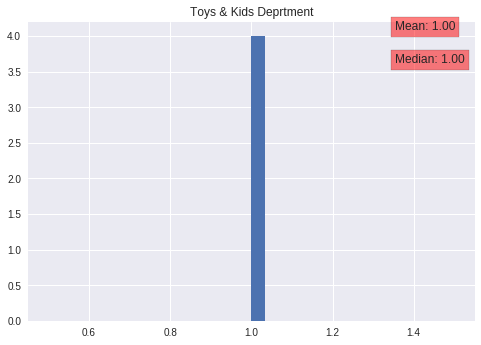

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


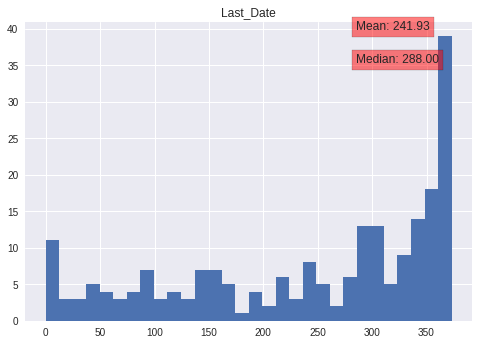

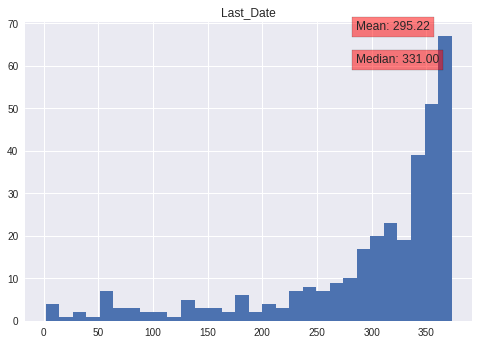

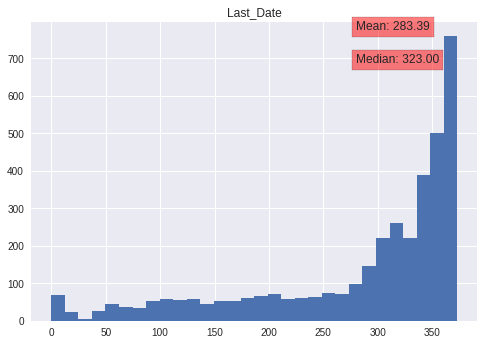

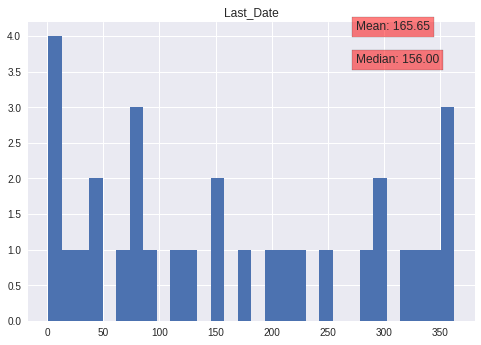

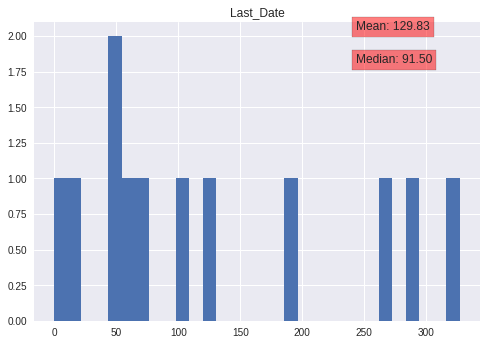

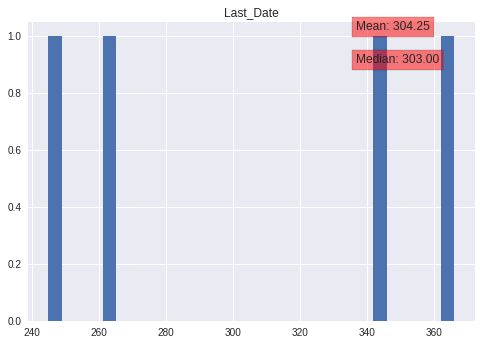

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


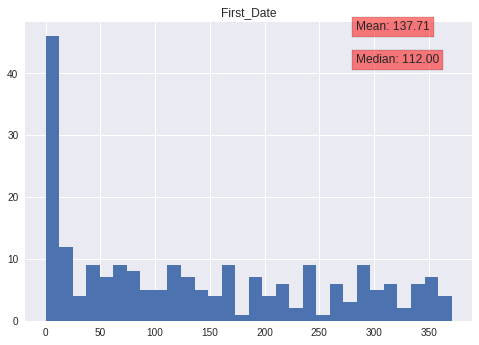

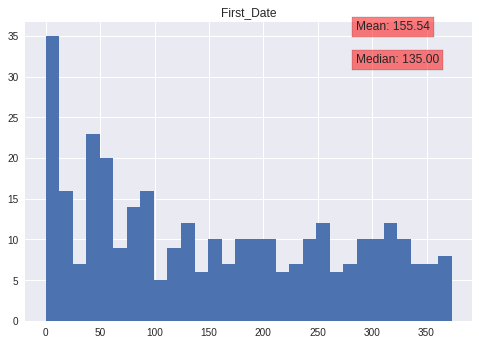

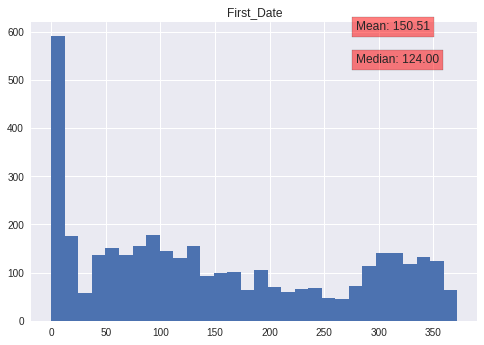

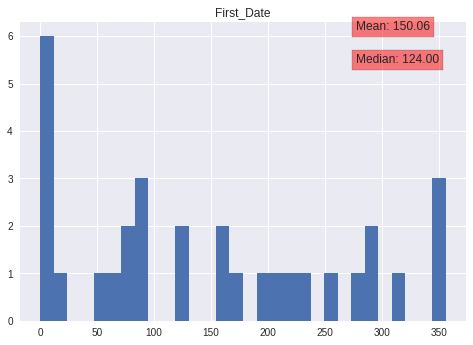

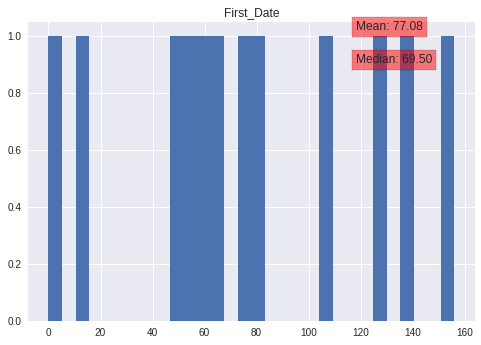

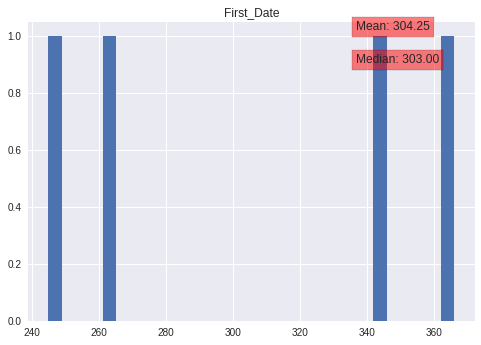

---------------------------------------------------------
count    4336.000000
mean        0.188823
std         0.141574
min         0.000000
25%         0.108352
50%         0.171429
75%         0.240000
max         1.000000
Name: Kitchen Department, dtype: float64
Cluster -1


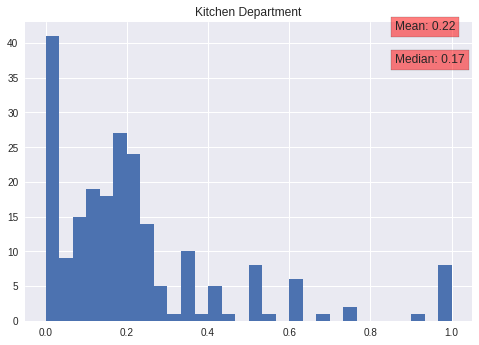

Cluster 0


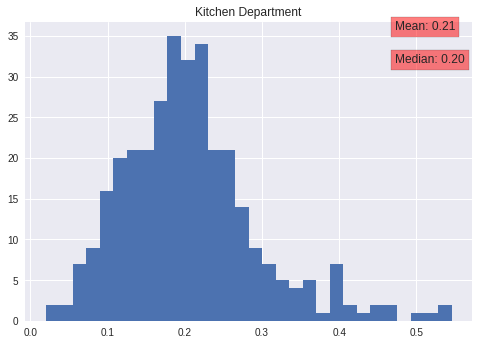

Cluster 1


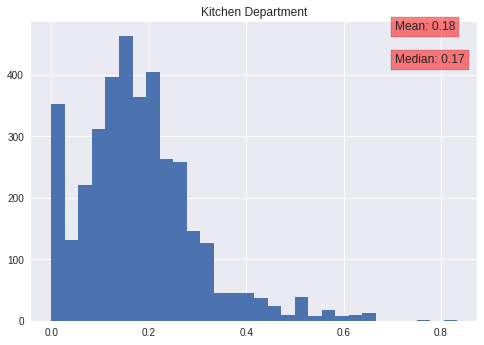

Cluster 2


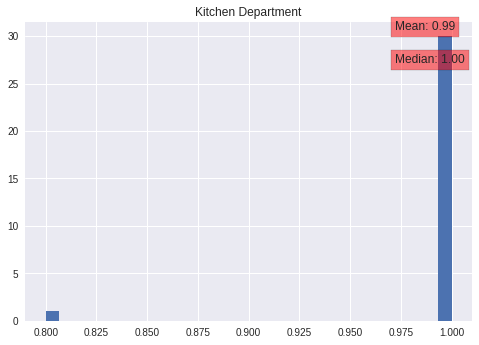

Cluster 3


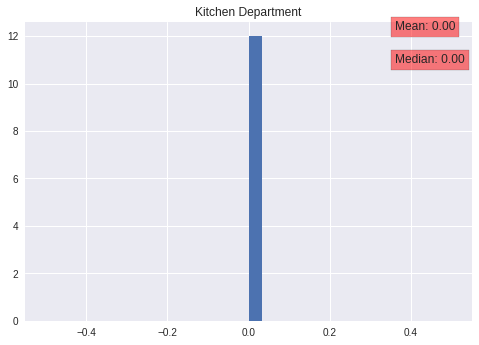

Cluster 4


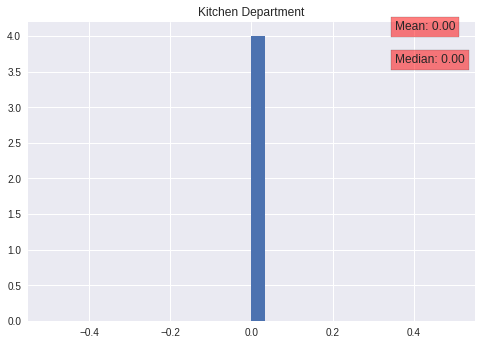

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


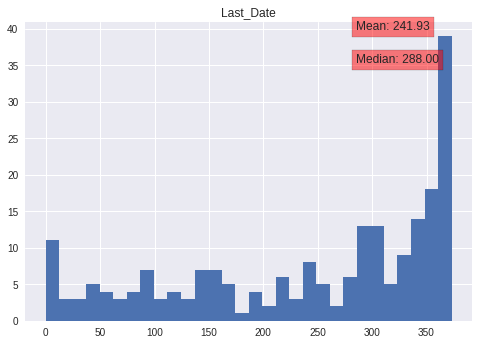

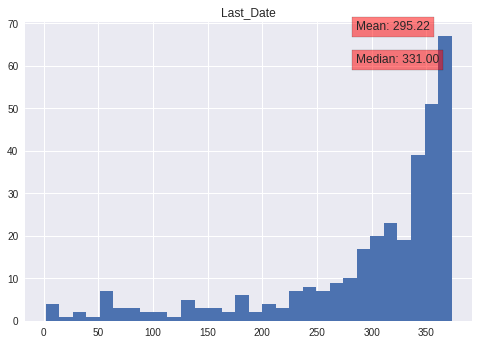

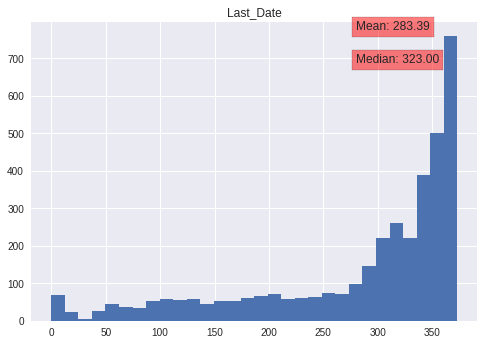

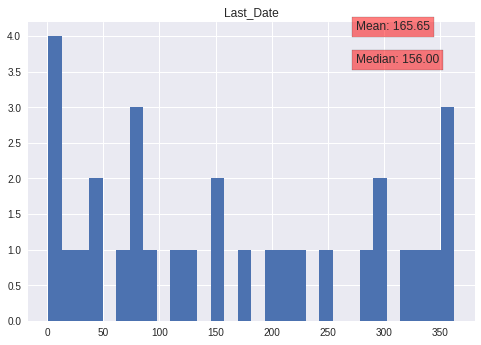

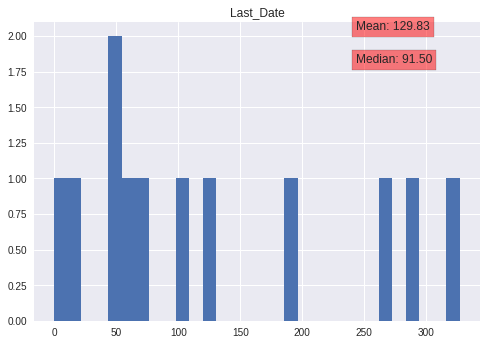

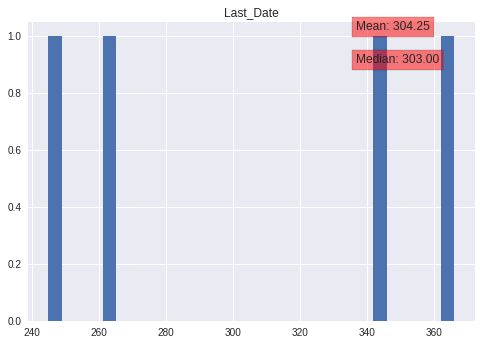

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


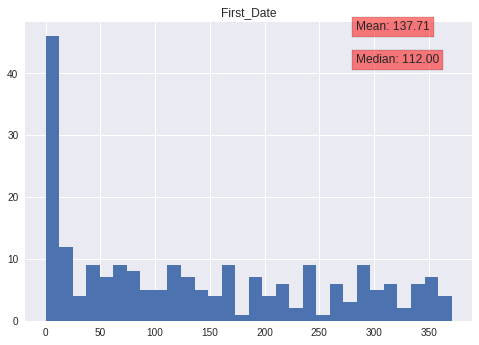

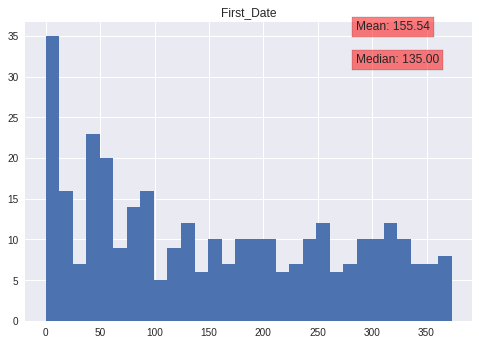

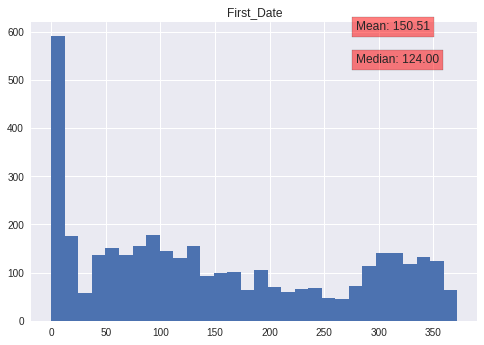

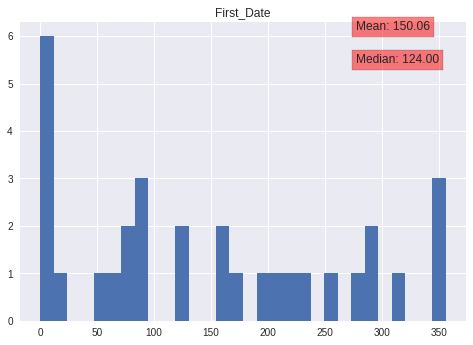

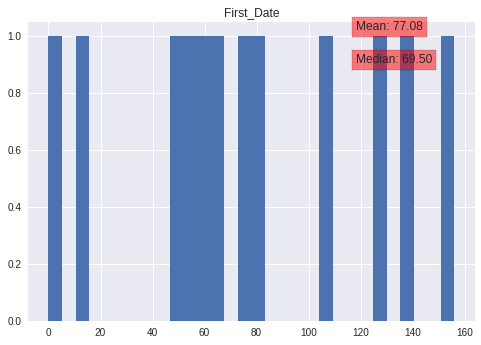

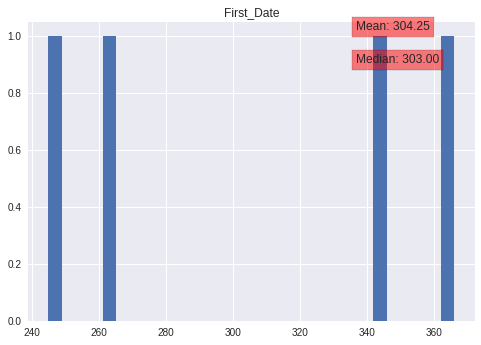

---------------------------------------------------------
count    4336.000000
mean        0.207249
std         0.147077
min         0.000000
25%         0.121212
50%         0.190476
75%         0.266901
max         1.000000
Name: Handcraft & Clothes Department, dtype: float64
Cluster -1


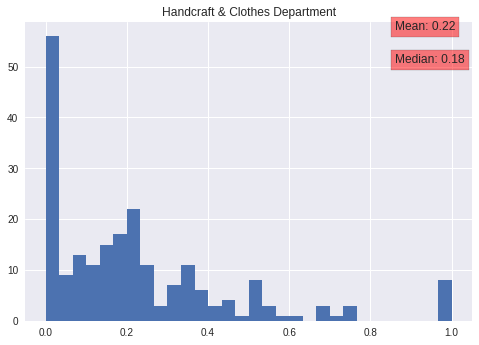

Cluster 0


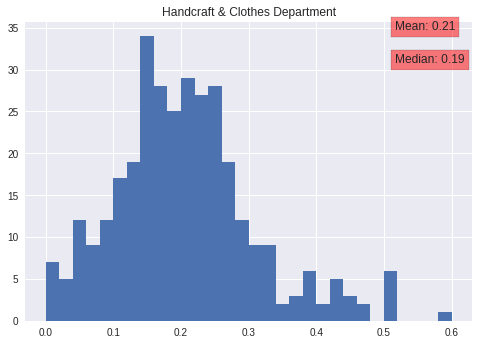

Cluster 1


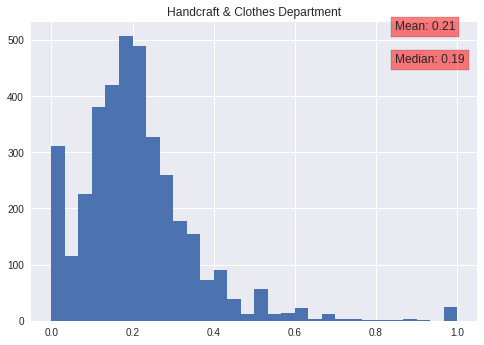

Cluster 2


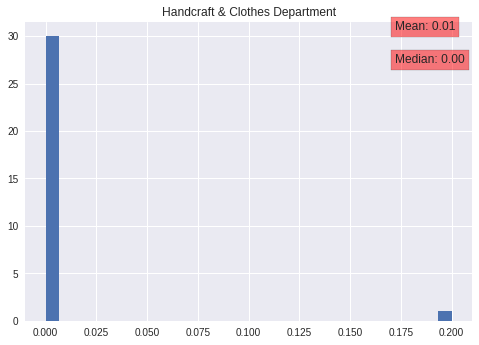

Cluster 3


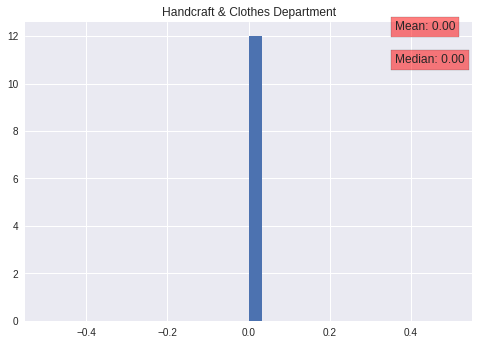

Cluster 4


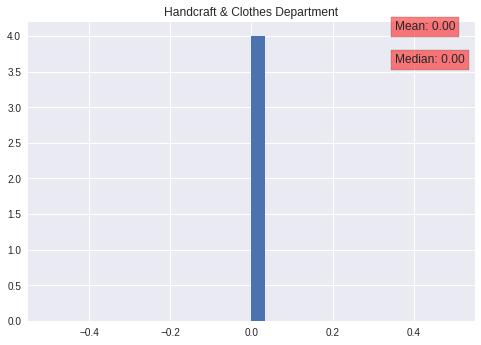

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


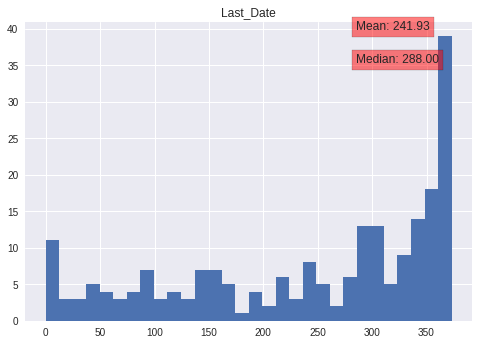

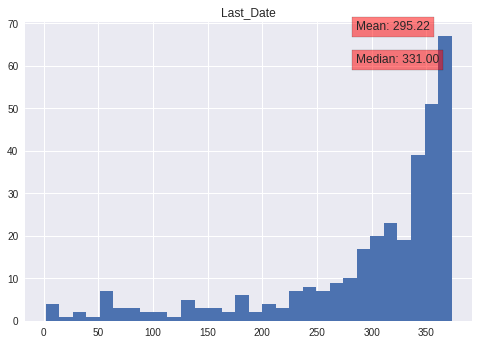

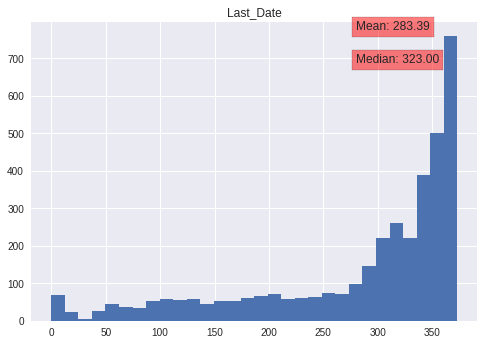

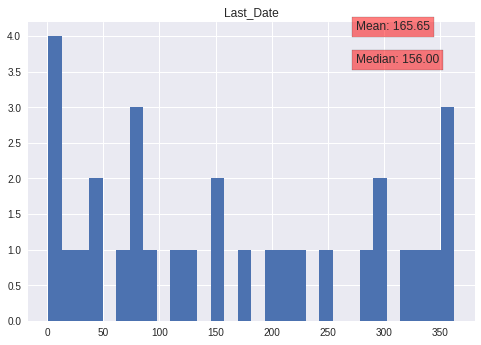

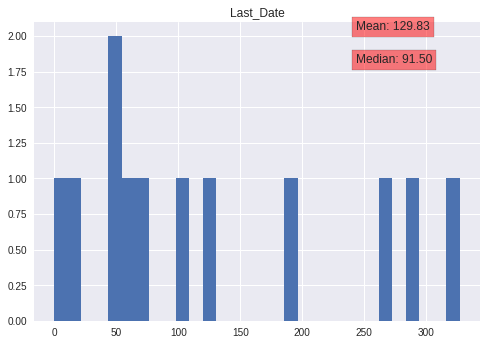

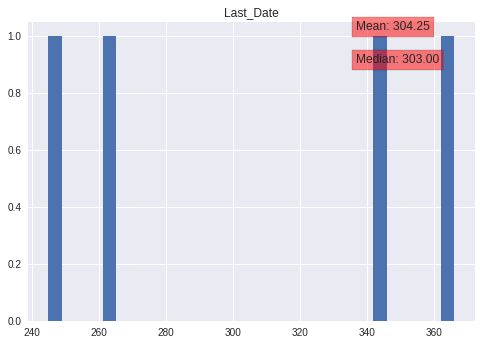

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


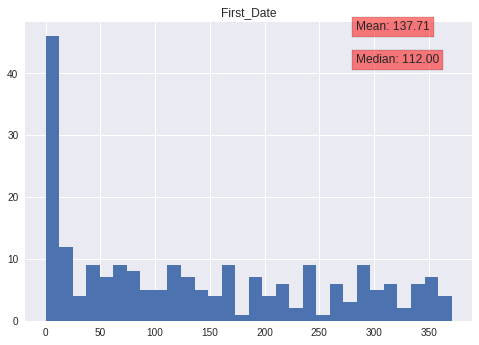

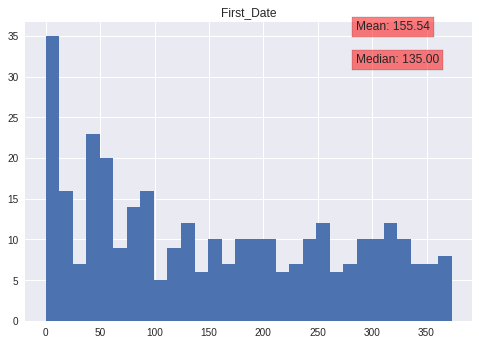

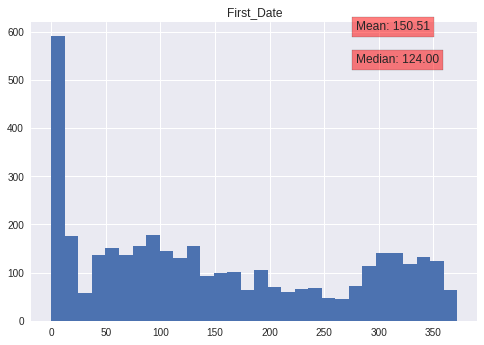

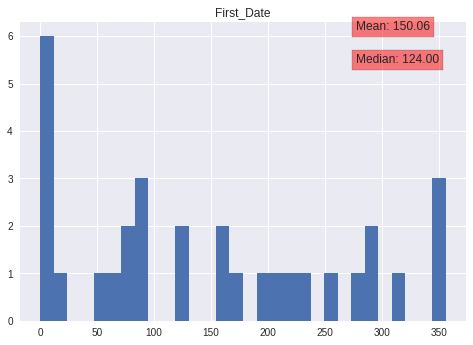

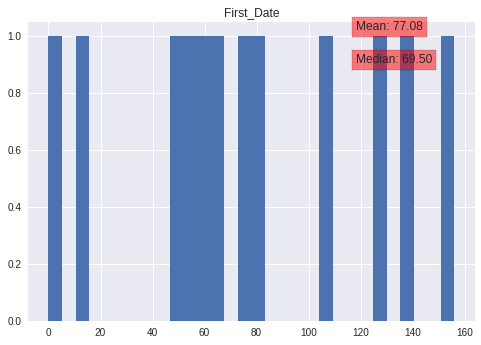

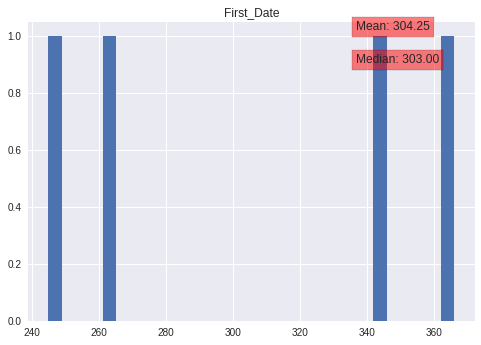

---------------------------------------------------------
count    4336.000000
mean        0.224782
std         0.156175
min         0.000000
25%         0.127273
50%         0.208333
75%         0.295024
max         1.000000
Name: Design & Viantage_Decoration Department, dtype: float64
Cluster -1


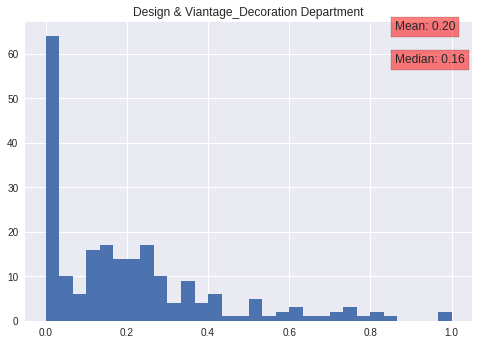

Cluster 0


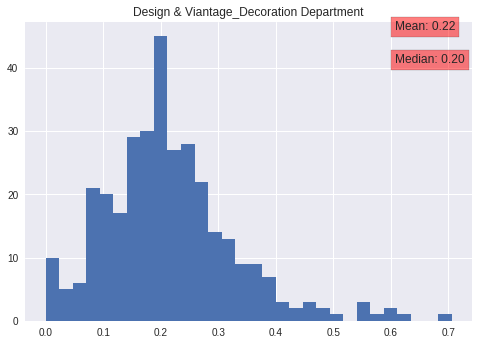

Cluster 1


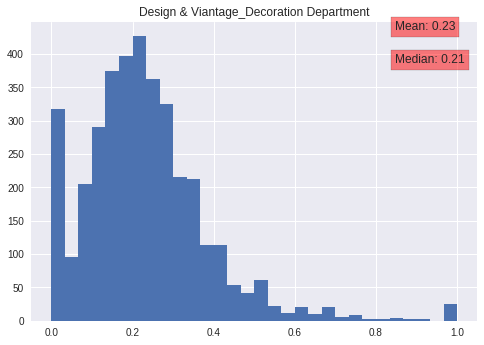

Cluster 2


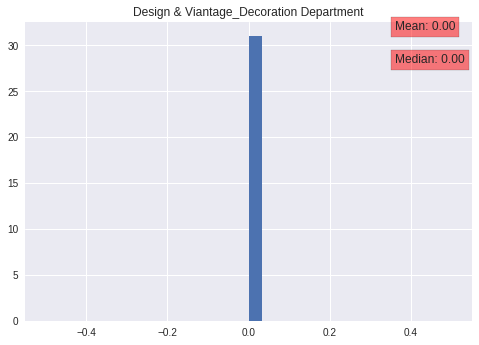

Cluster 3


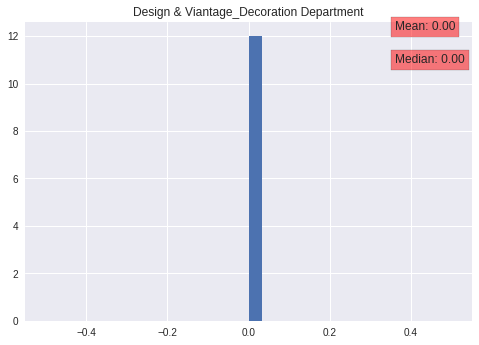

Cluster 4


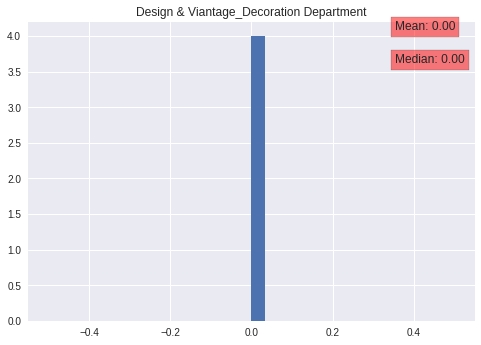

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


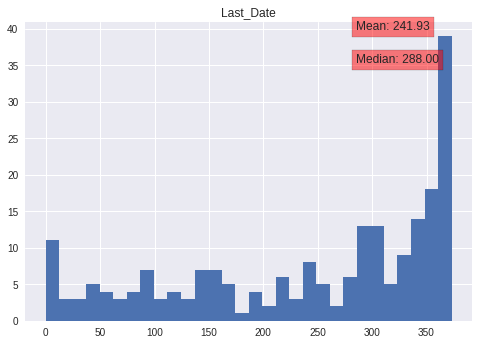

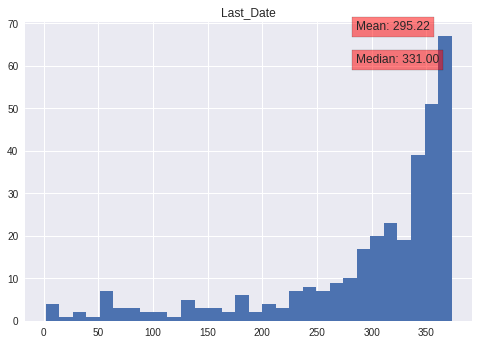

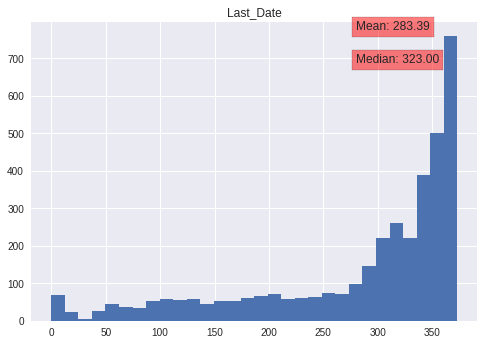

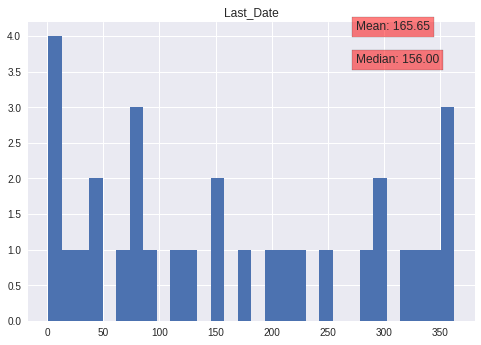

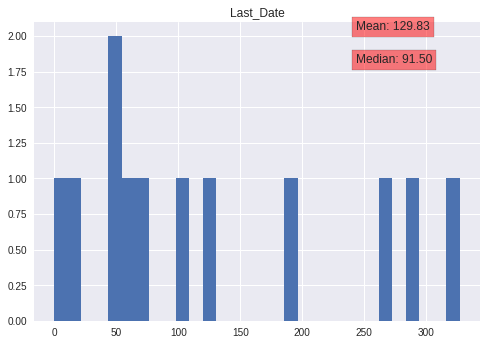

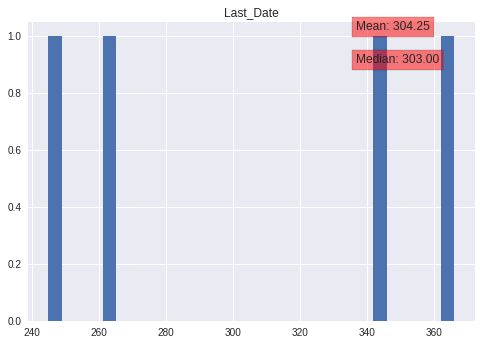

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


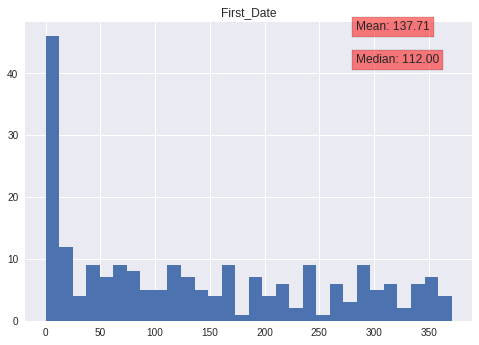

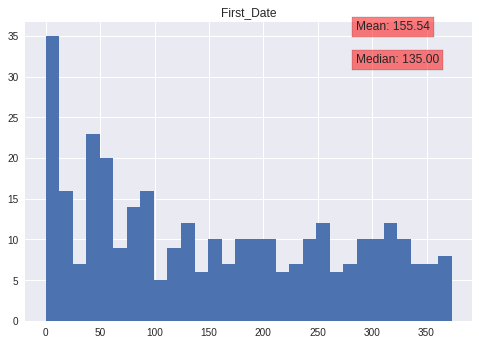

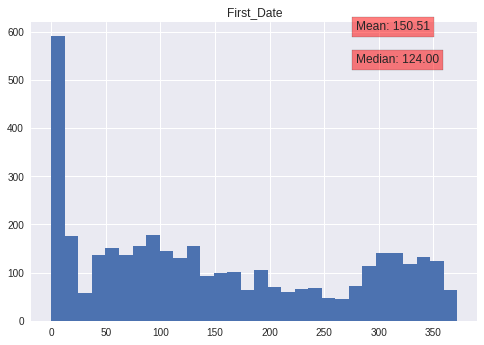

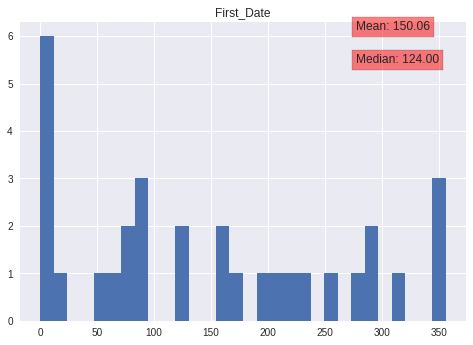

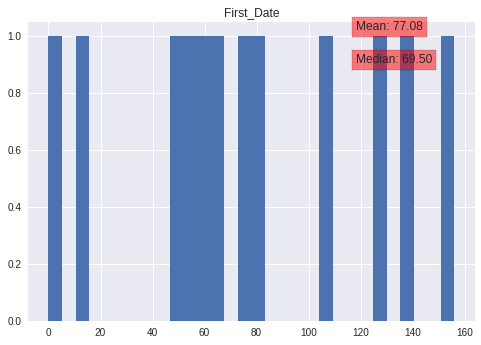

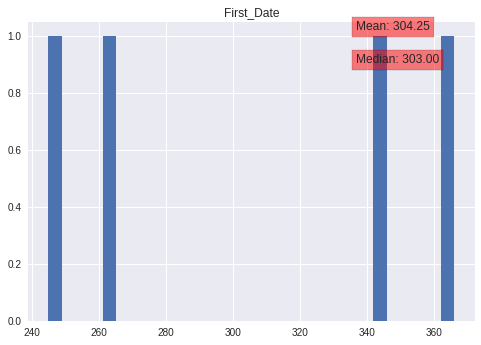

---------------------------------------------------------


In [40]:
hist_dbscan_clusters(2.3, 5)

In [41]:
df_dbscan_clusters(2.3, 5)

A/Number_Of_Customers B/Count_Invoices C/Average_Products_Invoice  \
-1                    217         131.21 %                    24.39 %   
 0                    331          -5.97 %                     5.94 %   
 1                   3741          -6.25 %                    -0.77 %   
 2                     31         -68.30 %                   -93.43 %   
 3                     12         -59.05 %                   -90.56 %   
 4                      4         -76.60 %                   -94.28 %   

   D/Average_Quantity_Invoice E/Average_TotaPrice_Invoice F/United Kingdom  \
-1                   253.39 %                    239.36 %         -33.70 %   
 0                    16.59 %                     30.82 %        -100.00 %   
 1                   -15.39 %                    -15.99 %          10.67 %   
 2                   -61.95 %                    -52.37 %          10.67 %   
 3                   -56.19 %                    -42.39 %          10.67 %   
 4                   -77.34 %                    -49.37 %          10.67 %   

   G/Decoration Department H/Toys & Kids Deprtment I/Kitchen Department  \
-1                -18.39 %                 10.61 %              15.50 %   
 0                -30.86 %                 32.85 %               9.46 %   
 1                  5.05 %                 -4.73 %              -4.84 %   
 2               -100.00 %               -100.00 %             426.18 %   
 3               -100.00 %                475.57 %            -100.00 %   
 4               -100.00 %                475.57 %            -100.00 %   

   J/Handcraft & Clothes Department K/Design & Viantage_Decoration Department  \
-1                           6.57 %                                  -10.47 %   
 0                          -0.99 %                                   -4.22 %   
 1                           0.94 %                                    2.24 %   
 2                         -96.89 %                                 -100.00 %   
 3                        -100.00 %                                 -100.00 %   
 4                        -100.00 %                                 -100.00 %   

   L/Last_Date M/First_Date N/Time_Minutes_Mean  
-1    -13.90 %      -8.31 %               12:37  
 0      5.07 %       3.56 %               10:27  
 1      0.86 %       0.21 %               13:33  
 2    -41.05 %      -0.08 %               13:17  
 3    -53.79 %     -48.68 %               12:50  
 4      8.28 %     102.58 %               12:40

count    4336.000000
mean        4.273293
std         7.699536
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: Count_Invoices, dtype: float64
Cluster -1


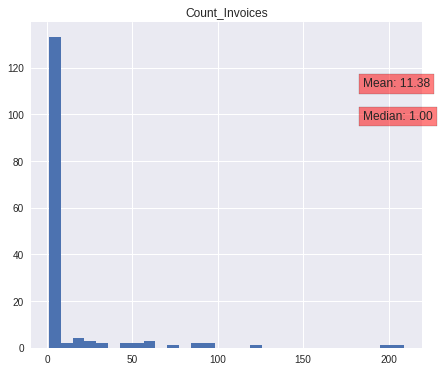

Cluster 0


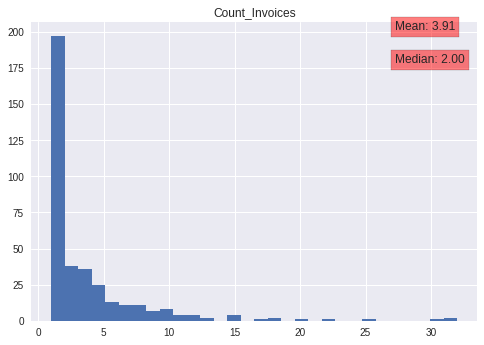

Cluster 1


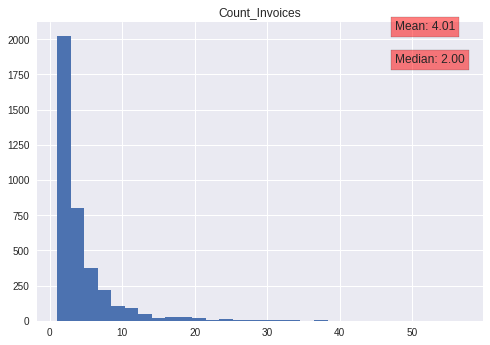

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


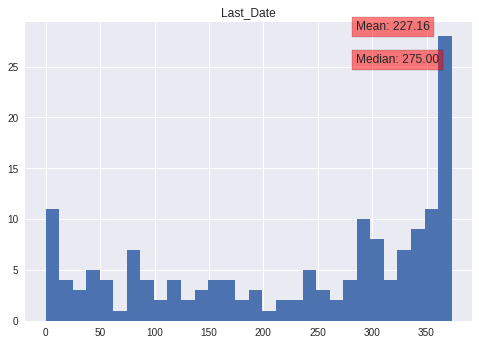

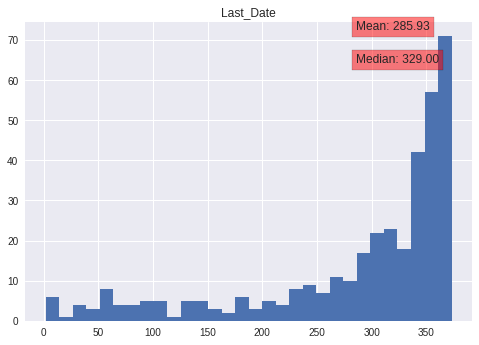

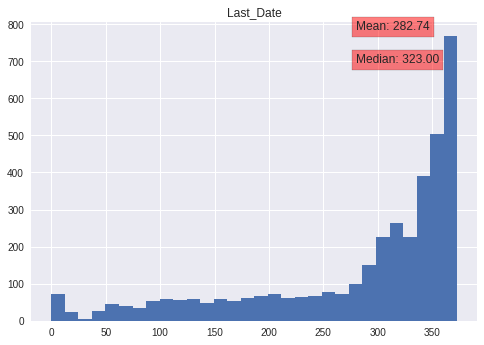

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


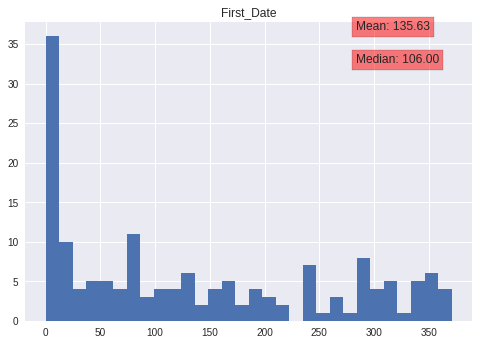

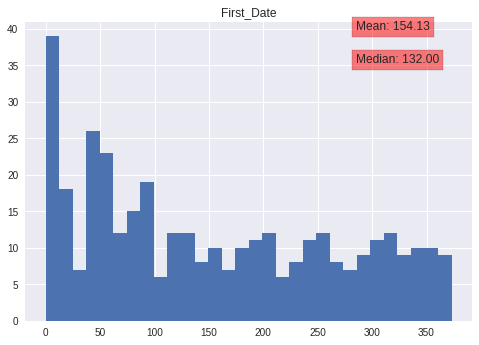

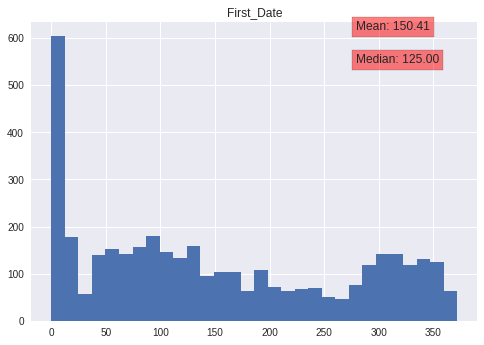

---------------------------------------------------------
count    4336.000000
mean       21.844331
std        19.636356
min         1.000000
25%         9.500000
50%        17.000000
75%        28.000000
max       300.647059
Name: Average_Products_Invoice, dtype: float64
Cluster -1


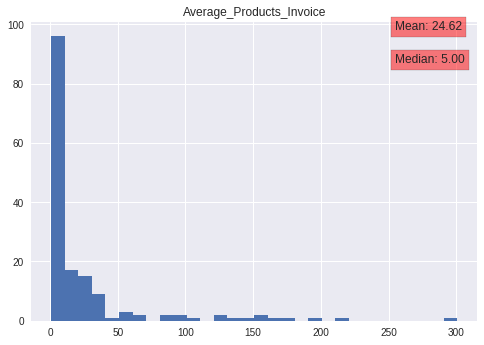

Cluster 0


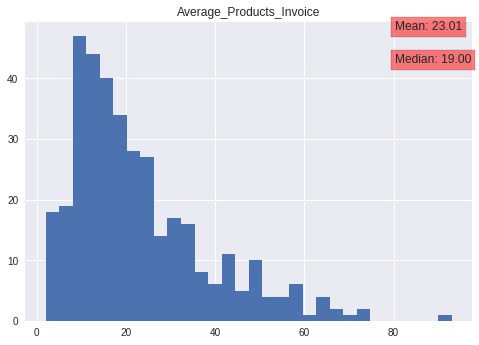

Cluster 1


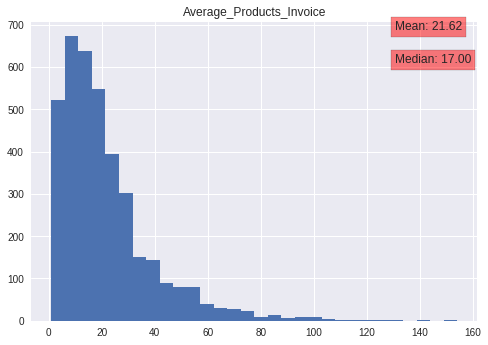

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


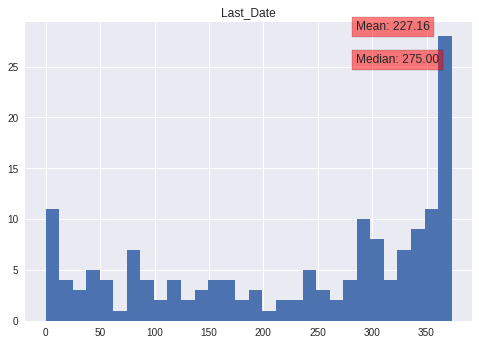

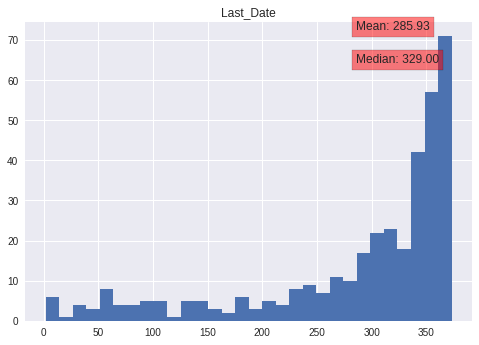

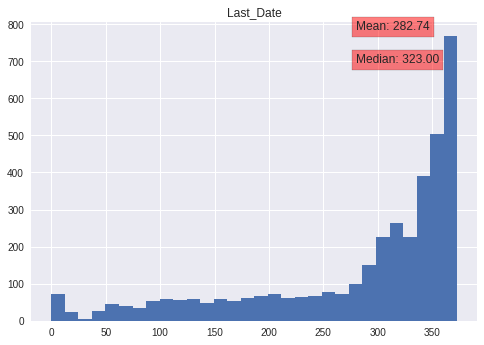

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


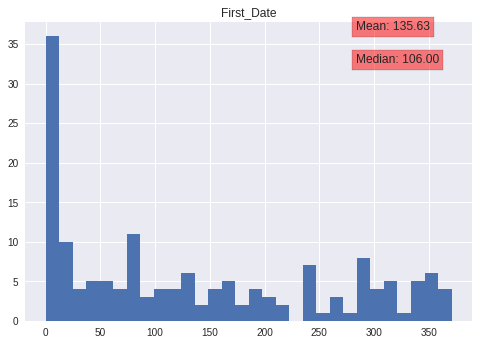

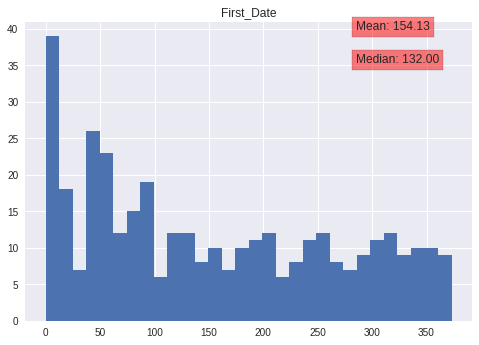

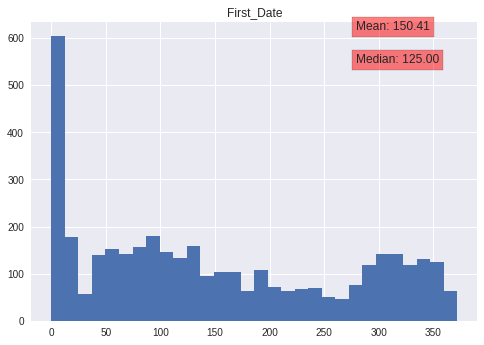

---------------------------------------------------------
count    4336.000000
mean      226.123277
std       296.468316
min         1.000000
25%        92.000000
50%       161.000000
75%       270.000000
max      7824.000000
Name: Average_Quantity_Invoice, dtype: float64
Cluster -1


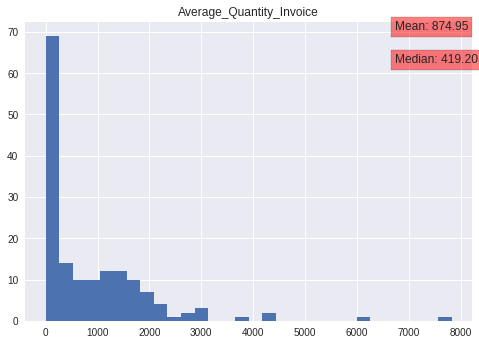

Cluster 0


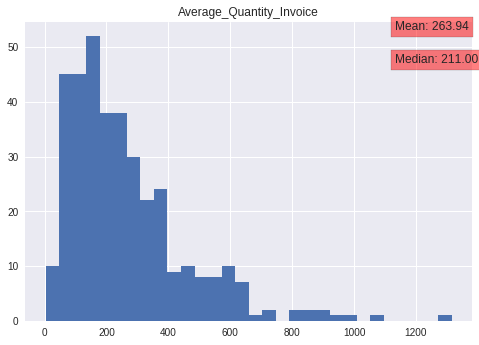

Cluster 1


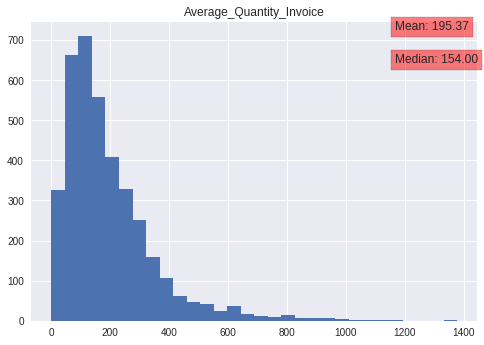

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


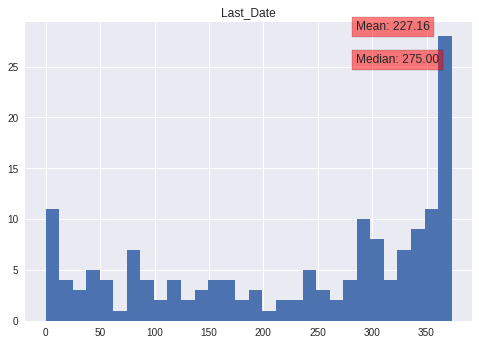

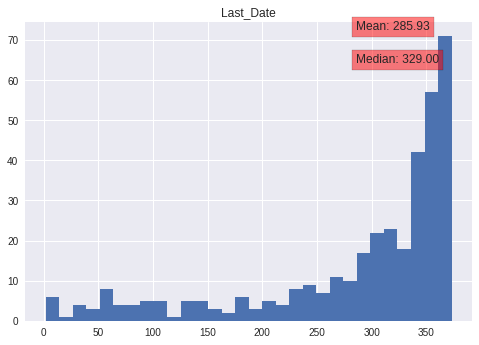

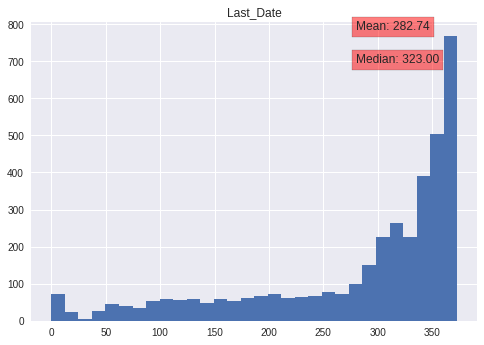

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


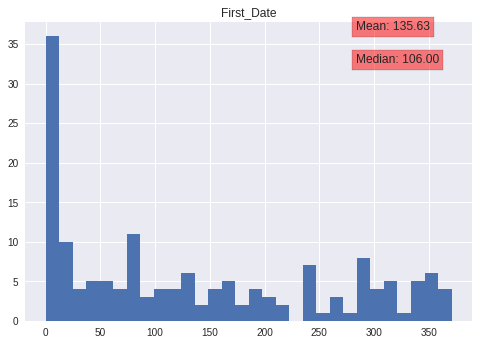

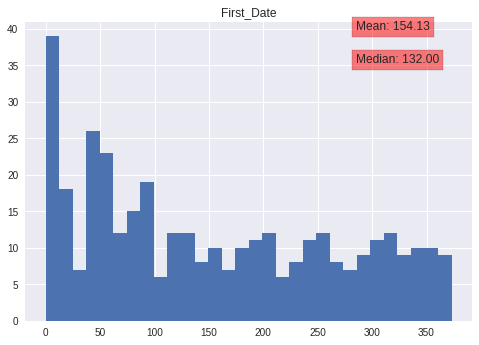

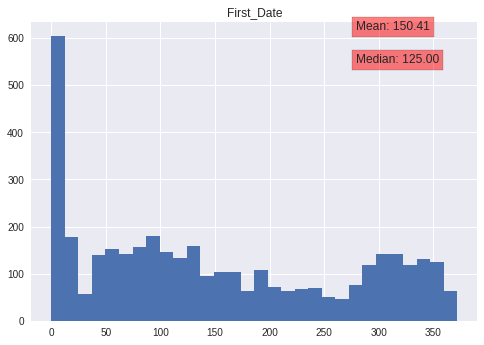

---------------------------------------------------------
count     4336.000000
mean       380.610551
std        497.501543
min          3.450000
25%        177.848393
50%        291.877500
75%        428.053125
max      14844.766667
Name: Average_TotaPrice_Invoice, dtype: float64
Cluster -1


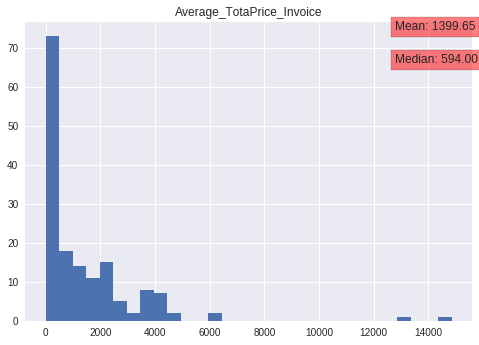

Cluster 0


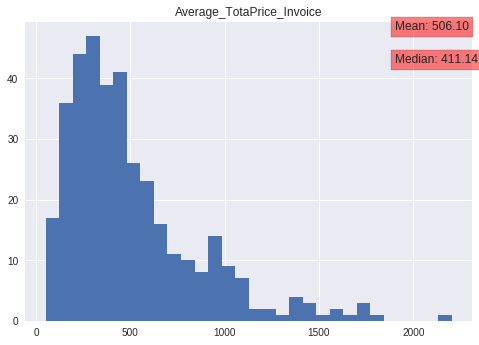

Cluster 1


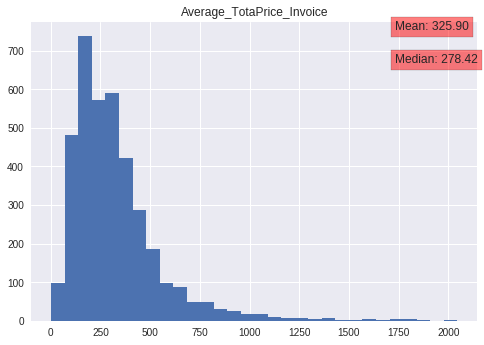

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


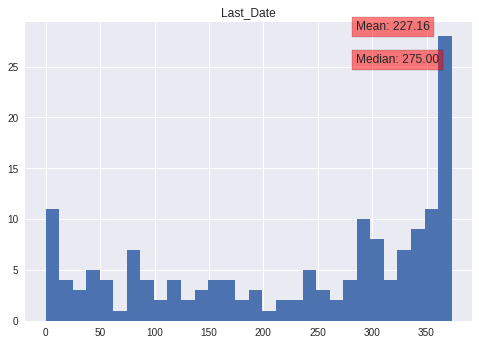

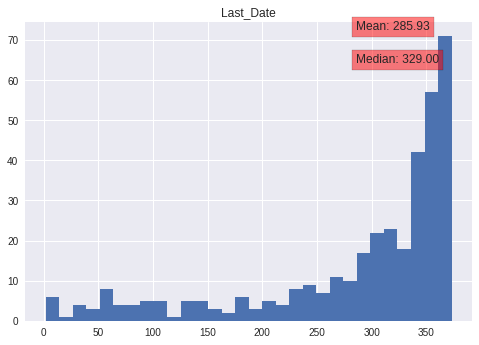

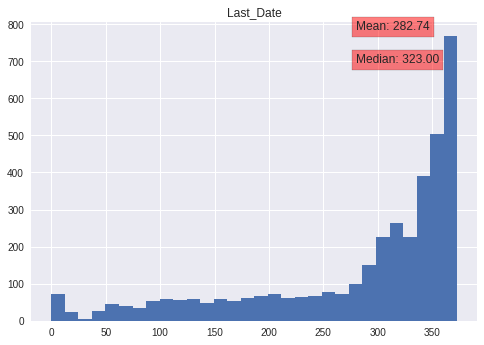

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


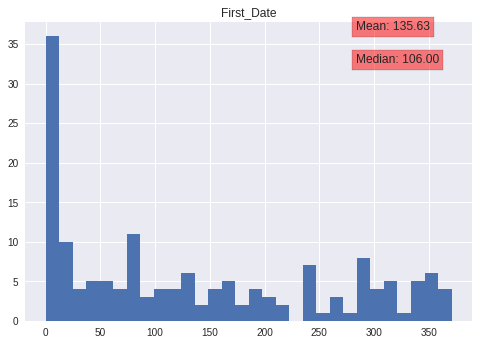

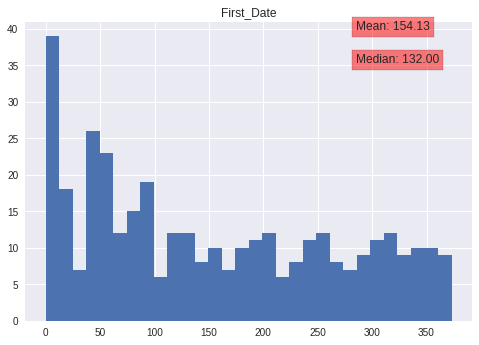

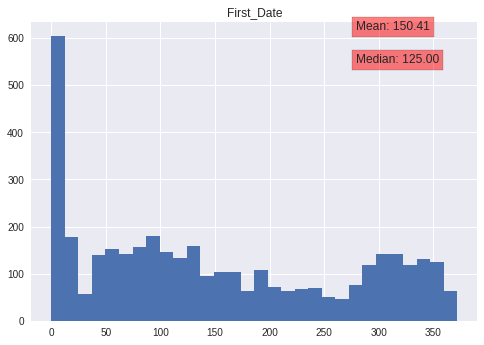

---------------------------------------------------------
count    4336.000000
mean        0.903598
std         0.295176
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: United Kingdom, dtype: float64
Cluster -1


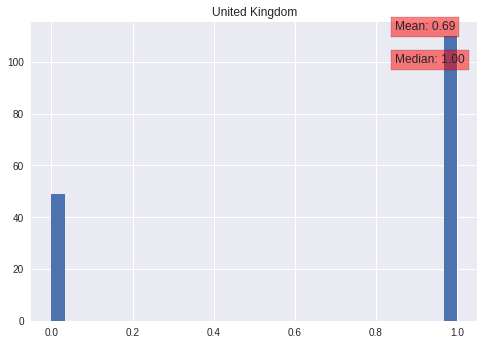

Cluster 0


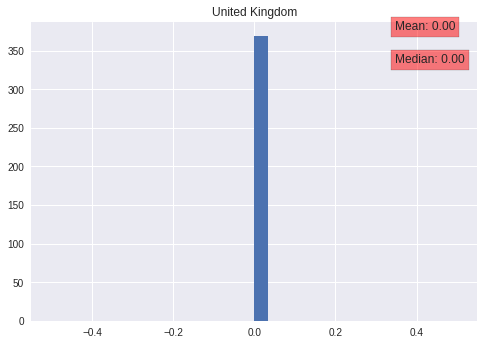

Cluster 1


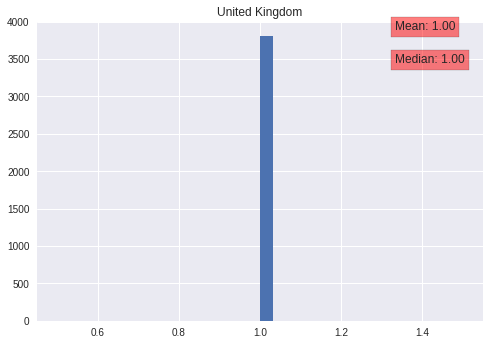

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


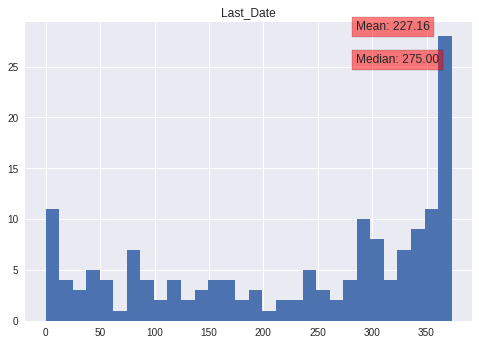

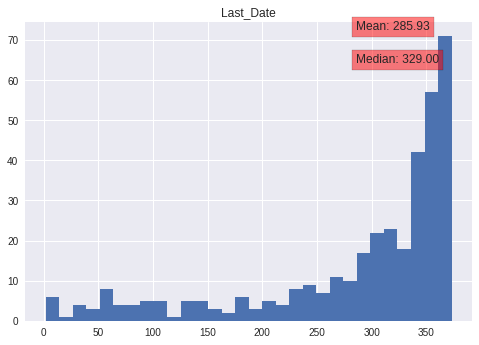

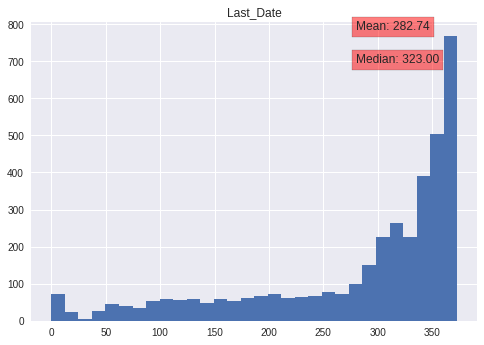

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


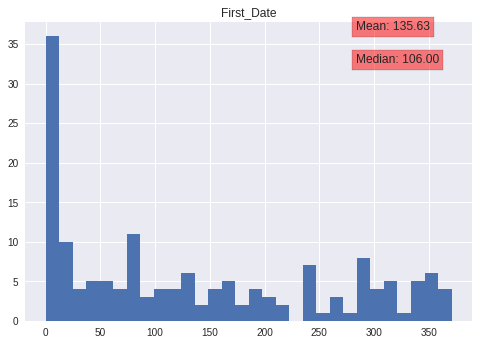

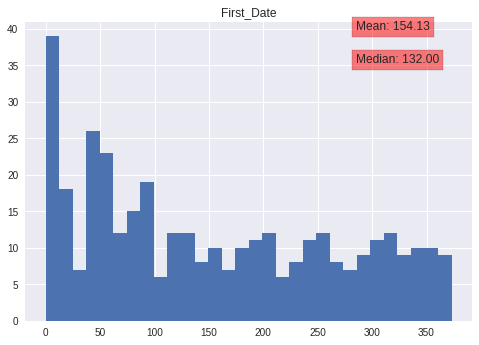

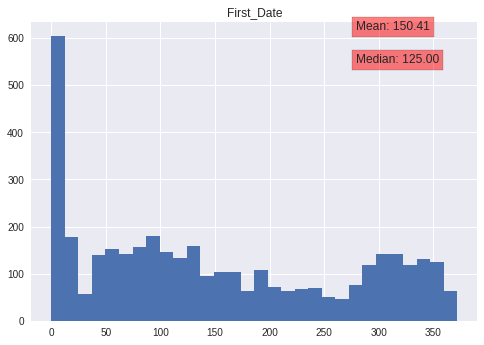

---------------------------------------------------------
count    4336.000000
mean        0.205404
std         0.153394
min         0.000000
25%         0.109062
50%         0.183013
75%         0.268442
max         1.000000
Name: Decoration Department, dtype: float64
Cluster -1


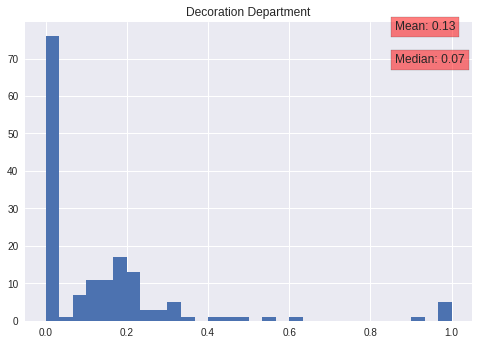

Cluster 0


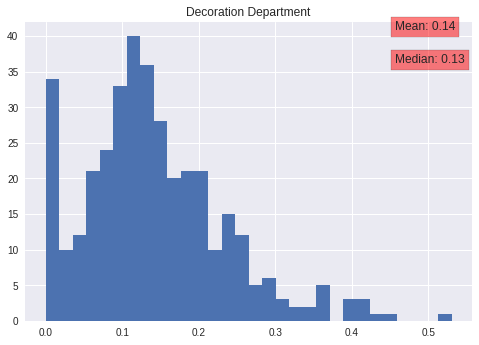

Cluster 1


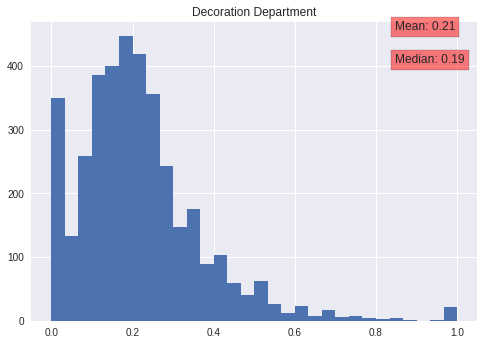

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


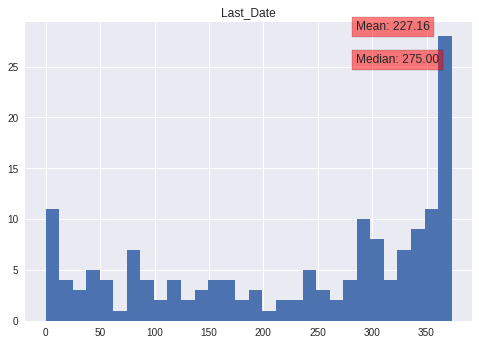

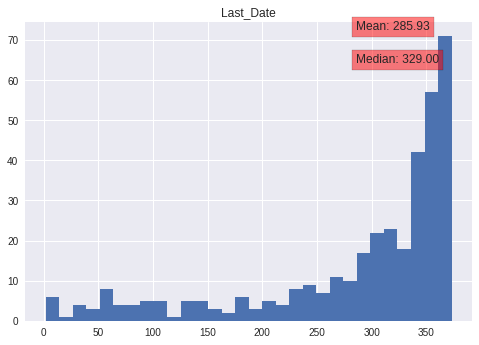

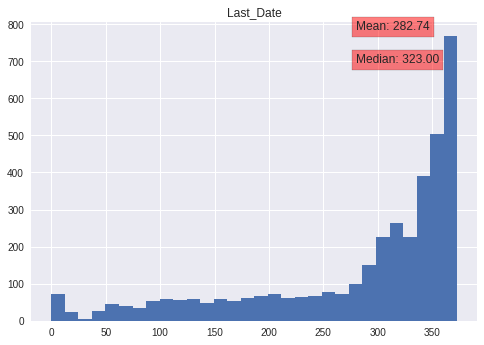

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


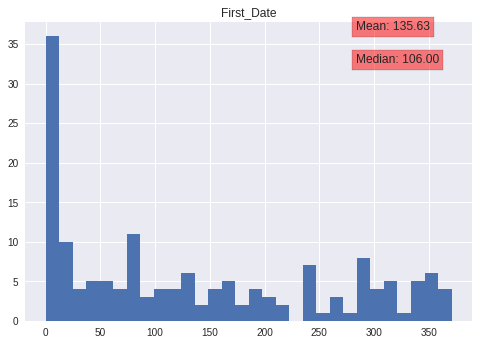

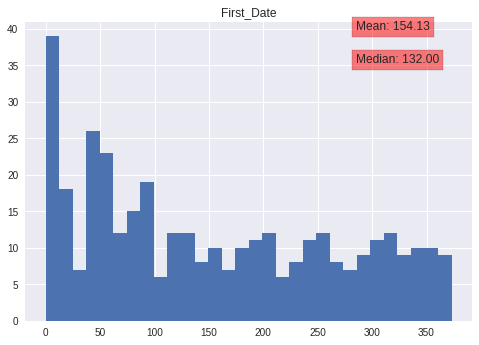

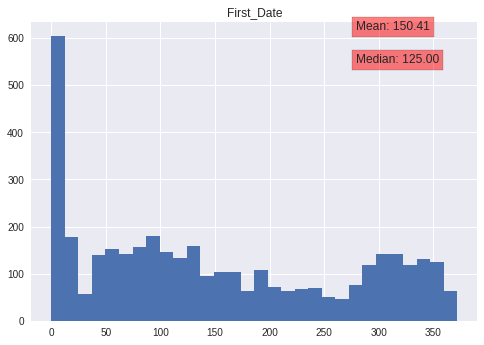

---------------------------------------------------------
count    4336.000000
mean        0.173742
std         0.131597
min         0.000000
25%         0.090909
50%         0.159033
75%         0.231707
max         1.000000
Name: Toys & Kids Deprtment, dtype: float64
Cluster -1


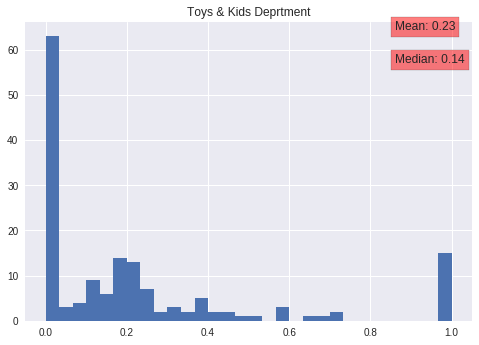

Cluster 0


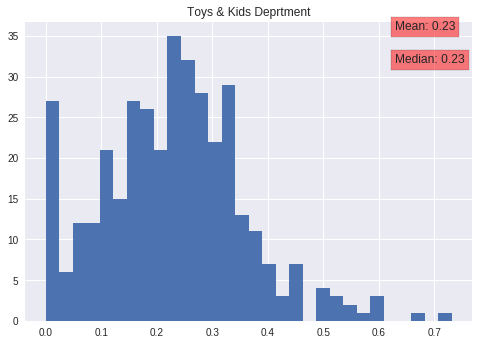

Cluster 1


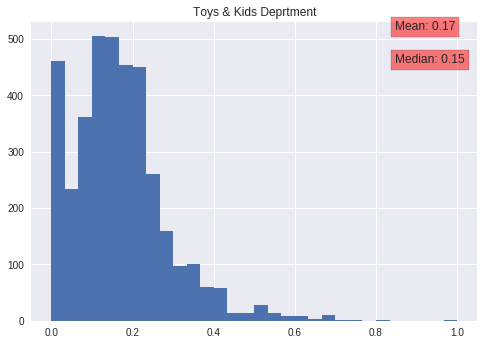

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


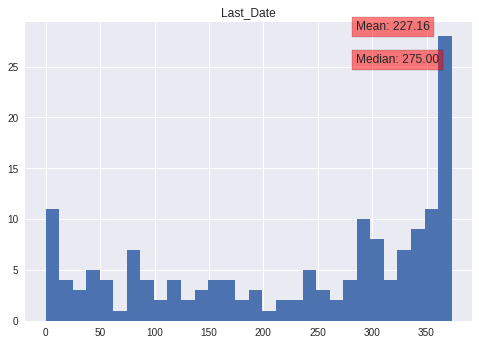

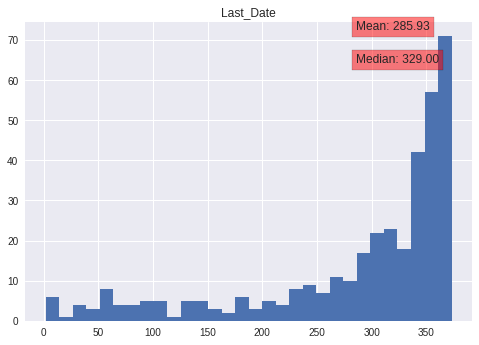

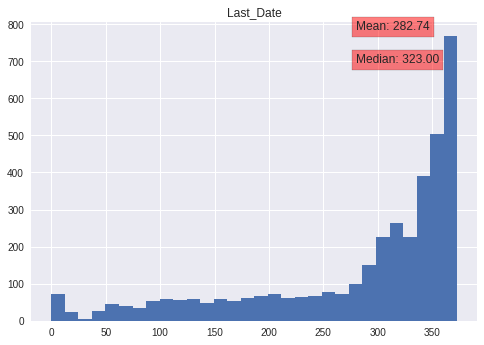

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


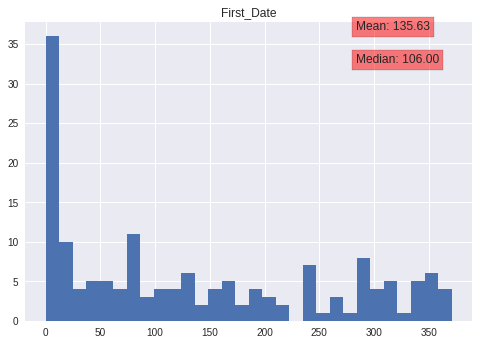

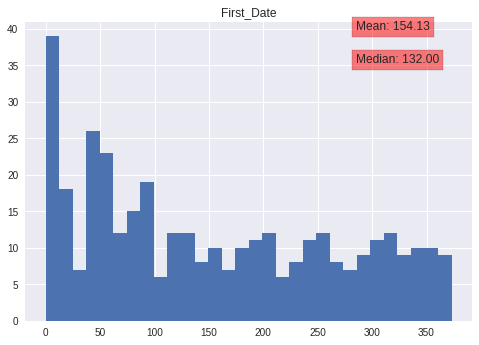

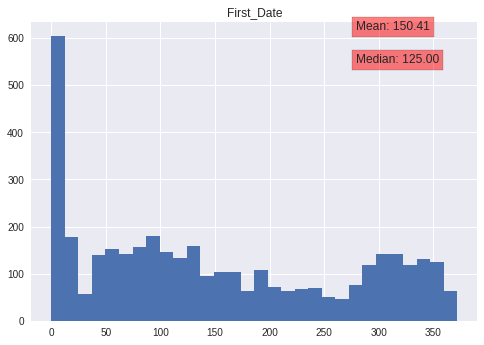

---------------------------------------------------------
count    4336.000000
mean        0.188823
std         0.141574
min         0.000000
25%         0.108352
50%         0.171429
75%         0.240000
max         1.000000
Name: Kitchen Department, dtype: float64
Cluster -1


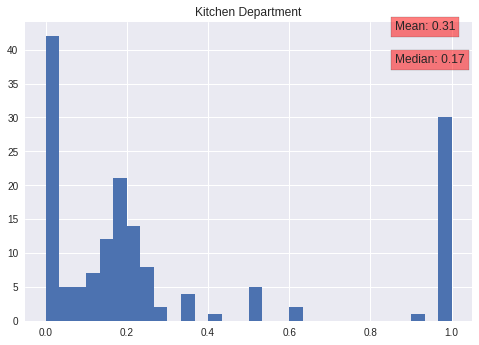

Cluster 0


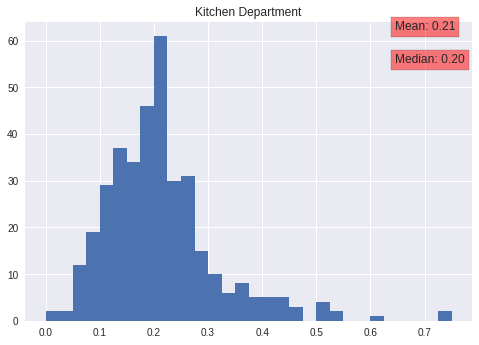

Cluster 1


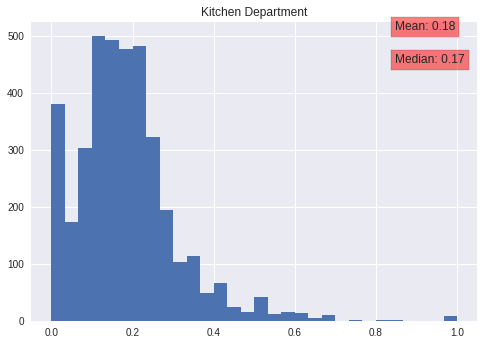

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


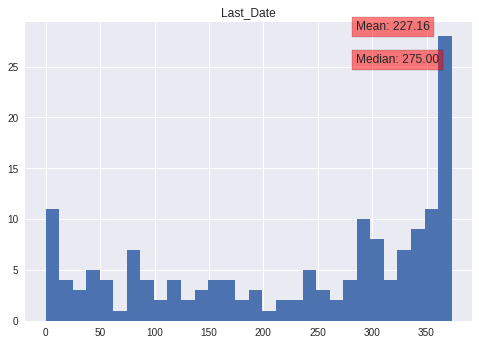

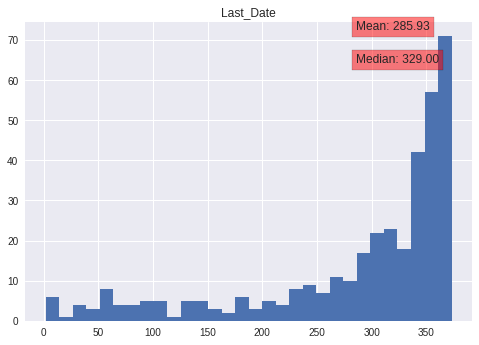

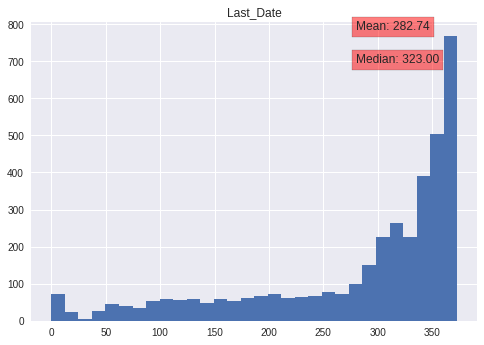

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


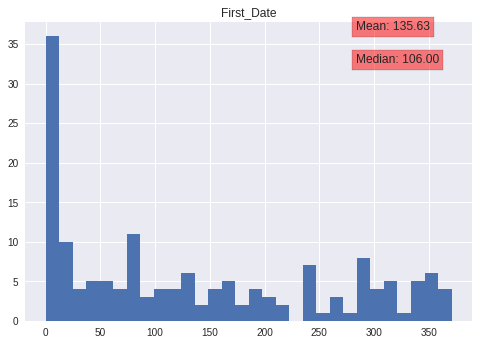

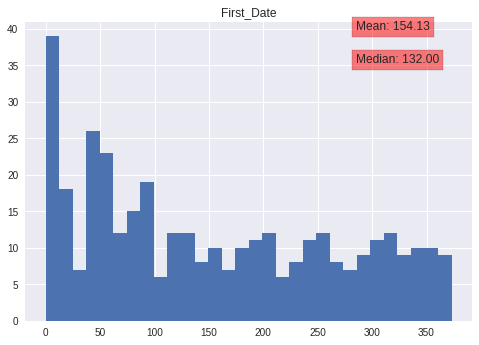

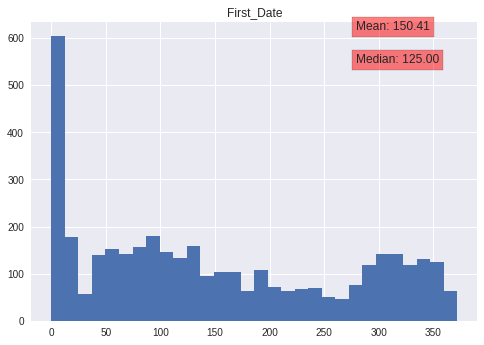

---------------------------------------------------------
count    4336.000000
mean        0.207249
std         0.147077
min         0.000000
25%         0.121212
50%         0.190476
75%         0.266901
max         1.000000
Name: Handcraft & Clothes Department, dtype: float64
Cluster -1


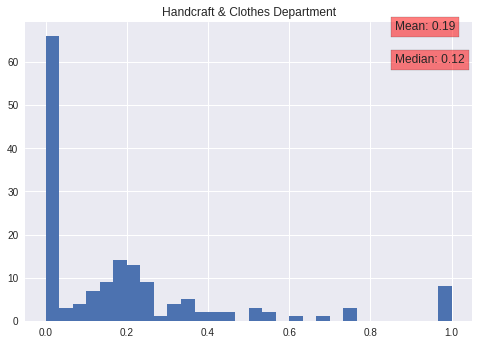

Cluster 0


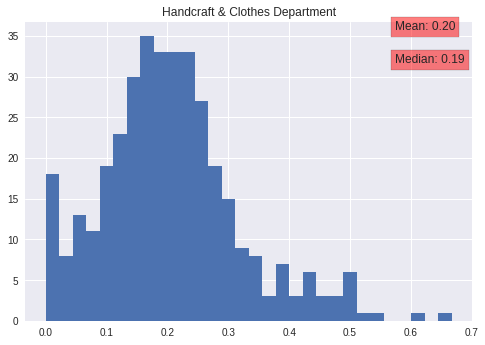

Cluster 1


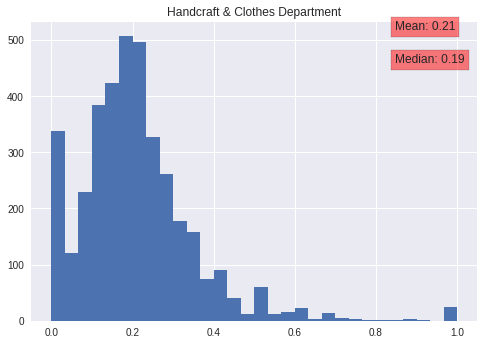

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


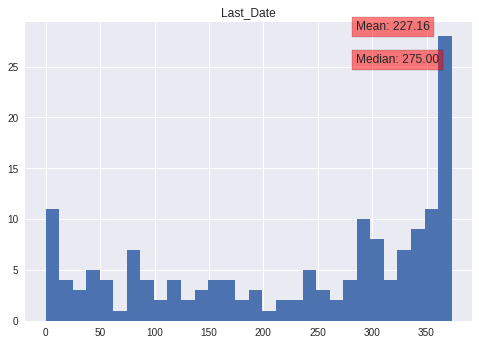

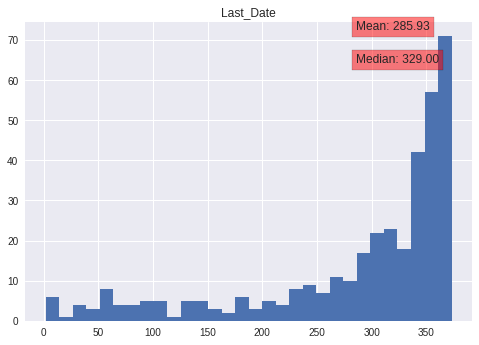

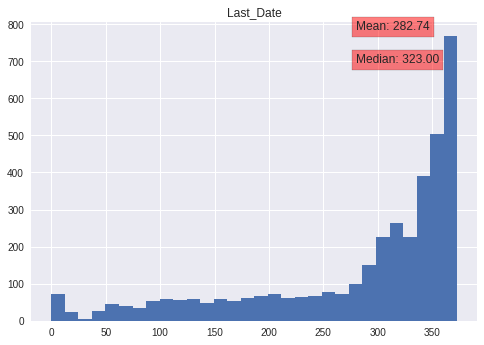

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


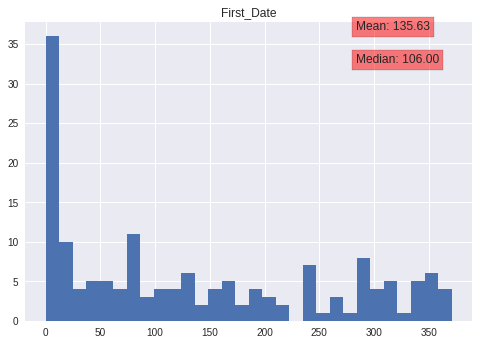

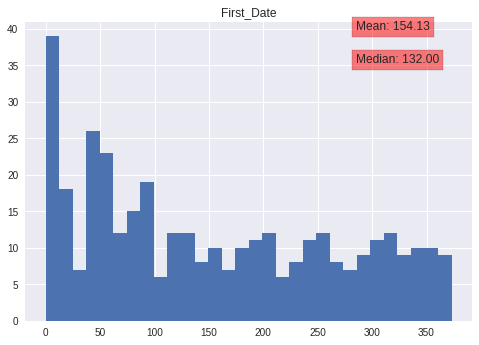

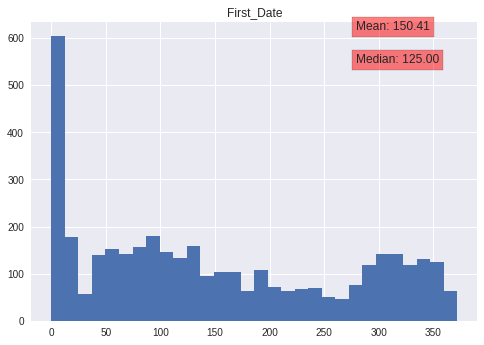

---------------------------------------------------------
count    4336.000000
mean        0.224782
std         0.156175
min         0.000000
25%         0.127273
50%         0.208333
75%         0.295024
max         1.000000
Name: Design & Viantage_Decoration Department, dtype: float64
Cluster -1


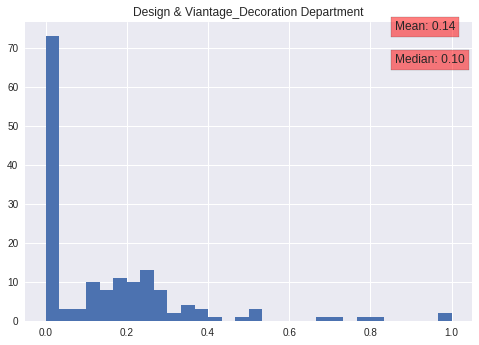

Cluster 0


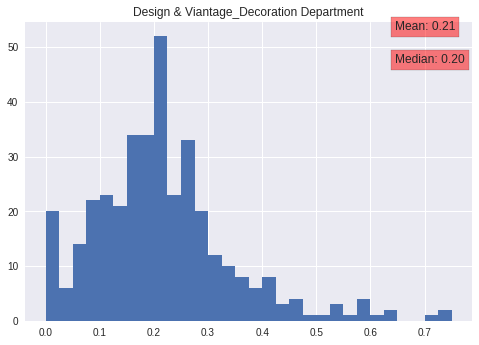

Cluster 1


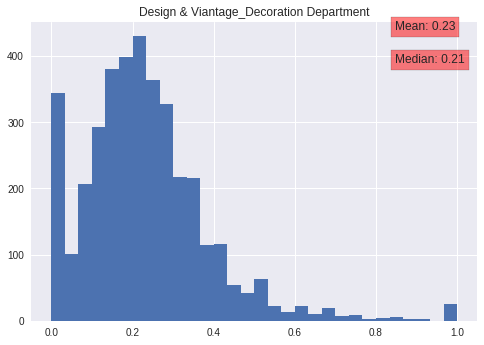

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


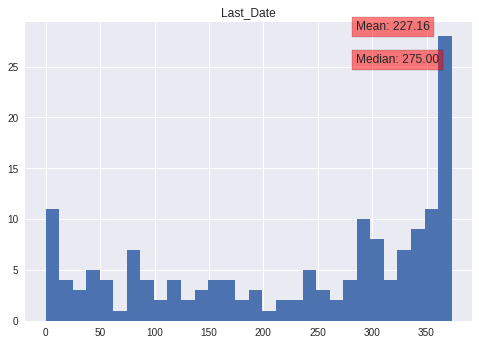

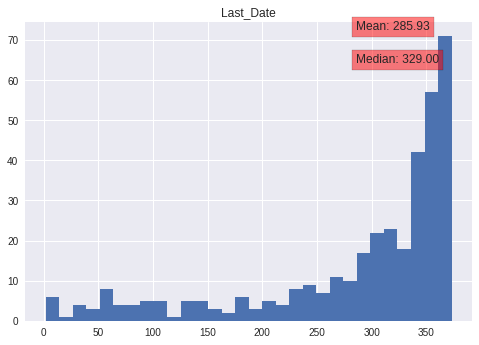

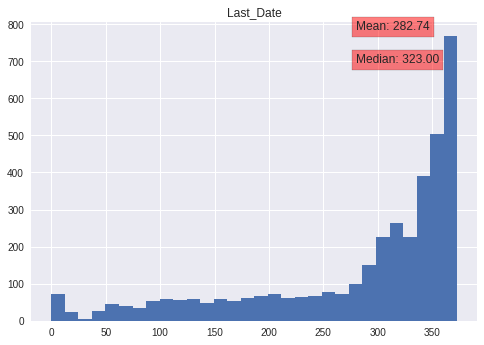

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


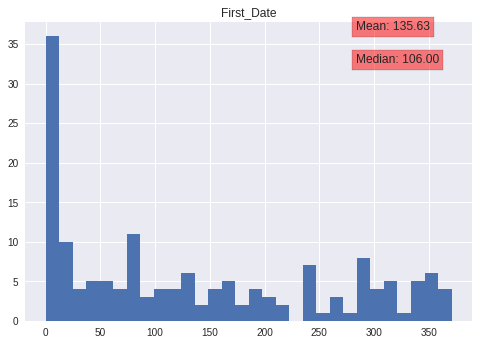

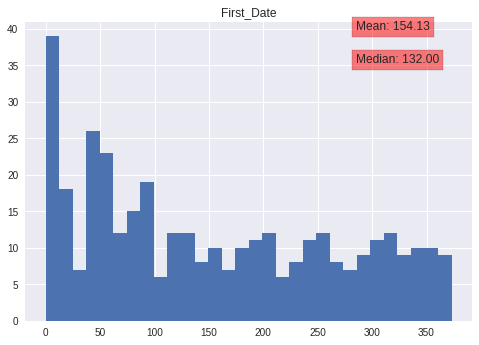

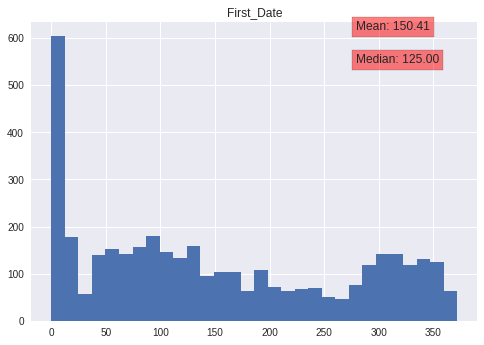

---------------------------------------------------------


In [42]:
hist_dbscan_clusters(3, 30)

In [45]:
df_dbscan_clusters(3, 30)

A/Number_Of_Customers B/Count_Invoices C/Average_Products_Invoice  \
-1                    159         166.39 %                    12.71 %   
 0                    369          -8.55 %                     5.32 %   
 1                   3808          -6.12 %                    -1.05 %   

   D/Average_Quantity_Invoice E/Average_TotaPrice_Invoice F/United Kingdom  \
-1                   286.93 %                    267.74 %         -23.44 %   
 0                    16.72 %                     32.97 %        -100.00 %   
 1                   -13.60 %                    -14.37 %          10.67 %   

   G/Decoration Department H/Toys & Kids Deprtment I/Kitchen Department  \
-1                -35.05 %                 29.73 %              63.29 %   
 0                -31.20 %                 31.79 %              11.91 %   
 1                  4.49 %                 -4.32 %              -3.80 %   

   J/Handcraft & Clothes Department K/Design & Viantage_Decoration Department  \
-1                          -8.71 %                                  -36.08 %   
 0                          -1.74 %                                   -4.46 %   
 1                           0.53 %                                    1.94 %   

   L/Last_Date M/First_Date N/Time_Minutes_Mean  
-1    -19.15 %      -9.69 %               12:36  
 0      1.76 %       2.62 %               10:28  
 1      0.63 %       0.15 %               13:34

In [0]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using KMeans(n_clusters=13) model 

model = KMeans(n_clusters=13, random_state=0).fit(df_standard)
idk = model.labels_

for id_cluster in range(model.n_clusters):
    df_customers.loc[np.where(idk == id_cluster)[0], 'Customer_Category_km13'] = id_cluster

In [0]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using KMeans(n_clusters=4) model 

model = KMeans(n_clusters=4, random_state=0).fit(df_standard)
idk = model.labels_

for id_cluster in range(model.n_clusters):
    df_customers.loc[np.where(idk == id_cluster)[0], 'Customer_Category_km4'] = id_cluster

In [0]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using DBSCAN(eps=2.3, min_samples=5) model 

dbsc = DBSCAN(eps=2.3, min_samples=5).fit(df_standard)
labels = dbsc.labels_
df_customers['Customer_Category_dbsc5'] = labels

In [0]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using DBSCAN(eps=3, min_samples=30) model 

dbsc = DBSCAN(eps=3, min_samples=30).fit(df_standard)
labels = dbsc.labels_
df_customers['Customer_Category_dbsc30'] = labels

In [49]:
df_customers.head(50)

Count_Invoices  Average_Products_Invoice  Average_Quantity_Invoice  \
0              7.0                 26.000000                351.142857   
1              4.0                  7.750000                585.250000   
2              1.0                 73.000000                631.000000   
3              1.0                 17.000000                197.000000   
4              8.0                 10.625000                 67.000000   
5              1.0                  4.000000                 20.000000   
6              1.0                 58.000000                530.000000   
7              1.0                 13.000000                240.000000   
8              3.0                 19.666667                530.333333   
9              1.0                131.000000               2708.000000   
10             2.0                  9.500000                124.000000   
11             4.0                 61.250000                402.250000   
12             3.0                 43.000000                388.333333   
13             1.0                 10.000000                 91.000000   
14            10.0                 26.600000                222.900000   
15             2.0                 11.500000                204.000000   
16             4.0                 21.250000                376.500000   
17             2.0                 11.000000                 87.000000   
18             1.0                 11.000000                173.000000   
19             4.0                 41.500000                588.000000   
20             2.0                 31.500000                295.500000   
21             3.0                 17.333333                264.666667   
22             1.0                 14.000000                197.000000   
23             1.0                 33.000000                342.000000   
24             2.0                  8.500000                 89.000000   
25             2.0                 38.500000                472.000000   
26             1.0                219.000000               2529.000000   
27             2.0                 20.000000                203.500000   
28             4.0                 26.000000                281.750000   
29             5.0                 17.400000                161.600000   
30             5.0                 19.800000                306.400000   
31             2.0                 13.500000                 63.000000   
32             2.0                  5.000000                177.000000   
33             6.0                 16.666667                243.666667   
34             1.0                 32.000000                353.000000   
35             1.0                 93.000000                293.000000   
36             4.0                 16.000000                204.000000   
37             2.0                 13.500000                409.500000   
38            12.0                 13.000000                176.500000   
39             2.0                 63.000000                631.500000   
40             1.0                 85.000000               1394.000000   
41             4.0                 14.750000                294.500000   
42             1.0                  5.000000                 11.000000   
43             1.0                 11.000000                 94.000000   
44             1.0                  5.000000                 96.000000   
45             1.0                 54.000000                857.000000   
46             2.0                 52.500000                909.000000   
47             5.0                 15.400000                283.200000   
48             5.0                 21.000000                281.800000   
49             3.0                 36.333333               1850.333333   

    Average_TotaPrice_Invoice  United Kingdom  Decoration Department  \
0                  615.714286             0.0               0.159341   
1                  449.310000             0.0               0.032258   
2            

In [0]:
# export your updated dataset
df_customers.to_csv("Part1_P5.csv",encoding='utf-8', index=False)